README:
Introcuction: This script is for figure 1 in fullscope analysis 
Author: Y0NEKO
Time: 2024.03.22


## Load pacakge and data

In [1]:
#BiocManager::install("khroma")
# install.packages("devtools")
#devtools::install_github("dzhang32/ggtranscript")

In [1]:
#load package
.libPaths(c("/cluster/home/liuhengxin/software/miniconda3_2/envs/r-kernel/lib/R/library",
           "/cluster/home/liuhengxin/software/miniconda3/envs/r4.1.2/lib/R/library",
           "/cluster/home/liuhengxin/software/miniconda3_2/envs/Rsplot/lib/R/library"))
library(data.table)
library(qs)
library(GenomicRanges)
library(GenomicFeatures)
library(rtracklayer)
library(dplyr)
library(ggbio)
library(reshape2)
library(ggsci)
library(viridis)
library(ggpubr)
library(ggh4x)
library(ggtranscript)
library(khroma)
library(bambu)

qs 0.25.5

Loading required package: stats4

Loading required package: BiocGenerics

Warning message:
“package ‘BiocGenerics’ was built under R version 4.3.2”

Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors

Warning message:
“package ‘S4Vectors’ was built under R version 4.3.3”

Attaching package: ‘S4Vectors’


The following objects are masked from ‘package:data.table’:

    first, second


The following object is masked from ‘p

In [2]:
setwd("/cluster/home/liuhengxin/P1_brain_nanopore/downstream_analysis/")
#fsraw.cor = qread("data/reads_full_anotation/main_data_read_total_annotation_delete_multiread_24_09_04.qs")
fsraw = qread("data/reads_full_anotation/main_data_read_total_annotation_24_09_04.qs")

In [3]:
setwd("/cluster/home/liuhengxin/P1_brain_nanopore/")
MySplit = function(str,sep, n){
  return(unlist(lapply(strsplit(str,sep),"[[",n)))
}
cellan = read.csv("ref/cell_type_type20230220-macaque1-contour2_v1.csv")
cellan = unique(cellan[,c("subclass","class")])
areaan = read.csv("ref/area_annotation.csv")
gtf = rtracklayer::import("ref/bambu_extended_annotations_novelname.gtf")
areaan = unique(areaan[c("L0","L3")])
colnames(areaan) = c("lobe","area")
areaan[areaan$area == "1/2",]$area = "1|2"
setwd("/cluster/home/liuhengxin/P1_brain_nanopore/downstream_analysis/")

In [4]:
gtfinfo = qread("ref/bambu_extended_annotations_transinfo.qs")

In [5]:
gtfdfan = read.csv("ref/gtf_new_transcript_name_map.csv")
head(gtfdfan)

,seqnames,start,end,width,strand,source,type,score,phase,gene_id,transcript_id,exon_number,trantype,transnew
,<chr>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<lgl>,<lgl>,<chr>,<chr>,<lgl>,<chr>,<chr>
1,NC_022282.1,52172798,52186150,13353,-,Bambu,transcript,NA,NA,AAAS,BambuTx122957,NA,novel,AAAS-WeiLab-1
2,NC_022282.1,52172798,52186405,13608,-,Bambu,transcript,NA,NA,AAAS,BambuTx22391,NA,novel,AAAS-WeiLab-2
3,NC_022276.1,169278976,169296604,17629,-,Bambu,transcript,NA,NA,AADAT,BambuTx11228,NA,novel,AADAT-WeiLab-1
4,NC_022286.1,110801399,110803009,1611,-,Bambu,transcript,NA,NA,AAED1,BambuTx30778,NA,novel,AAED1-WeiLab-1
5,NC_022286.1,110801399,110819259,17861,-,Bambu,transcript,NA,NA,AAED1,BambuTx30780,NA,novel,AAED1-WeiLab-2
6,NC_022285.1,73158270,73211605,53336,+,Bambu,transcript,NA,NA,AAMDC,BambuTx28589,NA,novel,AAMDC-WeiLab-1


In [3]:
refdf = qread("/cluster/home/liuhengxin/P1_brain_nanopore/ref/T44_dedup_with_cellan_23_03_23.qs")
head(refdf)

,x,y,cell_label,gene_area,rx,ry,CBZ,origin_name,global_region_id,no,cell_id,cell_type_id,cell_type,subclass,class,cell_type_color
,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
1,10204,26115,0,0,56131,12632,CB:Z:10204_26115,background,0,NA,NA,NA,,,,
2,10205,26115,0,0,56130,12632,CB:Z:10205_26115,background,0,NA,NA,NA,,,,
3,10206,26116,0,0,56129,12633,CB:Z:10206_26116,background,0,NA,NA,NA,,,,
4,10199,26117,0,0,56136,12634,CB:Z:10199_26117,background,0,NA,NA,NA,,,,
5,10201,26117,0,0,56134,12634,CB:Z:10201_26117,background,0,NA,NA,NA,,,,
6,10203,26117,0,0,56132,12634,CB:Z:10203_26117,background,0,NA,NA,NA,,,,


In [23]:
#refdf = refdf[refdf$origin_name != "background",]

In [99]:
fsraw = qread("data/reads_full_anotation/main_data_read_total_annotation_24_04_19.qs")

In [5]:
#
fsrawdp = qread("data/reads_full_anotation/main_data_read_total_annotation_dedup_24_04_19.qs")

In [5]:
#set output dir
transtls = qread("data/reads_full_anotation/read_trans_stat_list_dedup_24_04_19.qs")

In [14]:
dir.create("result/figure1")

In [3]:
theme_presentation<- function(base_size = 16, base_family = "") {
    # Starts with theme_grey and then modify some parts
    theme_bw(base_size = base_size, base_family = base_family) %+replace%
      theme(
        strip.background = element_blank(),
        strip.text.x = element_text(size=16,colour="white"),
        strip.text.y = element_text(size=16,colour="white"),
        axis.text.x = element_blank(),
        axis.text.y = element_blank(),
        axis.ticks =  element_blank(), 
        axis.title.x= element_blank(),
        axis.title.y= element_blank(),
        panel.background = element_rect(fill="black"), 
        panel.border =element_blank(),  
        panel.grid.major = element_blank(), 
        panel.grid.minor = element_blank(), 
        panel.margin = unit(1.0, "lines"), 
        plot.background = element_rect(fill="black"), 
        plot.title =element_text(size=16,colour="white"), 
        # plot.margin = unit(c(1,  1, 1, 1), "lines"),
        legend.background=element_rect(fill='black'),
        legend.title=element_text(size=12,colour="white"),
        legend.text=element_text(size=12,colour="white"),
        legend.key = element_rect( fill = 'black'),
        # legend.key.size = unit(c(0, 0), "lines"),
        axis.line.x = element_blank(),
        axis.line.y = element_blank()
      )
  }
  

In [4]:
datas1 = list()

## Part1 Data build and Method QC

#### 0.thredshold build

In [5]:
#thred
edithre = read.table("../script/edit_thred_simulation/edit_thred_stat_true_witherror.txt",header = T)
head(edithre)

,target_size,ref_dis,min_dis
,<int>,<int>,<int>
1,10000,3,8
2,20000,3,8
3,30000,3,8
4,40000,3,8
5,50000,3,8
6,60000,3,8


In [6]:
edithre = edithre[order(edithre$target_size),]
edithrest = edithre %>% group_by(target_size) %>% summarise(min_dis = quantile(min_dis,0.05))
edithrest

quantile(edithre[edithre$target_size == 400000000,]$min_dis,0.1)
pth = ggplot(edithrest,aes(x = log10(target_size),y = min_dis)) + geom_point() + theme_bw() + theme(axis.text = element_text(size= 10))
ggexport(pth , filename = "result/figure1/thred_stat_24_09_12.pdf",width = 5,height = 4)
edithrest[edithrest$min_dis < 4,]

#stat CID size
cidsize = read.delim("/cluster/home/liuhengxin/P1_brain_nanopore/script/map_ngs_nano_4.0/log/indexstat.txt",header = F)
#nrow(cidsize.old)
cidsize$V1 = MySplit(cidsize$V1," ",1)
cidsize$V2 = as.numeric(cidsize$V2)
cidsize = cidsize[!is.na(cidsize$V2),]
cidsize = rbind(cidsize,data.frame("V1" = c("LOC107127429","PRMT7"),"V2" = c(70465,2660)))
nrow(cidsize)
head(cidsize)
summary(cidsize$V2)
colnames(cidsize) = c("gene","size")
cidsize$target_size = (as.integer(cidsize$size/10000)+1) * 10000
nrow(cidsize)
cidsize = merge(cidsize,edithrest,by = "target_size")
nrow(cidsize)

target_size,min_dis
<int>,<dbl>
10000,7
20000,7
30000,7
40000,6
50000,6
60000,6
70000,6
80000,6
90000,6


10% 
  1

Warning message in grid.newpage():
"Cannot open temporary file '/tmp/RtmpJxNL8G/pdfe36372366470' for compression (reason: No space left on device); compression has been turned off for this device"
file saved to result/figure1/thred_stat_24_09_12.pdf



target_size,min_dis
<int>,<dbl>
80120000,3.9
80130000,3.9
80140000,3.9
80150000,3.9
80160000,3.9
80170000,3.9
80180000,3.9
80190000,3.9
80200000,3.9


Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"


[1] 33357

,V1,V2
,<chr>,<dbl>
1,LOC102139685,182
2,LOC102124877,150
3,LOC107128689,257
4,LOC102126616,2008
5,LOC107127370,866
6,LOC102137006,354


     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
        1      2478     12202    105212     61738 158237661 

[1] 33357

[1] 33357

In [6]:
edithrest[edithrest$min_dis > 3 ,]

target_size,min_dis
<int>,<dbl>
115530000,1.9
115540000,1.9
115550000,1.9
115560000,1.9
115570000,1.9
115580000,1.9
115590000,1.9
115600000,1.9
115610000,1.9


#### 1.cid mapping filter and stat

In [24]:
#load data
#direct nanopore
cidext.dnano = fread("../script/map_ngs_nano_4.0/data/T44_cidextract_direct_nanopore_5er.out",header = FALSE)
cidmap.dnano = fread("../processed_data/ont_direct_process/ont_direct_cidmap_5er_24_07_12.out",header = FALSE)
colnames(cidmap.dnano) = c("readid","querySeq","cidPos","targetSeq","editDi", "gene","strand","time","kmtime","kmsize")
colnames(cidext.dnano) = c("readid","strand","cidseq","gene")

#fullscope cyclone
cidext.cycl = fread("/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/cyclone_revo_process/CID_extract/cyclone_revo_cidextract_5er_reorder_24_07_12.out",header = FALSE)
cidmap.cycl = fread("/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/cyclone_revo_process/CID_mapping/cyclone_revo_cidmap_5er_24_07_12.out",header = FALSE)
colnames(cidmap.cycl) = c("readid","querySeq","cidPos","targetSeq","editDi", "gene","strand","time","kmtime","kmsize")
colnames(cidext.cycl) = c("readid","strand","cidseq","gene","pos","type","readstart","readend")



In [18]:
CidFilter = function(cidmap.dnano,cidsize){
    cidmap.dnano$threshold = cidsize[match(cidmap.dnano$gene,cidsize$gene),]$min_dis
    return(cidmap.dnano)
}

In [32]:
#cyclone
cidmap.cycl = CidFilter(cidmap.cycl,cidsize)
cidmap.cyclf = cidmap.cycl[cidmap.cycl$editDi < cidmap.cycl$threshold,]
head(cidext.cycl)
cidext.cycl = cidext.cycl[cidext.cycl$gene != "none",]
length(unique(cidext.cycl$readid))
length(unique(cidmap.cyclf$readid))/218224640
qsave(cidmap.cyclf,"/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/cyclone_revo_process/CID_mapping/cyclone_revo_cidmap_5er_filter_24_07_12.qs")
168868526/218224640
length(unique(cidmap.cyclf$readid))/168868526

[1] 0.7738289

[1] 0.3647138

In [30]:
#direct nanopore
cidmap.dnano = CidFilter(cidmap.dnano,cidsize)
cidmap.dnanof = cidmap.dnano[cidmap.dnano$editDi < cidmap.dnano$threshold,]
cidtotal = length(unique(cidext.dnano$readid))
cidtotalf = length(unique(cidext.dnano[cidext.dnano$gene != "none",]$readid))
codmap = length(unique(cidmap.dnanof$readid))
codmap
cidtotalf
cidtotal
codmap/cidtotalf
qsave(cidmap.dnanof,"/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/ont_direct_process/ont_direct_cidmap_5er_filter_24_07_12.qs")

[1] 81258376

[1] 234557420

[1] 266132945

[1] 0.3464328

In [20]:
#fullscope nanopore
#fullscope nanopore
cidext.ont = fread("/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/nano_revo_process/CID_extract/ont_revo_cidextract_5er_reorder_24_07_12.out",header = FALSE)
colnames(cidext.ont) = c("readid","strand","cidseq","gene","pos","type","readstart","readend")
#cidmap.ont = fread("/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/nano_revo_process/CID_mapping/ont_revo_cidmap_5er_24_07_12.out",header = FALSE)
#colnames(cidmap.ont) = c("readid","querySeq","cidPos","targetSeq","editDi", "gene","strand","time","kmtime","kmsize")

#cidmap.ont = CidFilter(cidmap.ont,cidsize)
#cidmap.ontf = cidmap.ont[cidmap.ont$editDi < cidmap.ont$threshold,]
cidtotal2 = length(unique(cidext.ont$readid))
cidtotalf2 = length(unique(cidext.ont[cidext.ont$gene != "none",]$readid))
codmap2 = length(unique(cidmap.ontf$readid))
codmap2
cidtotalf2
cidtotal2
codmap2/cidtotalf2
qsave(cidmap.ontf,"/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/nano_revo_process/ont_direct_cidmap_5er_filter_24_07_12.qs")

[1] 101723248

[1] 305759487

[1] 395960173

[1] 0.3326904

In [25]:
305759487/395960173
234557420/266132945
168868526/218224640
61588682

[1] 0.7721976

[1] 0.8813543

[1] 0.7738289

[1] 61588682

In [19]:
cidmap.cyclf = qread("/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/cyclone_revo_process/CID_mapping/cyclone_revo_cidmap_5er_filter_24_07_12.qs")
cidmap.dnanof = qread("/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/ont_direct_process/ont_direct_cidmap_5er_filter_24_07_12.qs")
cidmap.ontf = qread("/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/nano_revo_process/ont_direct_cidmap_5er_filter_24_07_12.qs")
head(cidmap.ontf)

readid,querySeq,cidPos,targetSeq,editDi,gene,strand,time,kmtime,kmsize,threshold
<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<int>,<dbl>
9d83b429-1bf3-4057-9210-31c7e4b0c1fd-2;st_ed:A:93-2454;AD:A:adapterP.rc-adapterN.rc;AP:A:Jump|AD:A:no-split_21-45:-,GGGGGTCAAGAATAGGCCTCCGTTT,5534_113631,GGGAGTAAGAATAGGCCTGCCGTCT,4,LOC102116409,*,0.049406,0.049136,4,7
ad36c555-25d5-4080-a572-59bc2b309652-9;st_ed:A:6135-7060;AD:A:adapterN-adapterO;AP:A:Correct_881-906:+,CGACAGAACCGCATTATAAACACCAG,48586_84793,CGCAGAACCGCATTATAAACACCAG,1,LOC102116409,*,0.001960,0.001142,1,7
e8176546-17e6-4e13-8c3b-d2d2161b955f-2;st_ed:A:94-793;AD:A:adapterA-adapterB;AP:A:Correct_656-680:+,AATGGTGAACCTATTCCTTCCGCAG,39592_65166,AATGGTCAACCTATTCCTTCCGCAG,1,LOC102116409,*,0.001722,0.001645,1,7
5a2839d5-568b-4cc2-981b-34627057f514-6;st_ed:A:2702-3492;AD:A:adapterJ-adapterM;AP:A:Jump|AD:A:no-split|ts-te:86-765,CCACATAGTAATTAGTGCTCCCTCC,17760_30997,CCACATAGTAATTAGTGCTCCCTCC,0,LOC102116409,*,0.000021,0.000000,0,7
969bcf7d-7752-4c70-ac08-1f6b4e8302ce-6;st_ed:A:2291-3062;AD:A:adapterE-adapterF;AP:A:Correct_728-752:+,CCTTACGCTGGGACGCTCCGAGCTT,21467_62832,CCTTACGCTGGGACGCTCCGAGCTT,0,LOC102116409,*,0.000026,0.000000,0,7
53719349-7c20-48ca-ac26-d743a8ac6796-7;st_ed:A:2977-3399;AD:A:adapterH-adapterH.rc;AP:A:RC-Identical|ts-te:89-399,AAGTCCATCCCTAAGTGTTATGACT,15894_52566,AAGTCCATCCCTAAGTGTTATGACT,0,LOC102116409,*,0.000024,0.000000,0,7


In [20]:
tmpst = cidmap.ontf %>% group_by(readid) %>% summarise(cidnum = length(unique(cidPos)))
summary(tmpst$cidnum)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      1       1       1       1       1       9 

In [26]:
cidmap.ontf = cidmap.ontf[order(cidmap.ontf$readid,cidmap.ontf$editDi,cidmap.ontf$kmsize),]
cidmap.ontf = cidmap.ontf[!duplicated(cidmap.ontf$readid),]

In [35]:
qsave(cidmap.ontf,"/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/nano_revo_process/ont_revo_cidmap_5er_filter_dedup_24_07_12.qs")

In [ ]:
cidmap.dnanof = cidmap.dnanof[order(cidmap.dnanof$readid,cidmap.dnanof$editDi,cidmap.dnanof$kmsize),]
cidmap.dnanof = cidmap.dnanof[!duplicated(cidmap.dnanof$readid),]
qsave(cidmap.dnanof,"/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/ont_direct_process/ont_direct_cidmap_5er_filter_dedup_24_07_12.qs")

In [36]:
cidmap.cyclf = cidmap.cyclf[order(cidmap.cyclf$readid,cidmap.cyclf$editDi,cidmap.cyclf$kmsize),]
cidmap.cyclf = cidmap.cyclf[!duplicated(cidmap.cyclf$readid),]

ERROR: Error in qsave(cidmap.cyclf, "/cluster/home/liuhengxin/P1_brain_nanopore/cyclone_revo_process/cyclone_revo_cidmap_5er_filter_dedup_24_07_12.qs"): Failed to open file for writing. 
- Does the directory exist?
 - Do you have file permissions?
- Is the file name long? (usually 255 chars)


In [37]:
qsave(cidmap.cyclf,"/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/cyclone_revo_process/cyclone_revo_cidmap_5er_filter_dedup_24_07_12.qs")

#### 2.merge annotation

In [56]:
MergeAnn = function(cidmap.cyclf,refdf,txref.cyl,gtfdfan){
    cidmap.cyclf$transcript_id = txref.cyl[match(cidmap.cyclf$readid,txref.cyl$read),]$transcript
    cidmap.cyclf$gene_id = gtfdfan[match(cidmap.cyclf$transcript_id,gtfdfan$transcript_id),]$gene_id
    cidmap.cyclf$transcript_name = gtfdfan[match(cidmap.cyclf$transcript_id,gtfdfan$transcript_id),]$transnew
    transcript_name = cidmap.cyclf$transcript_id
    cidmap.cyclf$transcript_id = cidmap.cyclf$transcript_name
    cidmap.cyclf$transcript_name = transcript_name

    cidmap.cyclf$CBZ  = paste0("CB:Z:",cidmap.cyclf$cidPos)
    cidmap.cyclf = merge(cidmap.cyclf[,c("readid","transcript_id","gene_id","CBZ")],refdf,by = "CBZ")
    return(cidmap.cyclf)
}

In [59]:
#merge annotation
#cidmap.cyclf = qread("/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/cyclone_revo_process/CID_mapping/cyclone_revo_cidmap_5er_filter_24_07_12.qs")
#library(data.table)
#txref.cyl = fread("/cluster/home/hongyanhong/projects/MAS-seq/BGI_240325_newdata/bambu/bambu_all.tsv")
head(txref.cyl)
cidmap.cyclf = MergeAnn(cidmap.cyclf,refdf,txref.cyl,gtfdfan)
qsave(cidmap.cyclf,file = "data/reads_full_anotation/cyclone_revo_cidmap_5er_filter_withan_24_07_12.qs")
#cidmap.fl = rbind(cidmap.cyclf,cidmap.dnanof,cidmap.ontf)
#cidmap.cyclf$layer = MySplit(cidmap.cyclf$origin_name,"-",3)
#cidmap.cyclf$region = MySplit(cidmap.cyclf$origin_name,"-",2)
#cidmap.cyclf$lobe = areaan[match(cidmap.cyclf$region,areaan$area),]$lobe

read,transcript
<chr>,<chr>
TB2000B1FD-202403071433591_20240307162951_00186_001645416_12.18-5;st_ed:A:1703-2473;AD:A:adapterH.rc-adapterG.rc;AP:A:Correct_21-45:-,BambuTx1
TB2000B1FD-202403071433591_20240308091319_00833_001470499_11.26-3;st_ed:A:1287-2028;AD:A:adapterN.rc-adapterM.rc;AP:A:Correct_21-46:-,BambuTx1
TB2000B1FD-202403071433591_20240308152936_00483_002958541_11.80-4;st_ed:A:2365-3539;AD:A:adapterH.rc-adapterG.rc;AP:A:Correct_21-45:-,XM_005539510.2
TB2000B1FD-202403071433591_20240307234851_01024_001272776_11.19-4;st_ed:A:805-1454;AD:A:adapterC-adapterD;AP:A:Correct|ts-te:50-628,XM_005539510.2
TB2000B1FD-202403071433591_20240308070754_00037_002827694_11.93-2;st_ed:A:559-1421;AD:A:adapterB-adapterD;AP:A:Jump|1;st_ed:A:1-435;AD:A:adapterB-adapterC;AP:A:Correct_391-415:+,XM_005539510.2
TB2000B1FD-202403071433591_20240308224835_00989_003518243_09.24-3;st_ed:A:2018-4241;AD:A:adapterM-end;AP:A:Boundary|ts-te:0-344,XM_005539510.2


In [60]:
#cidmap.ontf = qread("/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/nano_revo_process/ont_direct_cidmap_5er_filter_24_07_12.qs")
txref.ont = fread("/cluster/home/hongyanhong/projects/MAS-seq/240318_newdata/bambu/bambu_all.tsv")
cidmap.ontf = MergeAnn(cidmap.ontf,refdf,txref.ont,gtfdfan)
qsave(cidmap.ontf,file = "/cluster/home/liuhengxin/P1_brain_nanopore/downstream_analysis/data/reads_full_anotation/ont_revo_cidmap_5er_filter_withan_24_07_12.qs")
#cidmap.fl = rbind(cidmap.cyclf,cidmap.dnanof,cidmap.ontf)

In [12]:
head(cidmap.ontf)

CBZ,readid,transcript_id,gene_id,x,y,cell_label,gene_area,rx,ry,origin_name,global_region_id,no,cell_id,cell_type_id,cell_type,subclass,class,cell_type_color
<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
CB:Z:10000_100067,b4371ecb-1061-46e5-a8ed-138e80f82f7f-8;st_ed:A:4340-4899;AD:A:adapterI.rc-adapterH.rc;AP:A:Correct_20-43:-,XM_005549722.2,STK17A,10000,100067,0,0,58270,86554,background,0,NA,NA,NA,,,,
CB:Z:10000_100067,94cdc818-87b9-4684-9a2b-e88fba4b5a50;st_ed:A:1-912;AD:A:no-split;AP:NA:NA|1;st_ed:A:1-235;AD:A:start-adapterO;AP:A:Boundary|ts-te:54-235,LOC107128653-WeiLab-1,LOC107128653,10000,100067,0,0,58270,86554,background,0,NA,NA,NA,,,,
CB:Z:10000_100067,94cdc818-87b9-4684-9a2b-e88fba4b5a50;st_ed:A:1-912;AD:A:no-split;AP:NA:NA|1;st_ed:A:1-235;AD:A:start-adapterO;AP:A:Boundary|ts-te:54-235,LOC107128653-WeiLab-1,LOC107128653,10000,100067,0,0,58270,86554,background,0,NA,NA,NA,,,,
CB:Z:10000_100067,bd542623-7003-48e8-9467-e46a55e2f421-7;st_ed:A:6102-6748;AD:A:adapterG.rc-adapterF.rc;AP:A:Correct_21-45:-,XM_005549722.2,STK17A,10000,100067,0,0,58270,86554,background,0,NA,NA,NA,,,,
CB:Z:10000_100081,5f222bf3-3f14-4fc0-845e-7bf8700c7d23;st_ed:A:1-703;AD:A:no-split;AP:NA:NA|1;st_ed:A:1-384;AD:A:start-adapterG;AP:A:Boundary_340-364:+,XM_005582633.2,KIF1C,10000,100081,0,0,58271,86568,background,0,NA,NA,NA,,,,
CB:Z:10000_100105,508877b5-c4f4-47da-a050-5dc2e20bdce0-6;st_ed:A:1884-2410;AD:A:adapterL.rc-adapterK.rc;AP:A:Correct_21-45:-,XM_015455391.1,CYHR1,10000,100105,0,0,58271,86592,background,0,NA,NA,NA,,,,


In [61]:
txidref = qread("/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/bambu_longread_count/read_trans_filter_df_withstan.qs")
txidref = unique(txidref[,c("tranid","tranname")])
txref.ontd = qread("/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/bambu_longread_count/read_trans_filter_df.qs")
txref.ontd = merge(txref.ontd,txidref,by = "tranid")
qsave(txref.ontd,"/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/bambu_longread_count/read_trans_ref.qs")
head(txref.ontd)

,tranid,readid,tranname
,<int>,<chr>,<chr>
1,1,bd7aa74f-44a8-480e-bbe4-49aa726f8dbf,BambuTx1
2,1,918b8e51-01bc-4eca-875b-6314188cf216,BambuTx1
3,1,b6196187-bf00-44fb-84f2-8399f74ec2d1,BambuTx1
4,1,7230c00b-4348-4380-a112-ae81d31e51de,BambuTx1
5,1,ce0920b8-fa1d-4708-8916-e90806040b35,BambuTx1
6,1,023edaa9-b507-4af8-97d3-fd6e370eaebd,BambuTx1


In [63]:
txref.ontd = txref.ontd[,c(2,3)]
colnames(txref.ontd) = c("readid","transcript_id")

In [67]:
head(txref.ontd)

,readid,transcript_id
,<chr>,<chr>
1,bd7aa74f-44a8-480e-bbe4-49aa726f8dbf,BambuTx1
2,918b8e51-01bc-4eca-875b-6314188cf216,BambuTx1
3,b6196187-bf00-44fb-84f2-8399f74ec2d1,BambuTx1
4,7230c00b-4348-4380-a112-ae81d31e51de,BambuTx1
5,ce0920b8-fa1d-4708-8916-e90806040b35,BambuTx1
6,023edaa9-b507-4af8-97d3-fd6e370eaebd,BambuTx1


In [69]:
cidmap.dnanof = qread("/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/ont_direct_process/ont_direct_cidmap_5er_filter_dedup_24_07_12.qs")
head(cidmap.dnanof)

readid,querySeq,cidPos,targetSeq,editDi,gene,strand,time,kmtime,kmsize,threshold
<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<int>,<dbl>
00000002-74f0-4aac-b5f1-5300962f10fd-13;st_ed:A:7786-8469;AD:A:adapterM-adapterN;AP:A:Correct_640-664:+,GACCTTCAGCCAGTGTCTCCCTACA,26017_83373,GACCTTCAGCCAGTGTCTCCCTACA,0,PYCRL,*,0.000020,0.000000,0,7.0
00000002-74f0-4aac-b5f1-5300962f10fd-14;st_ed:A:8486-8974;AD:A:adapterN-end;AP:A:Boundary_389-413:+,TACGGATCATGCACTCCCTCTGTTG,25302_83379,TACGGATCATGCACTCCCTCTGTTG,0,LOC102134927,*,0.000066,0.000000,0,6.0
00000021-08aa-4c75-87b5-a7aac851b6a9-4;st_ed:A:1043-1539;AD:A:adapterO.rc-adapterN.rc;AP:A:Correct_22-48:-,AGTGATTGCGCATTCATCTAAAACCGC,43506_67976,TGATTGCGCATTAGTCTAAAACCGC,4,OSBP2,*,0.000289,0.000212,18,6.0
00000033-e8ce-4144-8ded-93a772582329-14;st_ed:A:10616-11399;AD:A:adapterJ-adapterK;AP:A:Correct_739-763:+,GCCAGTGATTTTCACGGCTTAATGT,19690_62662,GCCAGTGATTTTCACGGCTGAATGT,1,NUCKS1,*,0.002880,0.000619,157,5.0
00000033-e8ce-4144-8ded-93a772582329-3;st_ed:A:1542-1993;AD:A:adapterD-adapterE;AP:A:Correct_413-432:+,AGGTAAGTGCTTGCATACAG,7970_88627,AGGTAAGTGCTTGCATACAGTTGTC,5,MLLT3,*,0.000679,0.000176,21,6.0
00000033-e8ce-4144-8ded-93a772582329-5;st_ed:A:2418-2962;AD:A:adapterF-adapterG;AP:A:Correct_502-525:+,ACGGGCATGGAACTCCTTTCCAGT,35389_31143,ACGGGGCATGGAACTCCTTTCCAGT,1,LOC107128653,*,0.165010,0.138090,5239,3.9


In [70]:
cidmap.dnanof = MergeAnn(cidmap.dnanof,refdf,txref.ontd,gtfdfan)
qsave(cidmap.dnanof,file = "/cluster/home/liuhengxin/P1_brain_nanopore/downstream_analysis/data/reads_full_anotation/ont_direct_cidmap_5er_filter_withan_24_07_12.qs")

### Raw Nanopore reads preprocess

In [73]:
nanoraw = qread("../processed_data/bambu_read_trans_filter_df_withstan_nobackground_23_11_10.qs")
head(nanoraw)

readid,origin_name,cell_id,cell_type_id,subclass,class,CBZ,tranid,type,transcript_id,gene_id,layer,region,lobe,typenum,areatr
<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>
000008bd-3a0a-4c0e-b1ab-2c6753ead037,L-TEO-l3,NA,NA,,,CB:Z:52319_72842,353988,equal,NM_001284684.1,LOC101864869,l3,TEO,temporal,1,l3
00000a17-2ee6-486b-b65a-cce344cbe4ef,L-PE-l3,NA,NA,,,CB:Z:31906_37160,399871,equal,XR_001487861.1,LOC102135559,l3,PE,parietal,1,l3
00000b34-4359-49cd-81ac-8358c9a36e7f,L-CPB-l4,862388,254,OLG,NonNeuron,CB:Z:48306_58364,332715,equal,XM_005545442.2,SST,l4,CPB,auditory,1,l4
00000f0f-44bb-4701-b77d-412b24631461,L-1|2-l3,NA,NA,,,CB:Z:9881_39483,344408,equal,XM_005552900.2,MAD2L1BP,l3,1|2,somatosensory,1,l3
00001db2-e6ba-4000-980f-fdb660357860,L-CL-l6,731317,72,L4/5,GLU,CB:Z:43070_54789,367028,equal,XM_005569912.2,GAPDH,l6,CL,auditory,1,l6
00001ebe-772b-4064-b698-4972206823c8,L-FST-l3,NA,NA,,,CB:Z:41519_78084,359948,equal,NM_001284931.1,RPL8,l3,FST,temporal,1,l3


In [17]:
#calculate efficience
cidextract = fread("/cluster/home/liuhengxin/P1_brain_nanopore/script/map_ngs_nano/cidMapExtractCID_test/T44_cidextract_withpos_5er.out")
head(cidextract)


V1,V2,V3,V4,V5,V6,V7,V8
<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>
0dfe639a-e380-47ce-a772-e6645626ecf1,+,49,2_anchor,AGACGTGCTTTTTGGAGAAGAAACGGA,none,1570,2060
c638b902-621a-4cc2-95f4-60cda6b8ca35,+,49,2_anchor,ATTCAATAGCGTCTATTACTTTATC,none,2274,2567
d8a67998-cbd7-418d-9508-dbedbc9f62a2,-,59,2_anchor,AGAAATCGGTTATCGTCGCGACCTG,none,2354,4897
87be8367-6167-41a4-9a82-6af89165d9dd,+,56,right_anchor,CCATCAGAGAGGCCTTACAGAGCGC,none,2367,2921
328bc8ee-9d73-4a6b-ab58-edf7104eacdd,+,59,2_anchor,TAAACAGAGAACCCTCTAACTATTCCTTTA,none,2428,3065
ac15099e-95d3-4b82-9ef6-ea1c346156d3,+,61,left_anchor,TTACTAGAATCCCTGTACTGTGCTT,none,2942,3469


In [18]:
cidmap = fread("/cluster/home/hongyanhong/projects/MAS-seq/20240522_raw_mmseqs2/mmseqs2_aln_all.txt")
head(cidmap)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12
<chr>,<chr>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>
f1e99dc2-5598-4fe0-8269-b85a524ed62b,seq9733136:6724_59670,1,25,0,0,1,25,1,25,3.994e-06,46
0e287f53-379d-4e63-804c-7e2694390387,seq25068864:27490_96426,1,25,0,0,1,25,1,25,3.994e-06,46
540c8581-413a-4bc5-91aa-4fcce4f50930,seq23979773:27151_97260,1,24,0,0,1,24,1,24,1.475e-05,45
c0dd90d7-8865-4fba-83d0-31c2e73a1fc9,seq73423865:29217_46278,1,25,0,0,1,25,1,25,3.994e-06,46
abf86edd-482f-4095-82b5-aa18a07b81a6,seq72747675:27608_47740,1,23,0,0,1,23,1,23,1.068e-04,43
876859d1-42a7-4378-b24d-0b53174915a4,seq8821577:26551_42101,1,25,0,0,1,25,1,25,3.994e-06,46


In [19]:
readn1 = length(unique(cidextract$V1))
readn2 = length(unique(cidmap$V1))
readn1
readn2

[1] 266132945

[1] 89800197

[1] 2.963612

In [20]:
readn2/readn1

[1] 0.3374261

### Pacbio reads preprocess

In [6]:
#integrate bambu isoform annotation and read spatial annotation
#load bambu isoform (pacbio 24.02.22+24.03.12)
bambu.pac = qread("/cluster/home/hongyanhong/projects/MAS-seq/240318_newdata/bambu/bambu.qs")
bambu.pac

class: RangedSummarizedExperiment 
dim: 6 2 
metadata(3): readToTranscriptMaps incompatibleCounts warnings
assays(4): counts CPM fullLengthCounts uniqueCounts
rownames(6): BambuTx1 BambuTx10 ... BambuTx100000 BambuTx100007
rowData names(4): TXNAME GENEID txid eqClassById
colnames(2): BV827-S01-002P0001.ccs.flt.pbmm2.mapped
  S20ED241088132-1_r84129_20240219_103738_1_A01.hifi_reads.flt.pbmm2.mapped
colData names(1): name

In [29]:
#process bambu table
#filter
bambu.pac = bambu.pac[rowSums(assays(bambu.pac)$CPM)>0]
traninfo = mcols(bambu.pac)
head(traninfo)
readtrans = rbind(metadata(bambu.pac)$readToTranscriptMaps[[1]],metadata(bambu.pac)$readToTranscriptMaps[[2]])
readtransf = readtrans[(lengths(readtrans$compatibleMatches) + lengths(readtrans$equalMatches)) > 0,]
head(readtransf)
print(paste0("reads with transcript annotation: ",length(readtransf$readId)))

#make dataframe
readtransf$readId = MySplit(readtransf$readId,":",1)
#readtransf = readtransf[readtransf$readId %in% nanocid$readid,]
rtnume = lengths(readtransf$equalMatches)
rtnumc = lengths(readtransf$compatibleMatches)
readid = rep(readtransf$readId,rtnume)
tranid = unlist(readtransf$equalMatches)
readid = readid[tranid %in% traninfo$txid]
tranid = tranid[tranid %in% traninfo$txid]
readtransf.dfe = data.frame("readid" = readid,
                          "tranid" = tranid,
                           "type" = "equal")
readid = rep(readtransf$readId,rtnumc)
tranid = unlist(readtransf$compatibleMatches)
readid = readid[tranid %in% traninfo$txid]
tranid = tranid[tranid %in% traninfo$txid]
readtransf.dfc = data.frame("readid" = readid,
                          "tranid" = tranid,
                           "type" = "compatible")
readtransf.df = rbind(readtransf.dfe,readtransf.dfc)
readtransf.df = readtransf.df[!duplicated(readtransf.df[,1:3]),]

#
readtransf.df$tranname = traninfo[match(readtransf.df$tranid, traninfo$txid),]$TXNAME
readtransf.df$gene_id = traninfo[match(readtransf.df$tranid, traninfo$txid),]$GENEID
qsave(readtransf.df, "data/reads_full_anotation/read_trans_ano_filter_pacbio_24_03_22.qs")

DataFrame with 6 rows and 4 columns
                     TXNAME         GENEID      txid   eqClassById
                <character>    <character> <integer> <IntegerList>
BambuTx1           BambuTx1          PGBD2         1             1
BambuTx10         BambuTx10         ZNF669         2             2
BambuTx1000     BambuTx1000          USP21         3             3
BambuTx10000   BambuTx10000 BambuGene34148         4             4
BambuTx100000 BambuTx100000 BambuGene61289         5             5
BambuTx100007 BambuTx100007   LOC102142787         6             6

readId,equalMatches,compatibleMatches
<chr>,<list>,<list>
m84075_240302_105507_s3/110499362/ccs/1874_2566,1,
m84075_240302_105507_s3/186126472/ccs/3018_3739,1,
m84075_240302_105507_s3/255923447/ccs/5407_6155,1,
m84075_240302_105507_s3/164108201/ccs/3503_4197,1,
m84075_240302_105507_s3/179769567/ccs/6494_7223,1,
m84075_240302_105507_s3/156177139/ccs/3510_4223,1,


[1] "reads with transcript annotation: 70547131"


In [ ]:
#load and process spatial annotation
spann1 = qread("/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/pacbio_revio_process/pacbio_MAS-16_24-02-22/splitBam/read_anno.qs")
spann2 = qread("/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/pacbio_revio_process/pacbio_MAS-15_24-03-12/splitBam/read_anno.qs")

In [41]:
spann = rbind(spann1,spann2)
remove(spann1)
remove(spann2)
spann = spann[,c("V1","cid","x","y","rx","ry","cell_label","gene_area","origin_name","global_region_id","cell_id","cell_type_id",
                  "cell_type","subclass","class")]
colnames(spann)[1] = "readid"
nrow(spann)
#50011242
qsave(spann,"data/reads_full_anotation/read_spatial_ano_pacbio_24_03_22.qs")
spann = spann[spann$origin_name != "background",]
spann$layer = MySplit(spann$origin_name,"-",3)
spann$area = MySplit(spann$origin_name,"-",2)
spann$lobe = areaan[match(spann$area,areaan$area),]$lobe
qsave(spann,"data/reads_full_anotation/read_spatial_ano_pacbio_nobackground_24_03_22.qs")
nrow(spann)
#38824917

[1] 50011242

In [45]:
#merge spatial and trans information
nrow(readtransf.df)
nrow(spann)
readtransf.df = merge(spann,readtransf.df,by = "readid")
colnames(readtransf.df)[21] = "transcript_id"
qsave(readtransf.df,file = "data/reads_full_anotation/read_total_annotation_pacbio_24_03_22.qs")
nrow(readtransf.df)

[1] 164450025

[1] 38824917

[1] 61984265

### Cyclone/Nano Revo data preprocess

In [ ]:
#stat CID size
cidsize = read.delim("/cluster/home/liuhengxin/P1_brain_nanopore/script/map_ngs_nano_4.0/log/indexstat.txt",header = F)
#nrow(cidsize.old)
cidsize$V1 = MySplit(cidsize$V1," ",1)
cidsize$V2 = as.numeric(cidsize$V2)
cidsize = cidsize[!is.na(cidsize$V2),]
cidsize = rbind(cidsize,data.frame("V1" = c("LOC107127429","PRMT7"),"V2" = c(70465,2660)))
nrow(cidsize)
head(cidsize)
CidFilter = function(cidmap.dnano,edThred,cidsize){
    cidmap.dnano$qlen = nchar(cidmap.dnano$querySeq)
    cidmap.dnano$cidsize = cidsize[match(cidmap.dnano$gene,cidsize$V1),]$V2
    cidmap.dnano$cidsize = as.character(cidmap.dnano$cidsize)
    cidmap.dnano$rsize = as.numeric(substr(cidmap.dnano$cidsize,1,1))*(10^(nchar(cidmap.dnano$cidsize)-1))
    cidmap.dnano[cidmap.dnano$rsize > 1000000,"rsize"] = 1000000
    cidmap.dnano$thredref = paste0(cidmap.dnano$qlen,"_",cidmap.dnano$rsize)
    cidmap.dnano$threshold = edThred[match(cidmap.dnano$thredref,edThred$thredref),]$threshold
    return(cidmap.dnano)
}
cidmap.cycl = CidFilter(cidmap.cycl,edThred,cidsize)
cidmap.cyclf = cidmap.cycl[cidmap.cycl$editDi < cidmap.cycl$threshold,]
length(unique(cidmap.cyclf$readid))

In [12]:
cidext.dnano = fread("../script/map_ngs_nano_4.0/data/T44_cidextract_direct_nanopore_5er.out",header = FALSE)
cidmap.dnano = fread("../processed_data/ont_direct_process/ont_direct_cidmap_5er_24_07_12.out",header = FALSE)
colnames(cidmap.dnano) = c("readid","querySeq","cidPos","targetSeq","editDi", "gene","strand","time","kmtime","kmsize")
colnames(cidext.dnano) = c("readid","strand","cidseq","gene")
length(unique(cidext.dnano$readid))
length(unique(cidmap.dnano$readid))
cidmap.dnanof = cidmap.dnano[cidmap.dnano$editDi < 5,]
length(unique(cidmap.dnanof$readid))

[1] 266132945

[1] 228569729

[1] 82877158

In [6]:
head(cidmap.dnanof)

ERROR: Error in h(simpleError(msg, call)): error in evaluating the argument 'x' in selecting a method for function 'head': object 'cidmap.dnanof' not found


In [8]:
cidext.cycl = fread("/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/cyclone_revo_process/CID_extract/cyclone_revo_cidextract_5er_reorder_24_07_12.out",header = FALSE)
cidmap.cycl = fread("/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/cyclone_revo_process/CID_mapping/cyclone_revo_cidmap_5er_24_07_12.out",header = FALSE)
colnames(cidmap.cycl) = c("readid","querySeq","cidPos","targetSeq","editDi", "gene","strand","time","kmtime","kmsize")
colnames(cidext.cycl) = c("readid","strand","cidseq","gene","pos","type","readstart","readend")
length(unique(cidext.cycl$readid))
length(unique(cidmap.cycl$readid))
cidmap.cyclf = cidmap.cycl[cidmap.cycl$editDi < 5,]
length(unique(cidmap.cyclf$readid))
summary(cidmap.cycl$editDi)

[1] 218224640

[1] 164646846

[1] 63065681

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   2.000   6.000   5.493   9.000  21.000 

In [7]:
head(cidmap.cycl)

ERROR: Error in h(simpleError(msg, call)): error in evaluating the argument 'x' in selecting a method for function 'head': object 'cidmap.cycl' not found


In [29]:
cidmap.cyclf = cidmap.cycl[cidmap.cycl$editDi < 8,]
length(unique(cidmap.cyclf$readid))/218224640

[1] 0.4616756

#### Cyclone data

In [6]:
#cyclone data load
library(data.table)
rawcycl = fread("/cluster/home/hongyanhong/projects/MAS-seq/BGI_240325_newdata/mmseqs2/alnRes_all_s7_bambutx.NGSgene.tsv")
head(rawcycl)

read,transcript,X2,gene,mmseqs2_subject_id,mmseqs2_sequence_identity,mmseqs2_aln_len,mmseqs2_num_mismatch,mmseqs2_num_gap,mmseqs2_query_start,mmseqs2_query_end,mmseqs2_subject_start,mmseqs2_subject_end,mmseqs2_evalue,mmseqs2_bit-score,mmseqs2_loc,CID_polyA,CID_polyT,NGS_gene
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>
TB2000B1FD-202403071433591_20240307162951_00186_001645416_12.18-5;st_ed:A:1703-2473;AD:A:adapterH.rc-adapterG.rc;AP:A:Correct_21-45:-,BambuTx1,ACTTCTGTCAGTGCTCGTCCATAGC,PGBD2,seq1370478516:29555_97625,1,25,0,0,25,1,1,25,3.994e-06,46,29555_97625,GCTATGGACGAGCACTGACAGAAGT,ACTTCTGTCAGTGCTCGTCCATAGC,LOC102116409
TB2000B1FD-202403071433591_20240308091319_00833_001470499_11.26-3;st_ed:A:1287-2028;AD:A:adapterN.rc-adapterM.rc;AP:A:Correct_21-46:-,BambuTx1,TATAGAGTTGTCGGCCACGACTTGCA,PGBD2,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
TB2000B1FD-202403071433591_20240308152936_00483_002958541_11.80-4;st_ed:A:2365-3539;AD:A:adapterH.rc-adapterG.rc;AP:A:Correct_21-45:-,XM_005539510.2,TTGGGCTGGGATCTGCCGTGCAAGA,PGBD2,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
TB2000B1FD-202403071433591_20240307234851_01024_001272776_11.19-4;st_ed:A:805-1454;AD:A:adapterC-adapterD;AP:A:Correct|ts-te:50-628,XM_005539510.2,NA,PGBD2,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
TB2000B1FD-202403071433591_20240308070754_00037_002827694_11.93-2;st_ed:A:559-1421;AD:A:adapterB-adapterD;AP:A:Jump|1;st_ed:A:1-435;AD:A:adapterB-adapterC;AP:A:Correct_391-415:+,XM_005539510.2,TGGACGGTAAGGCTTTCGCTGGGGC,PGBD2,seq4245121428:21736_95327,1,25,0,0,25,1,1,25,3.994e-06,46,21736_95327,GCCCCAGCGAAAGCCTTACCGTCCA,TGGACGGTAAGGCTTTCGCTGGGGC,"PGBD2,HTRA1,none"
TB2000B1FD-202403071433591_20240308224835_00989_003518243_09.24-3;st_ed:A:2018-4241;AD:A:adapterM-end;AP:A:Boundary|ts-te:0-344,XM_005539510.2,NA,PGBD2,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


[1] 0

In [8]:
190163535/258439465

[1] 0.7358146

In [10]:
treadn1 = length(unique(rawcycl$read))
treadn1
rawcycl = rawcycl[!is.na(rawcycl$mmseqs2_subject_id),]
treadn2 = length(unique(rawcycl$read))
treadn2/treadn1

[1] 190163535

[1] 0.2794553

In [12]:
rawcycl = rawcycl[!is.na(rawcycl$transcript),]
treadn3 = length(unique(rawcycl$read))
treadn3

[1] 53142209

In [15]:
cytoqc = data.frame("group" = c("raw","withPos"),"count" = c(treadn1,treadn2))
write.csv(cytoqc,file = "result/figure1/cyclon_mas_revo_read_qc_stat_24_04_19.csv",quote = F,row.names = F)

In [19]:
#dir.create("data/reads_full_anotation/cyclone_masrevo_24_04_19")
qsave(rawcycl,file = "data/reads_full_anotation/cyclone_masrevo_24_04_19/cyclone_withCID_withIsoform_24_04_19.qs")

In [ ]:
#filter with dynamic threshold
# mythrd = read.csv("/cluster/home/liuhengxin/P1_brain_nanopore/script/map_ngs_nano/editThreshold/thredf_figure_23_03_24.csv")
# gsize = read.table("/cluster/home/liuhengxin/P1_brain_nanopore/script/map_ngs_nano/classIndex_build/cidsizestat_summary.out",header = F)
# colnames(gsize) = c("gene","cidsize")

# nanocid$editDi = as.numeric(nanocid$editDi)
# nanocid$quality = "N"
# nanocid[which(nanocid$enddis > -100 & nanocid$startdis > -100),"quality"] = "Y"
# qualityst = as.data.frame(table(nanocid["editDi","quality"]))
# write.csv(qualityst,file = "/cluster/home/liuhengxin/P1_brain_nanopore/analysis/cidmap_verification/qualityst_before_filter_23_11_06.csv",
#             row.names = F,quote = F)
  
# nanocid$qlen = nchar(as.character(nanocid$nanoPos))
# nanocid = merge(nanocid, gsize,by = "gene")
# nanocid$rsize = as.character(nanocid$cidsize)
# nanocid$rsize = as.numeric(paste0(substr(nanocid$rsize,1,1), strrep("0", nchar(nanocid$rsize)-1)))
# nanocid[nanocid$rsize > 1000000,"rsize"] = 1000000
# nanocid = merge(nanocid, mythrd, by = c("qlen","rsize"))
# nanocid = nanocid[abs(nanocid$editDi) <= nanocid$threshold,]
# qualityst2 = as.data.frame(table(nanocid["editDi","quality"]))
# write.csv(qualityst2,file = "/cluster/home/liuhengxin/P1_brain_nanopore/analysis/cidmap_verification/qualityst_after_filter_23_11_06.csv",
#             row.names = F,quote = F)
# qsave(nanocid,file = "script/map_ngs_nano/classIndex_build/minHash_Match_result_9ero_threshold_filter_23_11_06.qs")
  
# nanocid = merge(nanocid,ref, by.x = "cidPos",by.y = "CBZ")
#   # nanocid = read.delim("script/map_ngs_nano/classIndex_build/minHash_Match_result_9ero_test.out")
# qsave(nanocid,file = "script/map_ngs_nano/classIndex_build/minHash_Match_result_9ero_threshold_filter_withan_23_11_06.qs")


In [22]:
colnames(fsraw)
colnames(refdf)
colnames(rawcycl)

[1] "readid"          "cid"             "origin_name"     "cell_id"        
 [5] "cell_type_id"    "subclass"        "class"           "layer"          
 [9] "region"          "lobe"            "tranid"          "type"           
[13] "transcript_id"   "gene_id"         "subcortical"     "x"              
[17] "y"               "transcript_name"

[1] "x"                "y"                "cell_label"       "gene_area"       
 [5] "rx"               "ry"               "CBZ"              "origin_name"     
 [9] "global_region_id" "no"               "cell_id"          "cell_type_id"    
[13] "cell_type"        "subclass"         "class"            "cell_type_color"

[1] "read"                      "transcript"               
 [3] "X2"                        "gene"                     
 [5] "mmseqs2_subject_id"        "mmseqs2_sequence_identity"
 [7] "mmseqs2_aln_len"           "mmseqs2_num_mismatch"     
 [9] "mmseqs2_num_gap"           "mmseqs2_query_start"      
[11] "mmseqs2_query_end"         "mmseqs2_subject_start"    
[13] "mmseqs2_subject_end"       "mmseqs2_evalue"           
[15] "mmseqs2_bit-score"         "mmseqs2_loc"              
[17] "CID_polyA"                 "CID_polyT"                
[19] "NGS_gene"

In [24]:
#add annotation
rawcycl$CBZ  = paste0("CB:Z:",rawcycl$mmseqs2_loc)
rawcycl = merge(rawcycl[,c("read","transcript","gene","CBZ")],refdf,by = "CBZ")
treadn4 = length(unique(rawcycl$read))
treadn4
head(rawcycl)

[1] 22817795

CBZ,read,transcript,gene,x,y,cell_label,gene_area,rx,ry,origin_name,global_region_id,no,cell_id,cell_type_id,cell_type,subclass,class,cell_type_color
<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
CB:Z:10000_26582,TB2000B122-202403111708120_20240311223651_00546_001319893_12.36-11;st_ed:A:6091-6859;AD:A:adapterK-adapterL;AP:A:Correct_724-749:+,BambuTx311600,BambuGene18090,10000,26582,0,103,56347,13094,L-1|2-l2,103,NA,NA,NA,,,,
CB:Z:10000_26694,TB2000B25D-202403111703001_20240312045814_00792_002694386_11.57-4;st_ed:A:1517-2236;AD:A:adapterD-adapterF;AP:A:Jump|1;st_ed:A:1-411;AD:A:adapterD-adapterE;AP:A:Correct_368-391:+,XM_005594689.2,FHL1,10000,26694,995863,103,56350,13206,L-1|2-l2,103,373961,995863,199,GABA SST.1 MME/IGFBP3,SST,GABA,#528B8B
CB:Z:10000_26770,TB2000B25D-202403111703001_20240312111431_00032_003173133_11.95-2;st_ed:A:901-1346;AD:A:adapterM-adapterN;AP:A:Correct_402-426:+,BambuTx42343,BambuGene146379,10000,26770,822735,104,56352,13282,L-1|2-l3,104,NA,NA,NA,,,,
CB:Z:10000_26883,TB2000AEB4-202403071431460_20240307183051_00001_002560776_11.12-8;st_ed:A:3827-5143;AD:A:adapterB.rc-end;AP:A:Boundary_21-45:-,XM_015430282.1,GAPDH,10000,26883,0,104,56355,13395,L-1|2-l3,104,NA,NA,NA,,,,
CB:Z:10000_26883,TB2000AEB4-202403071431460_20240307183051_00326_002824403_11.50-7;st_ed:A:4541-6652;AD:A:adapterM.rc-end;AP:A:Boundary|ts-te:827-2016,XM_005569912.2,GAPDH,10000,26883,0,104,56355,13395,L-1|2-l3,104,NA,NA,NA,,,,
CB:Z:10000_26884,TB2000A895-202403111704020_20240311213448_00134_002259062_11.72-8;st_ed:A:6388-7440;AD:A:adapterE.rc-adapterC.rc;AP:A:Jump|AD:A:no-split_560-583:-,NM_001291870.1,OAZ1,10000,26884,0,104,56355,13396,L-1|2-l3,104,NA,NA,NA,,,,


In [25]:
colnames(rawcycl)[1:4] = c("cid","readid","transcript_id","gene_id")
qsave(rawcycl,file = "data/reads_full_anotation/cyclone_masrevo_24_04_19/cyclone_withCID_withIsoform_withann_24_04_19.qs")

In [28]:
rawcycl$layer = MySplit(rawcycl$origin_name,"-",3)
rawcycl$region = MySplit(rawcycl$origin_name,"-",2)
rawcycl$lobe = areaan[match(rawcycl$region,areaan$area),]$lobe

ERROR: Error in eval(expr, envir, enclos): object 'areaan' not found


In [32]:
rawcycl$transcript_name = gtfdfan[match(rawcycl$transcript_id,gtfdfan$transcript_id),]$transnew
transcript_name = rawcycl$transcript_id
rawcycl$transcript_id = rawcycl$transcript_name
rawcycl$transcript_name = transcript_name
head(rawcycl)
qsave(rawcycl,"data/reads_full_anotation/cyclone_masrevo_24_04_19/cyclone_withCID_withIsoform_withann_24_04_19.qs")

cid,readid,transcript_id,gene_id,x,y,cell_label,gene_area,rx,ry,⋯,cell_id,cell_type_id,cell_type,subclass,class,cell_type_color,layer,region,lobe,transcript_name
<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
CB:Z:10000_26582,TB2000B122-202403111708120_20240311223651_00546_001319893_12.36-11;st_ed:A:6091-6859;AD:A:adapterK-adapterL;AP:A:Correct_724-749:+,BambuGene18090-WeiLab-2,BambuGene18090,10000,26582,0,103,56347,13094,⋯,NA,NA,,,,,l2,1|2,somatosensory,BambuTx311600
CB:Z:10000_26694,TB2000B25D-202403111703001_20240312045814_00792_002694386_11.57-4;st_ed:A:1517-2236;AD:A:adapterD-adapterF;AP:A:Jump|1;st_ed:A:1-411;AD:A:adapterD-adapterE;AP:A:Correct_368-391:+,XM_005594689.2,FHL1,10000,26694,995863,103,56350,13206,⋯,995863,199,GABA SST.1 MME/IGFBP3,SST,GABA,#528B8B,l2,1|2,somatosensory,XM_005594689.2
CB:Z:10000_26770,TB2000B25D-202403111703001_20240312111431_00032_003173133_11.95-2;st_ed:A:901-1346;AD:A:adapterM-adapterN;AP:A:Correct_402-426:+,BambuGene146379-WeiLab-1,BambuGene146379,10000,26770,822735,104,56352,13282,⋯,NA,NA,,,,,l3,1|2,somatosensory,BambuTx42343
CB:Z:10000_26883,TB2000AEB4-202403071431460_20240307183051_00001_002560776_11.12-8;st_ed:A:3827-5143;AD:A:adapterB.rc-end;AP:A:Boundary_21-45:-,XM_015430282.1,GAPDH,10000,26883,0,104,56355,13395,⋯,NA,NA,,,,,l3,1|2,somatosensory,XM_015430282.1
CB:Z:10000_26883,TB2000AEB4-202403071431460_20240307183051_00326_002824403_11.50-7;st_ed:A:4541-6652;AD:A:adapterM.rc-end;AP:A:Boundary|ts-te:827-2016,XM_005569912.2,GAPDH,10000,26883,0,104,56355,13395,⋯,NA,NA,,,,,l3,1|2,somatosensory,XM_005569912.2
CB:Z:10000_26884,TB2000A895-202403111704020_20240311213448_00134_002259062_11.72-8;st_ed:A:6388-7440;AD:A:adapterE.rc-adapterC.rc;AP:A:Jump|AD:A:no-split_560-583:-,NM_001291870.1,OAZ1,10000,26884,0,104,56355,13396,⋯,NA,NA,,,,,l3,1|2,somatosensory,NM_001291870.1


#### Nanopore data

In [9]:
353341591/465092261

[1] 0.7597237

In [47]:
rawont = fread("/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/nano_revo_process/CID_extract/rawCID_output.bed",header = F)
head(rawont)
treadn1 = length(unique(rawont$V1))
treadn1

V1,V2,V3,V4,V5,V6,V7,V8,V9
<chr>,<int>,<int>,<chr>,<int>,<chr>,<int>,<int>,<chr>
76baa4aa-9af5-41fc-97a9-4bce6385e6ad-6;st_ed:A:1607-2016;AD:A:adapterD-adapterE;AP:A:Correct,362,387,76baa4aa-9af5-41fc-97a9-4bce6385e6ad-6;st_ed:A:1607-2016;AD:A:adapterD-adapterE;AP:A:Correct,0,+,362,387,"255,0,0"
3171e377-5458-464c-a625-66bdf839116b-5;st_ed:A:1954-3268;AD:A:adapterM.rc-adapterL.rc;AP:A:Correct,20,45,3171e377-5458-464c-a625-66bdf839116b-5;st_ed:A:1954-3268;AD:A:adapterM.rc-adapterL.rc;AP:A:Correct,0,-,20,45,"255,0,0"
1d2e1252-16da-4dc3-b5c6-02550b7fc4c8-2;st_ed:A:55-701;AD:A:adapterM.rc-adapterK.rc;AP:A:Jump|AD:A:no-split,36,60,1d2e1252-16da-4dc3-b5c6-02550b7fc4c8-2;st_ed:A:55-701;AD:A:adapterM.rc-adapterK.rc;AP:A:Jump|AD:A:no-split,0,-,36,60,"255,0,0"
04048581-bbc8-4920-8358-1bf8e6ae2372-5;st_ed:A:2800-3237;AD:A:adapterM.rc-adapterL.rc;AP:A:Correct,20,45,04048581-bbc8-4920-8358-1bf8e6ae2372-5;st_ed:A:2800-3237;AD:A:adapterM.rc-adapterL.rc;AP:A:Correct,0,-,20,45,"255,0,0"
01fadc2c-afd2-402a-ac1c-7569dd0fcfc3-8;st_ed:A:5518-6021;AD:A:adapterH.rc-adapterG.rc;AP:A:Correct,20,45,01fadc2c-afd2-402a-ac1c-7569dd0fcfc3-8;st_ed:A:5518-6021;AD:A:adapterH.rc-adapterG.rc;AP:A:Correct,0,-,20,45,"255,0,0"
8e41da64-be97-42e1-95c8-eb3c294ac1f2-4;st_ed:A:806-1071;AD:A:adapterO.rc-adapterN.rc;AP:A:Correct,20,45,8e41da64-be97-42e1-95c8-eb3c294ac1f2-4;st_ed:A:806-1071;AD:A:adapterO.rc-adapterN.rc;AP:A:Correct,0,-,20,45,"255,0,0"


[1] 350496252

In [33]:
#cyclone data load
rawont = fread("/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/nano_revo_process/CID_extract/rawCID_output.bed",header = F)
head(rawont)
treadn1 = length(unique(rawont$V1))
treadn1
library(data.table)
dir.create("data/reads_full_anotation/ont_masrevo_24_04_19")
rawont = fread("/cluster/home/hongyanhong/projects/MAS-seq/240318_newdata/mmseqs2/alnRes_all_s7_bambutx.NGSgene.tsv")
treadn1 = length(unique(rawont$read))
treadn1
rawont = rawont[!is.na(rawont$mmseqs2_subject_id),]
treadn2 = length(unique(rawont$read))
treadn2
treadn2/treadn1
ontqc = data.frame("group" = c("raw","withPos"),"count" = c(treadn1,treadn2))
write.csv(ontqc,file = "result/figure1/cyclon_mas_revo_read_qc_stat_24_04_19.csv",quote = F,row.names = F)
#dir.create("data/reads_full_anotation/cyclone_masrevo_24_04_19")
qsave(rawont,file = "data/reads_full_anotation/ont_masrevo_24_04_19/ont_withCID_withIsoform_24_04_19.qs")
#add annotation
rawont$CBZ  = paste0("CB:Z:",rawont$mmseqs2_loc)
rawont = merge(rawont[,c("read","transcript","gene","CBZ")],refdf,by = "CBZ")
treadn4 = length(unique(rawont$read))
treadn4

colnames(rawont)[1:4] = c("cid","readid","transcript_id","gene_id")
qsave(rawont,file = "data/reads_full_anotation/ont_masrevo_24_04_19/ont_withCID_withIsoform_withann_24_04_19.qs")
rawont$layer = MySplit(rawont$origin_name,"-",3)
rawont$region = MySplit(rawont$origin_name,"-",2)
rawont$lobe = areaan[match(rawont$region,areaan$area),]$lobe
rawont$transcript_name = gtfdfan[match(rawont$transcript_id,gtfdfan$transcript_id),]$transnew
transcript_name = rawont$transcript_id
rawont$transcript_id = rawont$transcript_name
rawont$transcript_name = transcript_name
head(rawont)
qsave(rawont,"data/reads_full_anotation/ont_masrevo_24_04_19/ont_withCID_withIsoform_withann_24_04_19.qs")

[1] 353341591

[1] 66954886

[1] 0.1894905

[1] 26254277

cid,readid,transcript_id,gene_id,x,y,cell_label,gene_area,rx,ry,⋯,cell_id,cell_type_id,cell_type,subclass,class,cell_type_color,layer,region,lobe,transcript_name
<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
CB:Z:10000_26465,41fcd1d6-b6f1-49a8-98c4-1c64118f7381-10;st_ed:A:4570-5935;AD:A:adapterI-adapterK;AP:A:Jump|AD:A:no-split_1322-1346:+,XM_005561040.2,ARHGAP5,10000,26465,0,102,56344,12977,⋯,NA,NA,,,,,l1,1|2,somatosensory,XM_005561040.2
CB:Z:10000_26465,41fcd1d6-b6f1-49a8-98c4-1c64118f7381-10;st_ed:A:4570-5935;AD:A:adapterI-adapterK;AP:A:Jump|AD:A:no-split_1322-1346:+,XM_005561041.2,ARHGAP5,10000,26465,0,102,56344,12977,⋯,NA,NA,,,,,l1,1|2,somatosensory,XM_005561041.2
CB:Z:10000_26465,41fcd1d6-b6f1-49a8-98c4-1c64118f7381-10;st_ed:A:4570-5935;AD:A:adapterI-adapterK;AP:A:Jump|AD:A:no-split_1322-1346:+,XM_005561042.2,ARHGAP5,10000,26465,0,102,56344,12977,⋯,NA,NA,,,,,l1,1|2,somatosensory,XM_005561042.2
CB:Z:10000_26465,41fcd1d6-b6f1-49a8-98c4-1c64118f7381-10;st_ed:A:4570-5935;AD:A:adapterI-adapterK;AP:A:Jump|AD:A:no-split_1322-1346:+,XM_005561044.2,ARHGAP5,10000,26465,0,102,56344,12977,⋯,NA,NA,,,,,l1,1|2,somatosensory,XM_005561044.2
CB:Z:10000_26465,41fcd1d6-b6f1-49a8-98c4-1c64118f7381-10;st_ed:A:4570-5935;AD:A:adapterI-adapterK;AP:A:Jump|AD:A:no-split_1322-1346:+,XM_015453689.1,ARHGAP5,10000,26465,0,102,56344,12977,⋯,NA,NA,,,,,l1,1|2,somatosensory,XM_015453689.1
CB:Z:10000_26495,8e9fe2ef-d7b3-459a-94a2-f2638c24f2e0-3;st_ed:A:709-1447;AD:A:adapterE-adapterF;AP:A:Correct_695-719:+,XM_005594282.1,CXHXorf57,10000,26495,0,102,56345,13007,⋯,NA,NA,,,,,l1,1|2,somatosensory,XM_005594282.1


In [36]:
rawontraw = qread("data/reads_full_anotation/ont_masrevo_24_04_19/ont_withCID_withIsoform_24_04_19.qs")
head(rawontraw)

read,transcript,X2,gene,mmseqs2_subject_id,mmseqs2_sequence_identity,mmseqs2_aln_len,mmseqs2_num_mismatch,mmseqs2_num_gap,mmseqs2_query_start,mmseqs2_query_end,mmseqs2_subject_start,mmseqs2_subject_end,mmseqs2_evalue,mmseqs2_bit-score,mmseqs2_loc,CID_polyA,NGS_gene
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<chr>,<chr>,<chr>
0b484aee-b245-4578-868f-653ca92b4ae8-3;st_ed:A:1056-1884;AD:A:adapterK.rc-adapterJ.rc;AP:A:Correct_21-45:-,BambuTx1,GTCGAAATGACGGGATGTGAACTCG,PGBD2,seq3643774409:24545_63579,1.00,25,0,0,25,1,1,25,3.994e-06,46,24545_63579,CGAGTTCACATCCCGTCATTTCGAC,UGT8
d1751239-644a-43ec-ad4d-7f8952d03eee-7;st_ed:A:4091-4509;AD:A:adapterJ.rc-adapterI.rc;AP:A:Correct_22-46:-,BambuTx1,TGTAGCCAGACTGGAAGGACGTGTT,PGBD2,seq3285846464:10952_114977,1.00,23,0,0,25,3,1,23,1.068e-04,43,10952_114977,AACACGTCCTTCCAGTCTGGCTAGA,"LOC102116409,LOC102116409,PGBD2,PGBD2,none"
cb353b53-d0be-4009-a6e3-9d00f1f9753a-5;st_ed:A:1322-1880;AD:A:adapterD-adapterE;AP:A:Correct_515-539:+,XM_005539510.2,ACTTAGAGGGGAGCTATGTAGGCCA,PGBD2,seq3929237579:29649_58208,1.00,25,0,0,25,1,1,25,3.994e-06,46,29649_58208,TGGCCTACATAGCTCCCCTCTAAGT,PGBD2
c3a0ce71-8409-4d82-b5ca-bcf0ab0c9aa6-10;st_ed:A:5648-6164;AD:A:adapterB-adapterC;AP:A:Correct_473-497:+,XM_005539510.2,ATGAACACGTTCGCCACTGCCCTAG,PGBD2,seq2834100478:34736_96251,0.96,25,1,0,25,1,1,25,2.411e-04,42,34736_96251,CTAGAGCAGTGGCGAACGTGTTCAT,NA
68580fce-54b6-45d7-a179-d9fa32b75ded-4;st_ed:A:1022-2127;AD:A:adapterD.rc-adapterC.rc;AP:A:Correct_21-45:-,XM_005539518.2,ACGGGGTGATATACCTGAGAATAAA,ZNF672,seq4726205323:24982_53112,1.00,25,0,0,25,1,1,25,3.994e-06,46,24982_53112,TTTATTCTCAGGTATATCACCCCGT,ZNF672
0183d721-5670-47bd-8f92-323b384533fa-3;st_ed:A:1429-2204;AD:A:adapterC-adapterD;AP:A:Correct_731-755:+,XM_005539517.2,GCATGCGTGACTAGGTCAGCCATCA,ZNF672,seq1973879352:14342_115843,1.00,25,0,0,25,1,1,25,3.994e-06,46,14342_115843,TGATGGCTGACCTAGTCACGCATGC,ZNF672


In [37]:
min(rawontraw$mmseqs2_sequence_identity)

[1] 0.892

In [38]:
remove(rawontraw)

### Read Summary

### raw spatial stat(with out tx)

In [14]:
cidmap.ontf = qread("/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/nano_revo_process/ont_revo_cidmap_5er_filter_dedup_24_07_12.qs")
cidmap.dnanof = qsave("/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/ont_direct_process/ont_direct_cidmap_5er_filter_dedup_24_07_12.qs")
cidmap.cyclf = qsave("/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/cyclone_revo_process/cyclone_revo_cidmap_5er_filter_dedup_24_07_12.qs")
#nanoraw = fread("/cluster/home/liuhengxin/P1_brain_nanopore/script/map_ngs_nano/classIndex_build/minHash_Match_result_9ero2_threshold_filter_23_11_11.csv")

CBZ,readid,transcript_id,gene_id,x,y,cell_label,gene_area,rx,ry,origin_name,global_region_id,no,cell_id,cell_type_id,cell_type,subclass,class,cell_type_color
<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
CB:Z:10000_100067,b4371ecb-1061-46e5-a8ed-138e80f82f7f-8;st_ed:A:4340-4899;AD:A:adapterI.rc-adapterH.rc;AP:A:Correct_20-43:-,XM_005549722.2,STK17A,10000,100067,0,0,58270,86554,background,0,NA,NA,NA,,,,
CB:Z:10000_100067,94cdc818-87b9-4684-9a2b-e88fba4b5a50;st_ed:A:1-912;AD:A:no-split;AP:NA:NA|1;st_ed:A:1-235;AD:A:start-adapterO;AP:A:Boundary|ts-te:54-235,LOC107128653-WeiLab-1,LOC107128653,10000,100067,0,0,58270,86554,background,0,NA,NA,NA,,,,
CB:Z:10000_100067,94cdc818-87b9-4684-9a2b-e88fba4b5a50;st_ed:A:1-912;AD:A:no-split;AP:NA:NA|1;st_ed:A:1-235;AD:A:start-adapterO;AP:A:Boundary|ts-te:54-235,LOC107128653-WeiLab-1,LOC107128653,10000,100067,0,0,58270,86554,background,0,NA,NA,NA,,,,
CB:Z:10000_100067,bd542623-7003-48e8-9467-e46a55e2f421-7;st_ed:A:6102-6748;AD:A:adapterG.rc-adapterF.rc;AP:A:Correct_21-45:-,XM_005549722.2,STK17A,10000,100067,0,0,58270,86554,background,0,NA,NA,NA,,,,
CB:Z:10000_100081,5f222bf3-3f14-4fc0-845e-7bf8700c7d23;st_ed:A:1-703;AD:A:no-split;AP:NA:NA|1;st_ed:A:1-384;AD:A:start-adapterG;AP:A:Boundary_340-364:+,XM_005582633.2,KIF1C,10000,100081,0,0,58271,86568,background,0,NA,NA,NA,,,,
CB:Z:10000_100105,508877b5-c4f4-47da-a050-5dc2e20bdce0-6;st_ed:A:1884-2410;AD:A:adapterL.rc-adapterK.rc;AP:A:Correct_21-45:-,XM_015455391.1,CYHR1,10000,100105,0,0,58271,86592,background,0,NA,NA,NA,,,,


In [42]:
pacraw = fread("/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/pacbio_revio_process/pacbio_MAS-15_24-03-12/cidmatch/alnRes.s4.out",header = F)
pacraw2 = fread("/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/pacbio_revio_process/pacbio_MAS-16_24-02-22/cidmatch/alnRes.s4.out",header = F)
pacraw = rbind(pacraw,pacraw2)
pacraw = as.data.frame(pacraw)
colnames(pacraw)[1:2] = c("readid","cidPos")
pacraw$cidPos = MySplit(pacraw$cidPos,":",2)
head(pacraw)

,readid,cidPos,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12
,<chr>,<chr>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>
1,m84075_240302_105507_s3/240257427/ccs/7758_8231,26700_85916,1.00,25,0,0,1,25,1,25,3.994e-06,46
2,m84075_240302_105507_s3/259921484/ccs/3530_4988,9155_59665,1.00,23,0,0,1,23,1,23,1.068e-04,43
3,m84075_240302_105507_s3/120656235/ccs/5216_6234,7302_45377,1.00,25,0,0,1,25,1,25,3.994e-06,46
4,m84075_240302_105507_s3/250347848/ccs/10727_11512,42767_80099,1.00,25,0,0,1,25,1,25,3.994e-06,46
5,m84075_240302_105507_s3/13569112/ccs/2305_2644,28117_36585,1.00,25,0,0,1,25,1,25,3.994e-06,46
6,m84075_240302_105507_s3/36767905/ccs/6908_7641,26186_99408,0.96,25,1,0,1,25,1,25,2.411e-04,42


In [40]:
reads.fs = rbind(cidmap.cyclf,cidmap.ontf,cidmap.dnanof)
colnames(reads.fs)[1:2] = c("cidPos","readid")
qsave(reads.fs,"data/reads_full_anotation/read_total_spatial_ont_24_08_20.qs")
#colnames(cidmap.cyclf)[1:2] = colnames(cidmap.ontf)[1:2] = c("cidPos","readid")
#reads.fs$cidPos = substr(reads.fs$cidPos,6,nchar(reads.fs$cidPos))
#cidmap.ontf$cidPos = substr(cidmap.ontf$cidPos,6,nchar(cidmap.ontf$cidPos))
#nanoraw$cidPos = substr(nanoraw$cidPos,6,nchar(nanoraw$cidPos))

In [43]:
reads.total = rbind(reads.fs[,c("cidPos","readid")],pacraw[,c("cidPos","readid")])
qsave(reads.total,file = "data/reads_full_anotation/read_total_spatial_24_08_20.qs")
head(reads.total)

cidPos,readid
<chr>,<chr>
TB2000A800-202403111704031_20240311203807_00007_000000000_10.09-3;st_ed:A:1330-1811;AD:A:adapterF.rc-adapterE.rc;AP:A:Correct_23-47:-,GAGCAAGCCAGTTACATGTTTCCTA
TB2000A800-202403111704031_20240311203807_00007_000020438_09.45-2;st_ed:A:23-516;AD:A:adapterP.rc-adapterO.rc;AP:A:Correct_21-44:-,ACCATAATCCTGTAATTCCACATT
TB2000A800-202403111704031_20240311203807_00007_000031188_11.39-2;st_ed:A:34-424;AD:A:adapterA-adapterB;AP:A:Correct_347-371:+,CAAGTCACGGCGTCTTGTAAGCACT
TB2000A800-202403111704031_20240311203807_00007_000037459_10.33-1;st_ed:A:1-984;AD:A:start-adapterB;AP:A:Boundary_943-964:+,CAACGAACGGCGACGGCGCTTA
TB2000A800-202403111704031_20240311203807_00007_000037459_10.33-7;st_ed:A:4827-5377;AD:A:adapterG-adapterH;AP:A:Correct_507-531:+,GTGCCCATGATGCCATGTAGAGATT
TB2000A800-202403111704031_20240311203807_00007_000055009_10.35-1;st_ed:A:1-498;AD:A:start-adapterL;AP:A:Boundary_455-477:+,CATCACACTAAAGCAGCTGACTT


### total reads spatial stat with tx

In [65]:
#pacbio
read.pcb = qread(file = "data/reads_full_anotation/read_total_annotation_pacbio_24_03_22.qs")

In [90]:
read.ontd = qread("../processed_data/bambu_read_trans_filter_df_withstan_nobackground_23_11_10.qs")
head(read.ontd)

readid,origin_name,cell_id,cell_type_id,subclass,class,CBZ,tranid,type,transcript_id,gene_id,layer,region,lobe,typenum,areatr
<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>
000008bd-3a0a-4c0e-b1ab-2c6753ead037,L-TEO-l3,NA,NA,,,CB:Z:52319_72842,353988,equal,NM_001284684.1,LOC101864869,l3,TEO,temporal,1,l3
00000a17-2ee6-486b-b65a-cce344cbe4ef,L-PE-l3,NA,NA,,,CB:Z:31906_37160,399871,equal,XR_001487861.1,LOC102135559,l3,PE,parietal,1,l3
00000b34-4359-49cd-81ac-8358c9a36e7f,L-CPB-l4,862388,254,OLG,NonNeuron,CB:Z:48306_58364,332715,equal,XM_005545442.2,SST,l4,CPB,auditory,1,l4
00000f0f-44bb-4701-b77d-412b24631461,L-1|2-l3,NA,NA,,,CB:Z:9881_39483,344408,equal,XM_005552900.2,MAD2L1BP,l3,1|2,somatosensory,1,l3
00001db2-e6ba-4000-980f-fdb660357860,L-CL-l6,731317,72,L4/5,GLU,CB:Z:43070_54789,367028,equal,XM_005569912.2,GAPDH,l6,CL,auditory,1,l6
00001ebe-772b-4064-b698-4972206823c8,L-FST-l3,NA,NA,,,CB:Z:41519_78084,359948,equal,NM_001284931.1,RPL8,l3,FST,temporal,1,l3


In [95]:
read.ontd$x = as.numeric(MySplit(read.ontd$CBZ,":|_",3))
read.ontd$y = as.numeric(MySplit(read.ontd$CBZ,":|_",4))
read.ontd$transcript_name = gtfdfan[match(read.ontd$transcript_id,gtfdfan$transcript_id),]$transnew
transcript_name = read.ontd$transcript_id
read.ontd$transcript_id = read.ontd$transcript_name
qsave(read.ontd,file = "data/reads_full_anotation/read_total_annotation_ontdirect_24_08_22.qs")
cmbcol = intersect(colnames(read.ont),colnames(read.pcb))
cmbcol = intersect(colnames(read.ontd),cmbcol)
cmbcol

[1] "readid"        "origin_name"   "cell_id"       "cell_type_id" 
 [5] "subclass"      "class"         "transcript_id" "gene_id"      
 [9] "x"             "y"

In [96]:
head(read.ont)

,CBZ,readid,transcript_id,gene_id,x,y,cell_label,gene_area,rx,ry,origin_name,global_region_id,no,cell_id,cell_type_id,cell_type,subclass,class,cell_type_color
,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
1,CB:Z:10000_100067,94cdc818-87b9-4684-9a2b-e88fba4b5a50;st_ed:A:1-912;AD:A:no-split;AP:NA:NA|1;st_ed:A:1-235;AD:A:start-adapterO;AP:A:Boundary|ts-te:54-235,LOC107128653-WeiLab-1,LOC107128653,10000,100067,0,0,58270,86554,background,0,NA,NA,NA,,,,
2,CB:Z:10000_100067,b4371ecb-1061-46e5-a8ed-138e80f82f7f-8;st_ed:A:4340-4899;AD:A:adapterI.rc-adapterH.rc;AP:A:Correct_20-43:-,XM_005549722.2,STK17A,10000,100067,0,0,58270,86554,background,0,NA,NA,NA,,,,
3,CB:Z:10000_100067,bd542623-7003-48e8-9467-e46a55e2f421-7;st_ed:A:6102-6748;AD:A:adapterG.rc-adapterF.rc;AP:A:Correct_21-45:-,XM_005549722.2,STK17A,10000,100067,0,0,58270,86554,background,0,NA,NA,NA,,,,
4,CB:Z:10000_100081,5f222bf3-3f14-4fc0-845e-7bf8700c7d23;st_ed:A:1-703;AD:A:no-split;AP:NA:NA|1;st_ed:A:1-384;AD:A:start-adapterG;AP:A:Boundary_340-364:+,XM_005582633.2,KIF1C,10000,100081,0,0,58271,86568,background,0,NA,NA,NA,,,,
5,CB:Z:10000_100105,508877b5-c4f4-47da-a050-5dc2e20bdce0-6;st_ed:A:1884-2410;AD:A:adapterL.rc-adapterK.rc;AP:A:Correct_21-45:-,XM_015455391.1,CYHR1,10000,100105,0,0,58271,86592,background,0,NA,NA,NA,,,,
6,CB:Z:10000_100222,4e3c8c27-675f-4db2-8165-2470998a7272-4;st_ed:A:2597-3277;AD:A:adapterH.rc-adapterG.rc;AP:A:Correct_21-45:-,NA,NA,10000,100222,0,0,58274,86709,background,0,NA,NA,NA,,,,


In [100]:
read.ont = rbind(cidmap.ontf,cidmap.cyclf)
read.ont = as.data.frame(read.ont)
# read.pcb = as.data.frame(read.pcb)
#read.ontd = as.data.frame(read.ontd)
read.totalan = rbind(read.ont[,cmbcol],read.pcb[,cmbcol],read.ontd[,cmbcol])
qsave(read.totalan,"data/reads_full_anotation/read_total_annotation_24_08_22.qs")

In [101]:
read.totalan = read.totalan[read.totalan$origin_name != "background",]
read.totalan$layer = MySplit(read.totalan$origin_name,"-",3)
read.totalan$region = MySplit(read.totalan$origin_name,"-",2)
read.totalan$lobe = areaan[match(read.totalan$region,areaan$area),]$lobe
length(unique(read.totalan$readid))
qsave(read.totalan,"data/reads_full_anotation/read_total_annotation_nobackground_24_08_22.qs")

[1] 123553634

In [102]:
groupan = data.frame("abv" = c("cb","cortex","HC","mb","p","str","v"),
                       "ano" = c("Cerebellum","Cortex","Hippocampus","Midbrain",
                                 "Pons","Striatum","Ventricle"))
read.totalan$subcortical = read.totalan$layer
read.totalan[read.totalan$subcortical %in% paste0("l",1:6),]$subcortical = "cortex"
read.totalan = read.totalan[read.totalan$subcortical != "c",]
read.totalan$subcortical = groupan[match(read.totalan$subcortical,groupan$abv),]$ano
head(read.totalan)

,readid,origin_name,cell_id,cell_type_id,subclass,class,transcript_id,gene_id,x,y,layer,region,lobe,subcortical
,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
375,14492470-8f38-4166-a200-16d025097700-8;st_ed:A:3091-3566;AD:A:adapterD.rc-end;AP:A:Boundary_21-45:-,L-1|2-l1,NA,NA,,,NA,NA,10000,26429,l1,1|2,somatosensory,Cortex
376,9eda4dea-9dc0-434f-871e-9448b11daf53-12;st_ed:A:6349-7977;AD:A:adapterC.rc-adapterM;AP:A:RC-Wrong_21-45:-,L-1|2-l1,NA,NA,,,XM_005543577.2,RPS8,10000,26457,l1,1|2,somatosensory,Cortex
377,41fcd1d6-b6f1-49a8-98c4-1c64118f7381-10;st_ed:A:4570-5935;AD:A:adapterI-adapterK;AP:A:Jump|AD:A:no-split_1322-1346:+,L-1|2-l1,NA,NA,,,XM_005561040.2,ARHGAP5,10000,26465,l1,1|2,somatosensory,Cortex
378,8e9fe2ef-d7b3-459a-94a2-f2638c24f2e0-3;st_ed:A:709-1447;AD:A:adapterE-adapterF;AP:A:Correct_695-719:+,L-1|2-l1,NA,NA,,,XM_005594282.1,CXHXorf57,10000,26495,l1,1|2,somatosensory,Cortex
379,d3ff0bb6-eb5b-4e44-a69a-58a35ddf805b-6;st_ed:A:7011-7543;AD:A:adapterL-adapterM;AP:A:Correct_486-510:+,L-1|2-l1,NA,NA,,,NA,NA,10000,26501,l1,1|2,somatosensory,Cortex
380,03f0a4dd-0f1f-4d24-b429-21d043ccc63d-7;st_ed:A:3452-4287;AD:A:adapterI-adapterJ;AP:A:Correct|ts-te:115-823,L-1|2-l1,NA,NA,,,NA,NA,10000,26505,l1,1|2,somatosensory,Cortex


In [4]:
#qsave(read.totalan,"data/reads_full_anotation/read_total_annotation_nobackground_24_08_22.qs")
read.totalan = qread("data/reads_full_anotation/read_total_annotation_nobackground_24_08_22.qs")
length(unique(read.totalan$readid))

[1] 123495999

In [5]:
read.totalan.nn = read.totalan[read.totalan$transcript_id %in% gtfdfan$transcript_id,]
read.totalan.kp = read.totalan[!read.totalan$transcript_id %in% gtfdfan$transcript_id,]
read.totalan.nn$transcript_name = gtfdfan[match(read.totalan.nn$transcript_id,gtfdfan$transcript_id),]$transnew
transcript_name = read.totalan.nn$transcript_id
read.totalan.nn$transcript_id = read.totalan.nn$transcript_name


ERROR: Error in rbind(deparse.level, ...): numbers of columns of arguments do not match


In [6]:
cmbcol = intersect(colnames(read.totalan.nn),colnames(read.totalan.kp))
read.totalan = rbind(read.totalan.nn[,cmbcol],read.totalan.kp[,cmbcol])

markdf.raw = read.totalan[read.totalan$gene_id == "DDRGK1",]
markdf.raw = markdf.raw %>% group_by(gene_id) %>% 
      mutate(genecount = length(unique(readid))) %>%
      group_by(gene_id,transcript_id) %>% 
      summarise(count = length(unique(readid)),genecount = genecount[1],
                       rate = count/genecount)
markdf.raw

qsave(read.totalan,"data/reads_full_anotation/read_total_annotation_nobackground_24_09_04.qs")

`summarise()` has grouped output by 'gene_id'. You can override using the
`.groups` argument.


gene_id,transcript_id,count,genecount,rate
<chr>,<chr>,<int>,<int>,<dbl>
DDRGK1,DDRGK1-WeiLab-1,22461,37709,0.5956403
DDRGK1,XM_005568473.2,19730,37709,0.5232173
NA,NA,1,1,1.0000000


#### long Read with spatial stat

In [45]:
longraw = rbind(nanoraw,pacraw,nanomas,cyclmas)
longraw = longraw %>% group_by(blockid) %>% summarise(count = sum(count))
qsave(longraw,file = "result/figure1/spatial_coverage_stat_longread_total_05_11.qs")

In [15]:
sum(longraw$count)

[1] 309760391

#### long Read with annotation

In [76]:
#length(unique(readtransf.df$readid))
#length(unique(nanoraw$readid))
colnames(nanoraw)[7] = "cid"
colnames(readtransf.df)[17] = "region"
comcol = intersect(colnames(readtransf.df),colnames(nanoraw))
comcol
#build data structure
readtransf.df = as.data.frame(readtransf.df)
nanoraw = as.data.frame(nanoraw)
fs.info = rbind(readtransf.df[,comcol],nanoraw[,comcol])
head(fs.info)

[1] "readid"        "cid"           "origin_name"   "cell_id"      
 [5] "cell_type_id"  "subclass"      "class"         "layer"        
 [9] "region"        "lobe"          "tranid"        "type"         
[13] "transcript_id" "gene_id"

,readid,cid,origin_name,cell_id,cell_type_id,subclass,class,layer,region,lobe,tranid,type,transcript_id,gene_id
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>
1,m84075_240302_105507_s3/100007988/ccs/3438_3659,CB:Z:31666_36496,L-PE-l3,NA,NA,,,l3,PE,parietal,60842,compatible,XM_005570639.2,SLC38A2
2,m84075_240302_105507_s3/100007990/ccs/1411_2171,CB:Z:46140_87419,L-TEpd-l6,NA,NA,,,l6,TEpd,temporal,89857,equal,XM_015444245.1,SSR4
3,m84075_240302_105507_s3/100007990/ccs/455_826,CB:Z:20631_67296,L-lv-v,NA,NA,,,v,lv,NA,44034,compatible,XM_005541646.2,PBXIP1
4,m84075_240302_105507_s3/100007990/ccs/455_826,CB:Z:20631_67296,L-lv-v,NA,NA,,,v,lv,NA,44035,compatible,XM_005541647.2,PBXIP1
5,m84075_240302_105507_s3/100007990/ccs/455_826,CB:Z:20631_67296,L-lv-v,NA,NA,,,v,lv,NA,44036,compatible,XM_005541648.2,PBXIP1
6,m84075_240302_105507_s3/100007990/ccs/455_826,CB:Z:20631_67296,L-lv-v,NA,NA,,,v,lv,NA,102143,compatible,XM_015456531.1,PBXIP1


In [77]:
#add subcortical annotation
groupan = data.frame("abv" = c("cb","cortex","HC","mb","p","str","v"),
                       "ano" = c("Cerebellum","Cortex","Hippocampus","Midbrain",
                                 "Pons","Striatum","Ventricle"))
fs.info$subcortical = fs.info$layer
fs.info[fs.info$subcortical %in% paste0("l",1:6),]$subcortical = "cortex"
fs.info = fs.info[fs.info$subcortical != "c",]
fs.info$subcortical = groupan[match(fs.info$subcortical,groupan$abv),]$ano
head(fs.info)

,readid,cid,origin_name,cell_id,cell_type_id,subclass,class,layer,region,lobe,tranid,type,transcript_id,gene_id,subcortical
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>
1,m84075_240302_105507_s3/100007988/ccs/3438_3659,CB:Z:31666_36496,L-PE-l3,NA,NA,,,l3,PE,parietal,60842,compatible,XM_005570639.2,SLC38A2,Cortex
2,m84075_240302_105507_s3/100007990/ccs/1411_2171,CB:Z:46140_87419,L-TEpd-l6,NA,NA,,,l6,TEpd,temporal,89857,equal,XM_015444245.1,SSR4,Cortex
3,m84075_240302_105507_s3/100007990/ccs/455_826,CB:Z:20631_67296,L-lv-v,NA,NA,,,v,lv,NA,44034,compatible,XM_005541646.2,PBXIP1,Ventricle
4,m84075_240302_105507_s3/100007990/ccs/455_826,CB:Z:20631_67296,L-lv-v,NA,NA,,,v,lv,NA,44035,compatible,XM_005541647.2,PBXIP1,Ventricle
5,m84075_240302_105507_s3/100007990/ccs/455_826,CB:Z:20631_67296,L-lv-v,NA,NA,,,v,lv,NA,44036,compatible,XM_005541648.2,PBXIP1,Ventricle
6,m84075_240302_105507_s3/100007990/ccs/455_826,CB:Z:20631_67296,L-lv-v,NA,NA,,,v,lv,NA,102143,compatible,XM_015456531.1,PBXIP1,Ventricle


In [78]:
remove(nanoraw)
remove(readtransf.df)
fs.info$x = as.numeric(MySplit(fs.info$cid,":|_",3))
fs.info$y = as.numeric(MySplit(fs.info$cid,":|_",4))
head(fs.info)

,readid,cid,origin_name,cell_id,cell_type_id,subclass,class,layer,region,lobe,tranid,type,transcript_id,gene_id,subcortical,x,y
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,m84075_240302_105507_s3/100007988/ccs/3438_3659,CB:Z:31666_36496,L-PE-l3,NA,NA,,,l3,PE,parietal,60842,compatible,XM_005570639.2,SLC38A2,Cortex,31666,36496
2,m84075_240302_105507_s3/100007990/ccs/1411_2171,CB:Z:46140_87419,L-TEpd-l6,NA,NA,,,l6,TEpd,temporal,89857,equal,XM_015444245.1,SSR4,Cortex,46140,87419
3,m84075_240302_105507_s3/100007990/ccs/455_826,CB:Z:20631_67296,L-lv-v,NA,NA,,,v,lv,NA,44034,compatible,XM_005541646.2,PBXIP1,Ventricle,20631,67296
4,m84075_240302_105507_s3/100007990/ccs/455_826,CB:Z:20631_67296,L-lv-v,NA,NA,,,v,lv,NA,44035,compatible,XM_005541647.2,PBXIP1,Ventricle,20631,67296
5,m84075_240302_105507_s3/100007990/ccs/455_826,CB:Z:20631_67296,L-lv-v,NA,NA,,,v,lv,NA,44036,compatible,XM_005541648.2,PBXIP1,Ventricle,20631,67296
6,m84075_240302_105507_s3/100007990/ccs/455_826,CB:Z:20631_67296,L-lv-v,NA,NA,,,v,lv,NA,102143,compatible,XM_015456531.1,PBXIP1,Ventricle,20631,67296


In [80]:
length(unique(fs.info$readid))
qsave(fs.info,file = "data/reads_full_anotation/main_data_read_total_annotation_24_03_27.qs")

[1] 40143717

In [10]:
#new transcript name mapping
fs.info = qread("data/reads_full_anotation/main_data_read_total_annotation_24_03_27.qs")
fs.info$transcript_name = gtfdfan[match(fs.info$transcript_id,gtfdfan$transcript_id),]$transnew
transcript_name = fs.info$transcript_id
fs.info$transcript_id = fs.info$transcript_name
fs.info$transcript_name = transcript_name
head(fs.info)
qsave(fs.info,file = "data/reads_full_anotation/main_data_read_total_annotation_24_03_27.qs")

,readid,cid,origin_name,cell_id,cell_type_id,subclass,class,layer,region,lobe,tranid,type,transcript_id,gene_id,subcortical,x,y,transcript_name
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
1,m84075_240302_105507_s3/100007988/ccs/3438_3659,CB:Z:31666_36496,L-PE-l3,NA,NA,,,l3,PE,parietal,60842,compatible,XM_005570639.2,SLC38A2,Cortex,31666,36496,XM_005570639.2
2,m84075_240302_105507_s3/100007990/ccs/1411_2171,CB:Z:46140_87419,L-TEpd-l6,NA,NA,,,l6,TEpd,temporal,89857,equal,XM_015444245.1,SSR4,Cortex,46140,87419,XM_015444245.1
3,m84075_240302_105507_s3/100007990/ccs/455_826,CB:Z:20631_67296,L-lv-v,NA,NA,,,v,lv,NA,44034,compatible,XM_005541646.2,PBXIP1,Ventricle,20631,67296,XM_005541646.2
4,m84075_240302_105507_s3/100007990/ccs/455_826,CB:Z:20631_67296,L-lv-v,NA,NA,,,v,lv,NA,44035,compatible,XM_005541647.2,PBXIP1,Ventricle,20631,67296,XM_005541647.2
5,m84075_240302_105507_s3/100007990/ccs/455_826,CB:Z:20631_67296,L-lv-v,NA,NA,,,v,lv,NA,44036,compatible,XM_005541648.2,PBXIP1,Ventricle,20631,67296,XM_005541648.2
6,m84075_240302_105507_s3/100007990/ccs/455_826,CB:Z:20631_67296,L-lv-v,NA,NA,,,v,lv,NA,102143,compatible,XM_015456531.1,PBXIP1,Ventricle,20631,67296,XM_015456531.1


In [40]:
colnames(fsraw)
#fsraw = qread("data/reads_full_anotation/main_data_read_total_annotation_24_03_27.qs")
colnames(rawont)
colnames(rawcycl)

groupan = data.frame("abv" = c("cb","cortex","HC","mb","p","str","v"),
                       "ano" = c("Cerebellum","Cortex","Hippocampus","Midbrain",
                                 "Pons","Striatum","Ventricle"))
rawont$subcortical = rawont$layer
rawont[rawont$subcortical %in% paste0("l",1:6),]$subcortical = "cortex"
rawont = rawont[rawont$subcortical != "c",]
rawont$subcortical = groupan[match(rawont$subcortical,groupan$abv),]$ano

rawcycl$subcortical = rawcycl$layer
rawcycl[rawcycl$subcortical %in% paste0("l",1:6),]$subcortical = "cortex"
rawcycl = rawcycl[rawcycl$subcortical != "c",]
rawcycl$subcortical = groupan[match(rawcycl$subcortical,groupan$abv),]$ano



[1] "readid"          "cid"             "origin_name"     "cell_id"        
 [5] "cell_type_id"    "subclass"        "class"           "layer"          
 [9] "region"          "lobe"            "tranid"          "type"           
[13] "transcript_id"   "gene_id"         "subcortical"     "x"              
[17] "y"               "transcript_name"

[1] "cid"              "readid"           "transcript_id"    "gene_id"         
 [5] "x"                "y"                "cell_label"       "gene_area"       
 [9] "rx"               "ry"               "origin_name"      "global_region_id"
[13] "no"               "cell_id"          "cell_type_id"     "cell_type"       
[17] "subclass"         "class"            "cell_type_color"  "layer"           
[21] "region"           "lobe"             "transcript_name"

[1] "cid"              "readid"           "transcript_id"    "gene_id"         
 [5] "x"                "y"                "cell_label"       "gene_area"       
 [9] "rx"               "ry"               "origin_name"      "global_region_id"
[13] "no"               "cell_id"          "cell_type_id"     "cell_type"       
[17] "subclass"         "class"            "cell_type_color"  "layer"           
[21] "region"           "lobe"             "transcript_name"

[1] "cid"             "readid"          "transcript_id"   "gene_id"        
 [5] "x"               "y"               "origin_name"     "cell_id"        
 [9] "cell_type_id"    "subclass"        "class"           "layer"          
[13] "region"          "lobe"            "transcript_name" "subcortical"

In [46]:
cmcol = intersect(colnames(rawcycl),colnames(fsraw))
fsraw = as.data.frame(fsraw)
rawcycl = as.data.frame(rawcycl)
rawont = as.data.frame(rawont)
fsraw = rbind(fsraw[, cmcol],rawont[, cmcol],rawcycl[, cmcol])
length(unique(fsraw$readid))
qsave(fsraw,file = "data/reads_full_anotation/main_data_read_total_annotation_24_04_19.qs")

[1] 89189400

In [47]:
fsraw.st = fsraw %>% group_by(readid) %>% summarise(transnum = length(unique(transcript_id)))
fsraw.st = table(fsraw.st$transnum)
fsraw.st/sum(fsraw.st)


           1            2            3            4            5            6 
5.479222e-01 1.859796e-01 8.968419e-02 5.705384e-02 4.048544e-02 1.973794e-02 
           7            8            9           10           11           12 
1.215757e-02 8.828942e-03 7.254136e-03 5.274640e-03 3.502804e-03 3.385313e-03 
          13           14           15           16           17           18 
2.282771e-03 2.060054e-03 2.351053e-03 1.977746e-03 1.206444e-03 9.791522e-04 
          19           20           21           22           23           24 
1.296511e-03 9.966767e-04 9.312990e-04 1.262706e-03 7.463779e-04 2.708730e-04 
          25           26           27           28           29           30 
1.990820e-04 3.648640e-04 2.194880e-04 1.847417e-04 2.867942e-04 1.012116e-04 
          31           32           33           34           35           36 
7.646649e-05 1.071540e-04 1.234564e-04 3.720173e-05 1.310694e-04 2.473388e-05 
          37           38           39           40

In [49]:
fsraw = fsraw %>% group_by(transcript_id) %>% mutate(readcount = length(unique(readid)))
#fsraw = fsraw %>% group_by(readid) %>% mutate(transnum = length(unique(transcript_id)))
fsraw = fsraw[order(fsraw$readid,-fsraw$readcount,fsraw$transcript_id),]
fsrawdp = fsraw[!duplicated(fsraw$readid),]
qsave(fsrawdp,file = "data/reads_full_anotation/main_data_read_total_annotation_dedup_24_04_19.qs")

In [44]:
length(unique(fsraw$readid))
fsrawdpr = fsraw %>% group_by(readid) %>% filter(n() == 1)
qsave(fsrawdpr,file = "data/reads_full_anotation/main_data_read_total_annotation_dedup_forplot_24_04_28.qs")
length(unique(fsrawdpr$readid))

[1] 89189400

[1] 42907971

In [45]:
fsrawdp.cell = fsrawdpr[fsrawdpr$class != "",] %>% 
    group_by(cell_id,gene_id,transcript_id,class,subclass) %>%
    summarise(x = mean(x),y = mean(y),
              readnum = length(unique(readid)))
qsave(fsrawdp.cell,file = "longread_cell_isoform_without_subcortical_24_04_29.qs")

`summarise()` has grouped output by 'cell_id', 'gene_id', 'transcript_id',
'class'. You can override using the `.groups` argument.


## F1c.Fullscope reads recorver efficiency stat

In [43]:
(52789142 + 35229904) / 106045319
(52409893 + 25313204) / (52789142 + 35229904)
52789142/73341233

[1] 0.8300135

[1] 0.8830259

[1] 0.7197744

In [23]:
rgb(139,50,44,maxColorValue = 255)
rgb(221,87,70,maxColorValue = 255)
rgb(255,196,112,maxColorValue = 255)
rgb(71,147,175,maxColorValue = 255)

[1] "#8B322C"

[1] "#DD5746"

[1] "#FFC470"

[1] "#4793AF"

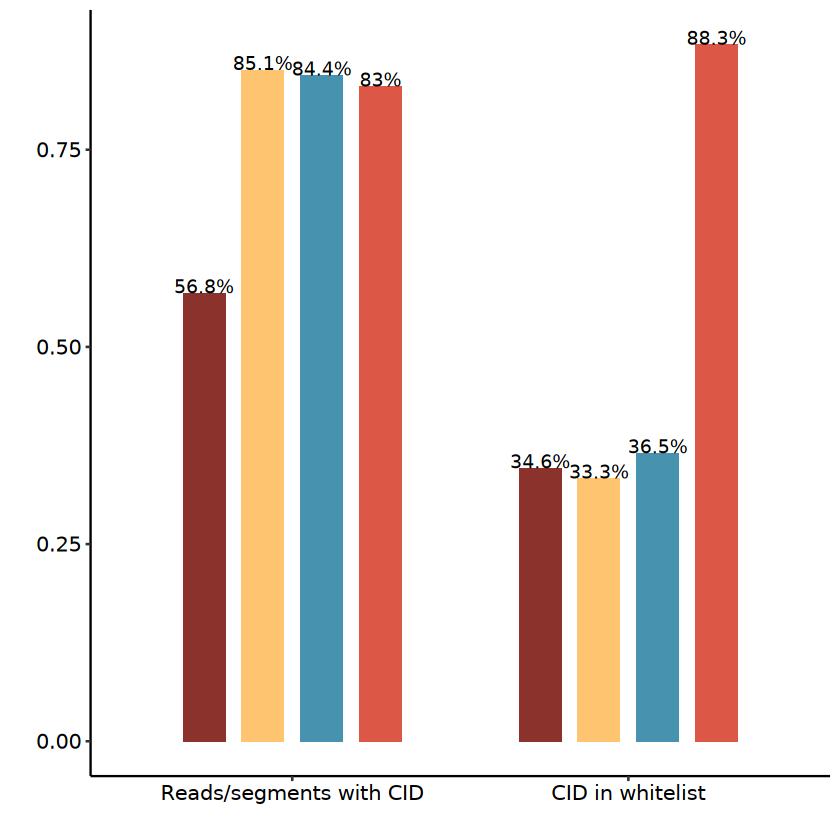

In [55]:
#read recover ratio
#cidextract cidmapping total
readNum = data.frame("process" = c("Reads/segments with CID",
                                     "Reads/segments with CID",
                                     "Reads/segments with CID",
                                     "Reads/segments with CID",
                                       "Reads/segments in gene body",
                                       "Reads/segments in gene body",
                                       "Reads/segments in gene body",
                                       "Reads/segments in gene body",
                                     "CID in whitelist",
                                     "CID in whitelist",
                                     "CID in whitelist",
                                     "CID in whitelist"), 
                       "group" = c("Direct-nanopore",
                                   "Fullscope-nanopore",
                                   "Fullscope-cyclone",
                                   "Fullscope-pacbio",
                                   "Direct-nanopore",
                                   "Fullscope-nanopore",
                                   "Fullscope-cyclone",
                                   "Fullscope-pacbio",
                                   "Direct-nanopore",
                                   "Fullscope-nanopore",
                                   "Fullscope-cyclone",
                                   "Fullscope-pacbio"
                                   ),
                       "readpro" = c(0.568,0.851,0.844,0.830,
                                     0.881,0.772,0.774,0.0,
                                     0.346,0.333,0.365,0.883),
                       "readnum" = c(266132945,395960173,218224640,0,
                                     234557420,305759487,168868526,0,
                                     81258376,101723248,61588682,0)

                       )
write.csv(readNum,file = "/cluster/home/liuhengxin/P1_brain_nanopore/downstream_analysis/result/figure1/read_stat_24_08_19.csv",quote = F, row.names = F)
readNum = readNum[readNum$process != "Reads/segments in gene body",] 
readNum$readprochar = paste0(readNum$readpro * 100,"%")

  readNum$process = factor(readNum$process,
                           levels = c("Reads/segments with CID",
                                      "CID in whitelist"))
  readNum$group = factor(readNum$group,
                           levels = c("Direct-nanopore","Fullscope-nanopore","Fullscope-cyclone","Fullscope-pacbio"))
  mycolor = c('#8B322C','#DD5746','#FFC470','#4793AF')
  names(mycolor) = c("Direct-nanopore","Fullscope-pacbio","Fullscope-nanopore","Fullscope-cyclone")

  library(ggpubr)
  library(ggsci)
  p1b = ggplot(readNum[], aes(x = process, y = readpro,fill = group)) + 
    geom_bar(stat = "identity",width = 0.5,
             position = position_dodge(preserve = "single",0.7)) +
    geom_text(aes(x = process, y = readpro, group = group,
                  label = readprochar),
              # angle = 90, 
              position = position_dodge(0.7),
              vjust = 0) +
    scale_fill_manual(values = mycolor) +
    xlab("") + ylab("") +
    theme_pubr() + theme(legend.position = "none")
    #theme(axis.text.x = element_text(angle = 45,vjust = 0.5))
  p1b
  
  ggsave(p1b, filename = "result/figure1/f1b_cid_mapped_rate_24_08_231.pdf",
         width = 5,height = 4,
         units = "in")


## F1E-F.Spatial coverage compare between ngs and long reads

#### NGS coverage stat

In [ ]:
ngsref = fread("/cluster/home/liuhengxin/P1_brain_nanopore/ref/T44.txt")
head(ngsref)
refpos = unique(paste0(ngsref$x,"_",ngsref$y))
library(data.table)
ngsfilels = list.files(path = "/cluster/home/liuhengxin/P1_brain_nanopore/downstream_analysis/data/reads_full_anotation/ngs_readid_total_cut/",
          pattern = "*2.out",full = T)
ngsfilels
ngscount = NULL
ngscount = ngscount %>% group_by(CID) %>% summarise(umi_count = sum(umi_count))
head(ngscount)
qsave(ngscount,"/cluster/home/liuhengxin/P1_brain_nanopore/downstream_analysis/data/reads_full_anotation/ngs_readid_total_stat_24_05_27.qs")
ngscount = qread("/cluster/home/liuhengxin/P1_brain_nanopore/downstream_analysis/data/reads_full_anotation/ngs_readid_total_stat_24_05_27.qs")

#ngscount = fread("/cluster/home/liuhengxin/P1_brain_nanopore/ref/T44.txt")
ngscount$x = as.numeric(MySplit(ngscount$CID,"_",1))
ngscount$y = as.numeric(MySplit(ngscount$CID,"_",2))
ra = 50
ngscount$xid = as.integer(ngscount$x/(ra*2)) * ra * 2 + ra
ngscount$yid = as.integer(ngscount$y/(ra*2)) * ra * 2 + ra
ngscount$blockid = paste0(ngscount$xid,"_",ngscount$yid)
ngscount.st = ngscount %>% group_by(blockid) %>% summarise(count = sum(umi_count))
qsave(ngscount,"/cluster/home/liuhengxin/P1_brain_nanopore/downstream_analysis/data/reads_full_anotation/ngs_readid_total_stat_fil_24_05_27.qs")
# for(i in 1:length(ngsfilels)){
#     ngscounti = fread(ngsfilels[i])
#     ngscounti = ngscounti[ngscounti$CID %in% refpos,]
#     ngscount = rbind(ngscount,ngscounti)
# }
# colnames(ngscount) = c("CID","umi_count")
# head(ngscount)

In [5]:
ngscount = qread("/cluster/home/liuhengxin/P1_brain_nanopore/downstream_analysis/data/reads_full_anotation/ngs_readid_total_stat_24_05_27.qs")
head(ngscount)
#ngscount = fread("/cluster/home/liuhengxin/P1_brain_nanopore/ref/T44.txt")

ra = 50
ngscount$x = as.numeric(MySplit(ngscount$CID,"_",1))
ngscount$y = as.numeric(MySplit(ngscount$CID,"_",2))
ngscount$xid = as.integer(ngscount$x/(ra*2)) * ra * 2 + ra
ngscount$yid = as.integer(ngscount$y/(ra*2)) * ra * 2 + ra
ngscount$blockid = paste0(ngscount$xid,"_",ngscount$yid)
ngscount.st = ngscount %>% group_by(blockid) %>% summarise(count = sum(umi_count))
qsave(ngscount.st,file = "result/figure1/spatial_coverage_ngs_stat_total_08_20.qs")

CID,umi_count
<chr>,<int>
0_100022,1
0_100037,1
0_100040,1
0_100060,3
0_100080,2
0_100085,1


ERROR: Error: cons memory exhausted (limit reached?)


In [11]:
geneblmxold = qread("/cluster/home/liuhengxin/P1_brain_nanopore/downstream_analysis/result/figure1/block_readsnum_coverage_cor_05_28.qs")
head(geneblmxold)

,blockid,nano,ngs
,<chr>,<int>,<int>
1,10050_100050,615,3451
2,10050_100150,707,4395
3,10050_100250,879,6012
4,10050_100350,871,6016
5,10050_100450,684,3960
6,10050_100550,498,2887


#### long reads coverage

In [ ]:
reads.total = qread(file = "data/reads_full_anotation/read_total_spatial_24_08_20.qs")

In [ ]:
ra = 50
reads.total$x = as.numeric(MySplit(reads.total$cidPos,":|_",1))
reads.total$y = as.numeric(MySplit(reads.total$cidPos,":|_",2))
reads.total$xid = as.integer(reads.total$x/(ra*2)) * ra * 2 + ra
reads.total$yid = as.integer(reads.total$y/(ra*2)) * ra * 2 + ra
reads.total$blockid = paste0(reads.total$xid,"_",reads.total$yid)
longst = reads.total %>% group_by(blockid) %>% summarise(count = length(unique(readid)))
qsave(longst,file = "result/figure1/spatial_coverage_stat_total_08_20.qs")
head(longst)

Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"


In [46]:
longst = qread("result/figure1/spatial_coverage_stat_total_08_20.qs")
head(longst)
ngscount.st = geneblmxold[,c(1,3)]
colnames(ngscount.st) = c("blockid","count")

blockid,count
<chr>,<int>
10050_100050,522
10050_100150,609
10050_100250,757
10050_100350,755
10050_100450,543
10050_100550,401


#### reads density compare

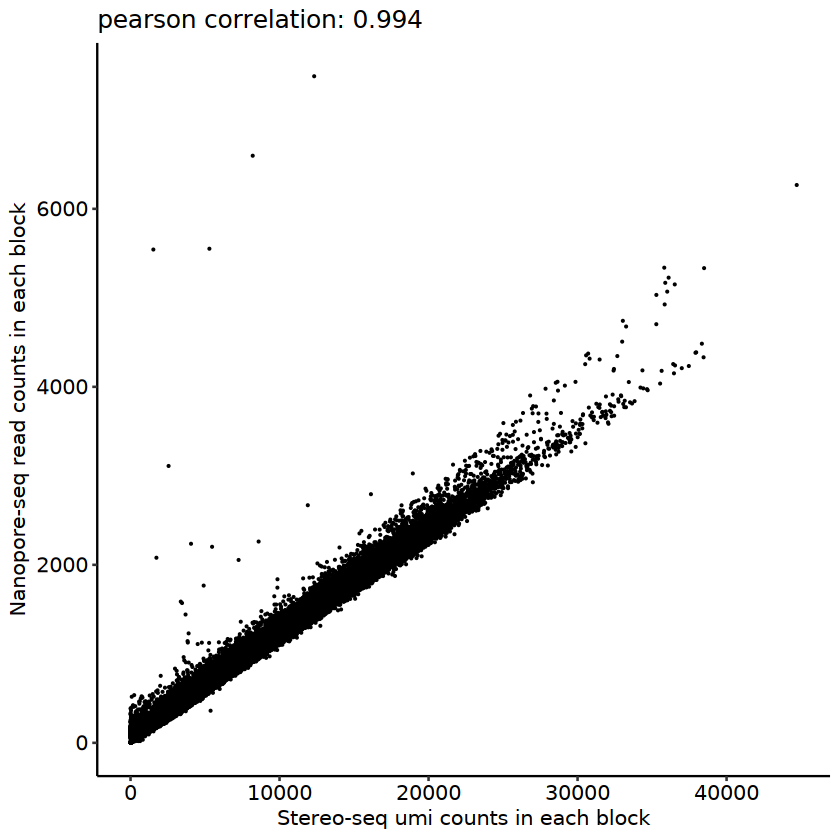

In [47]:
#colnames(ngscount) = c("blockid","count")
geneblmx = merge(longst,ngscount.st,by = c("blockid"))
colnames(geneblmx)[2:3] = c("nano","ngs")
gcor = cor(geneblmx$nano,geneblmx$ngs)
qsave(geneblmx,file = "result/figure1/block_readsnum_coverage_cor_08_20.qs")
p1d = ggplot(geneblmx,aes(x = ngs, y = nano)) +
    geom_point(size = 0.1) +
    xlab("Stereo-seq umi counts in each block") +
    ylab("Nanopore-seq read counts in each block") +
    ggtitle(paste0("pearson correlation: ",round(gcor,3))) +
    theme_pubr()
p1d
ggsave(p1d,filename = "result/figure1/block_readsnum_coverage_cor_08_20.pdf",units = "in",
         width = 5,height = 4)

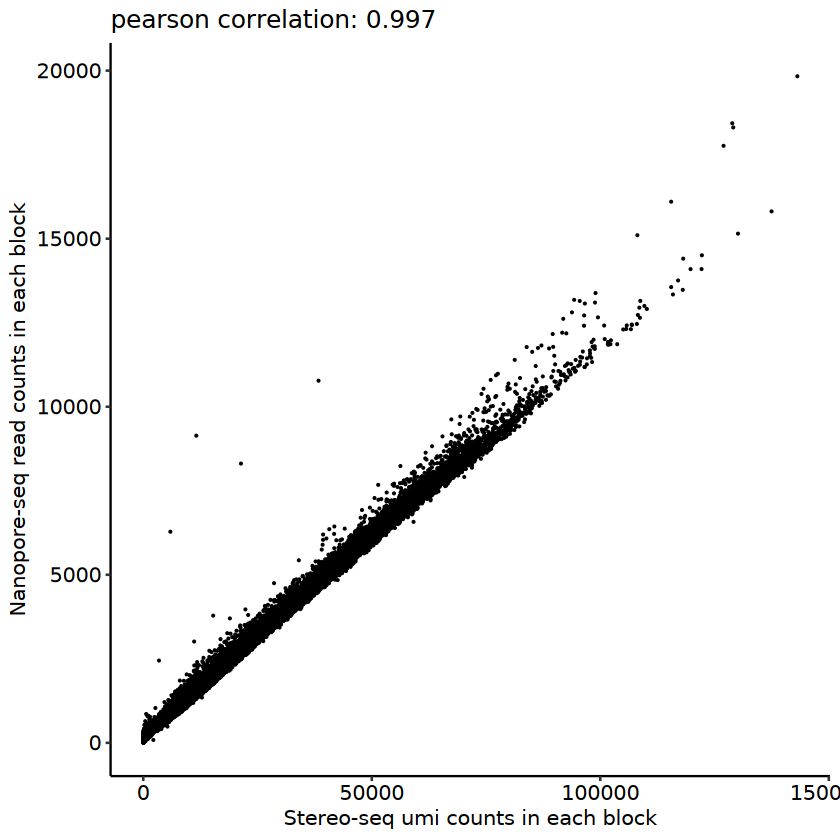

In [8]:
geneblmx = qread(file = "result/figure1/block_readsnum_coverage_cor_08_20.qs")
geneblmx$x = as.numeric(MySplit(geneblmx$blockid,"_",1))
geneblmx$y = as.numeric(MySplit(geneblmx$blockid,"_",2))
geneblmx2 = geneblmx
ra = 100
geneblmx2$xid = as.integer(geneblmx2$x/(ra*2)) * ra * 2 + ra
geneblmx2$yid = as.integer(geneblmx2$y/(ra*2)) * ra * 2 + ra
geneblmx2$blockid = paste0(geneblmx2$xid,"_",geneblmx2$yid)
geneblmx2 = geneblmx2 %>% group_by(blockid) %>% summarise(ngs = sum(ngs),nano = sum(nano))
geneblmx2$x = as.numeric(MySplit(geneblmx2$blockid,"_",1))
geneblmx2$y = as.numeric(MySplit(geneblmx2$blockid,"_",2))
gcor = cor(geneblmx2$nano,geneblmx2$ngs)
p1d = ggplot(geneblmx2,aes(x = ngs, y = nano)) +
    geom_point(size = 0.1) +
    #geom_smooth() +
    xlab("Stereo-seq umi counts in each block") +
    ylab("Nanopore-seq read counts in each block") +
    ggtitle(paste0("pearson correlation: ",round(gcor,3))) +
    theme_pubr()
p1d 
ggsave(p1d,filename = "result/figure1/block_readsnum_coverage_cor_bin100_08_20.pdf",units = "in",
         width = 5,height = 4)

Using blockid as id variables

Warning message:
"attributes are not identical across measure variables; they will be dropped"
Warning message:
"The `panel.margin` argument of `theme()` is deprecated as of ggplot2 2.2.0.
ℹ Please use the `panel.spacing` argument instead."


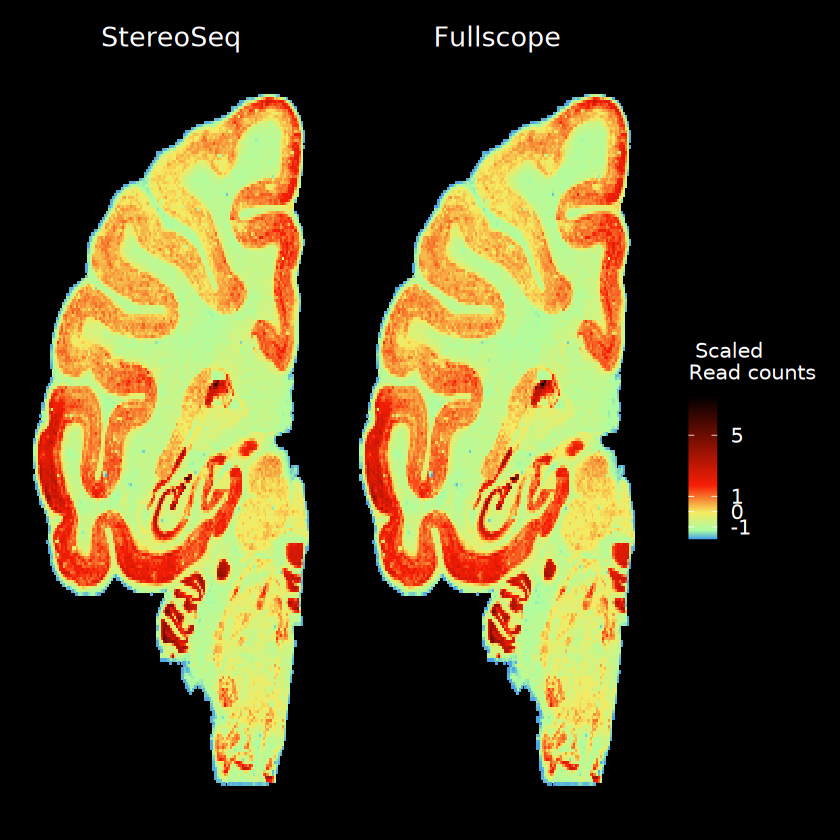

In [51]:
 MySplit = function(str,sep, n){
    return(unlist(lapply(strsplit(str,sep),"[[",n)))
  }
  geneblmx2$x = as.numeric(MySplit(geneblmx2$blockid,"_",1))
  geneblmx2$y = as.numeric(MySplit(geneblmx2$blockid,"_",2))
  # pref = qread("processed/spatial_basic_plot/area_figure_an.qs")
  
  geneblmx2$StereoSeq = scale(geneblmx2$ngs)
  geneblmx2$Fullscope = scale(geneblmx2$nano)
  geneblmxt = melt(geneblmx2[c("blockid","StereoSeq","Fullscope")])
  geneblmxt$x = as.numeric(MySplit(geneblmxt$blockid,"_",1))
  geneblmxt$y = as.numeric(MySplit(geneblmxt$blockid,"_",2))
  qsave(geneblmxt,file = "result/figure1/block_readsnum_stat_05_28.qs")
  
  cols1 <- colorRampPalette(c("#45a0ea", "#adfda2"))
  cols2 <- colorRampPalette(c( "#adfda2","#f7ea60"))
  cols3 <- colorRampPalette(c( "#f7ea60","#f71e06"))
  cols4 <- colorRampPalette(c( "#f71e06","black"))
  cols = c(cols1(20),cols2(40),cols3(60),cols4(200))

  
  p1c = ggplot() +
    geom_tile(data = geneblmxt,
              aes(x,y,fill = value)) +
    # geom_segment(data = precf$areaedges, aes(x = x1, y = y1, xend = x2, yend = y2),
    #              size = 0.5,color = "black") + 
    # scale_fill_viridis() +
    scale_fill_gradientn(colors = cols,breaks = c(-1,0,1,5)) +
    facet_grid(~variable)+ labs(fill = " Scaled\nRead counts") +
    # theme_void() + theme(panel.background = element_rect(fill = "black")) +
    theme_presentation() + 
    scale_y_reverse() + scale_x_reverse()
  p1c
  ggsave(p1c,filename = "result/figure1/f1c.block_readsnum_scaled_tile_cmp_bin200_8_21.pdf",units = "in",
         width = 10,height = 7)

#### cell coverage compare

In [104]:
##Cell read number stat
cell.st = read.totalan[read.totalan$class!= "",] %>% group_by(cell_id) %>% summarise(readnum = length(unique(readid)),
                                                                         genenum = length(unique(gene_id)),
                                                                         transnum = length(unique(transcript_id)))
summary(cell.st$readnum)
summary(cell.st$genenum)
summary(cell.st$transnum)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    1.0    55.0    90.0   108.1   142.0  1311.0 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    1.0    36.0    57.0    68.3    89.0   701.0 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    1.0    64.0   106.0   127.5   169.0  1383.0 

In [8]:
ngscountf = ngscount[ngscount$cell_id != 0,]
ngscount.st = ngscountf %>% group_by(cell_id) %>% summarise(umicount = sum(umi_count),genecount = length(unique(gene_name)))
summary(ngscount.st$umicount)
summary(ngscount.st$genecount)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    3.0   303.0   540.0   665.1   906.0 19169.0 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    3.0   187.0   317.0   367.7   504.0  4549.0 

In [14]:
summary(cell.st$readnum)
summary(cell.st$genenum)
summary(cell.st$transnum)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00   40.00   65.00   79.63  104.00 1051.00 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    1.0    32.0    51.0    61.1    80.0   651.0 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00   33.00   53.00   63.58   83.00  692.00 

In [86]:
nrow(ngscount.st)
nrow(cell.st)
colnames(ngscount.st) = c("cell_id","uminum","genenum.ngs")

[1] 317609

[1] 388455

ERROR: Error in names(x) <- value: 'names' attribute [3] must be the same length as the vector [2]


[1] 0.001919788

[1] 0.002575091

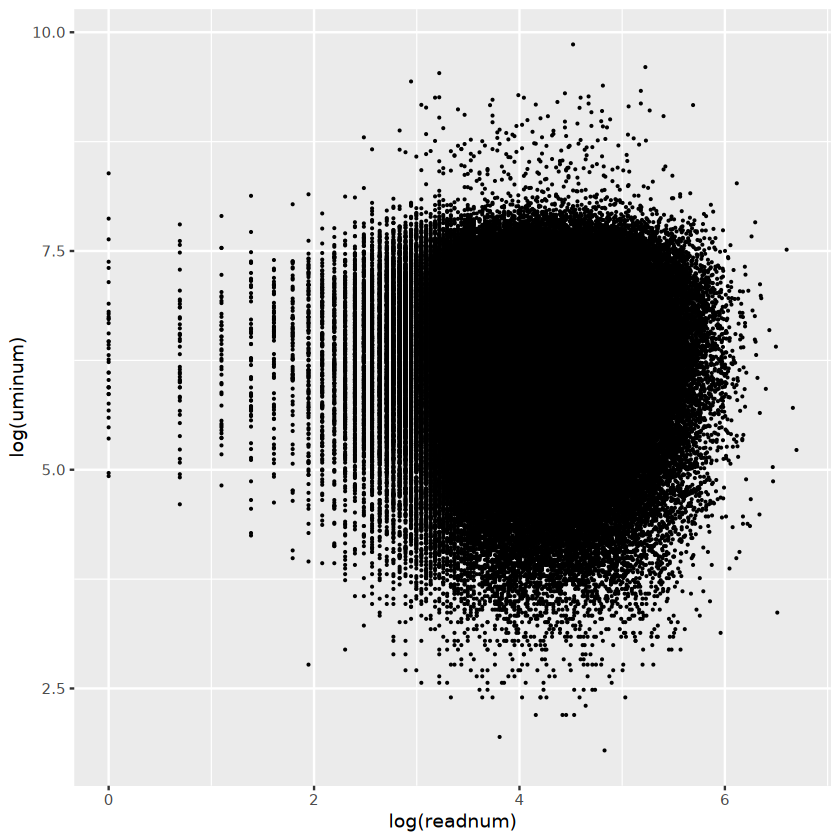

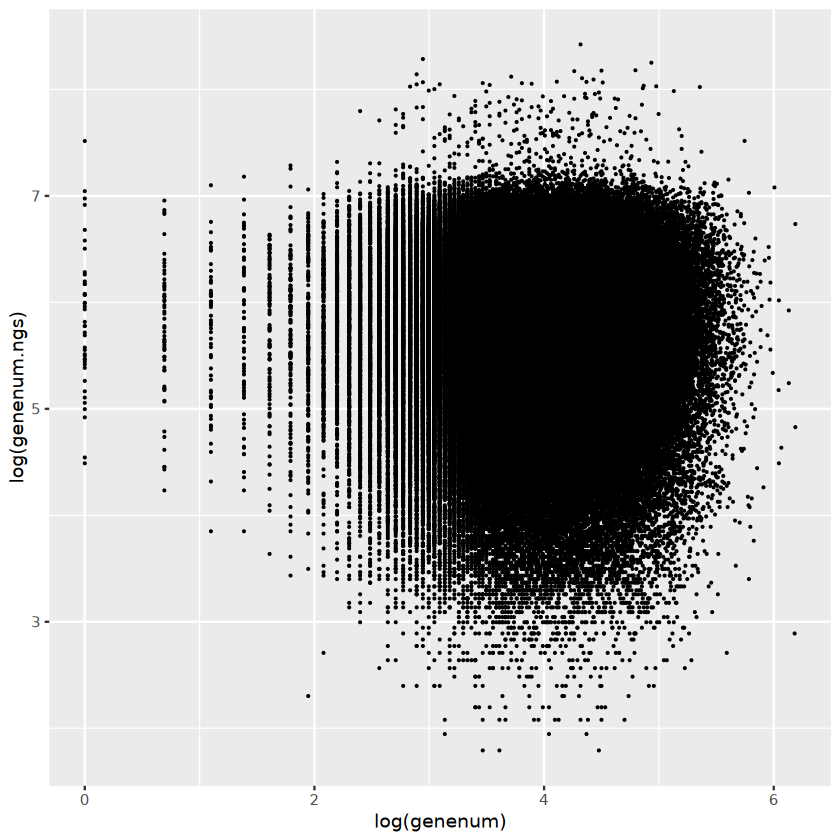

In [12]:
cmpcont = merge(ngscount.st,cell.st,by = "cell_id")
cor(log(cmpcont$readnum),log(cmpcont$uminum))
cor(log(cmpcont$genenum),log(cmpcont$genenum.ngs))
ggplot(cmpcont,aes(x = log(readnum),y = log(uminum))) + geom_point(size = 0.1)
ggplot(cmpcont,aes(x = log(genenum),y = log(genenum.ngs))) + geom_point(size = 0.1)

In [13]:
qsave(cmpcont,file = "result/figure1/ngs_nano_cmp_05_04.qs")

In [33]:
length(unique(ngscount$gene_name))
#ngscount = ngscount[ngscount$gene_name %in% fsrawdp$gene_id,]
length(unique(ngscount$gene_name))

[1] 16159

[1] 14155

In [ ]:
samplels = c("/cluster/share/mouse_atlas/ST_mouse/total_gene_2D/mouse1-20230119/total_gene_T312_mouse_f001_2D_mouse1-20230119.txt",
             "/cluster/share/mouse_atlas/ST_mouse/total_gene_2D/mouse1-20230119/total_gene_T313_mouse_f001_2D_mouse1-20230119.txt",
             "/cluster/share/mouse_atlas/ST_mouse/total_gene_2D/mouse1-20230119/total_gene_T314_mouse_f001_2D_mouse1-20230119.txt",
             "/cluster/share/mouse_atlas/ST_mouse/total_gene_2D/mouse1-20230119/total_gene_T315_mouse_f001_2D_mouse1-20230119.txt",
             "/cluster/share/mouse_atlas/ST_mouse/total_gene_2D/mouse1-20230119/total_gene_T316_mouse_f001_2D_mouse1-20230119.txt",
             "/cluster/share/mouse_atlas/ST_mouse/total_gene_2D/mouse1-20230119/total_gene_T317_mouse_f001_2D_mouse1-20230119.txt",
             "/cluster/share/mouse_atlas/ST_mouse/total_gene_2D/mouse1-20230119/total_gene_T318_mouse_f001_2D_mouse1-20230119.txt",
             "/cluster/share/mouse_atlas/ST_mouse/total_gene_2D/mouse1-20230119/total_gene_T319_mouse_f001_2D_mouse1-20230119.txt",
            "/cluster/share/mouse_atlas/ST_mouse/total_gene_2D/mouse1-20230119/total_gene_T322_mouse_f001_2D_mouse1-20230119.txt",
            "/cluster/share/mouse_atlas/ST_mouse/total_gene_2D/mouse1-20230119/total_gene_T332_mouse_f001_2D_mouse1-20230119.txt")
sampleid = c("T312","T313","T314","T315","T316","T317","T318","T319","T322","T332")
binst = NULL
for(i in 1:length(samplels)){
    samplei = samplels[i]
    tgdfls = fread(samplei)
    bin1i = tgdfls %>% group_by(x,y) %>% summarise(umi_count = sum(umi_count),gene_count = length(unique(gene)))
    stumi = summary(bin1i$umi_count)
    stumigc = summary(bin1i$gene_count)
    bin1sti = data.frame("group" = c("umi","gene"),"median_count" = c(stumi[3],stumigc[3]),"mean_count" = c(stumi[4],stumigc[4]))

    ra = 50
    bin1i$xid = as.integer(bin1i$x/(ra*2)) * ra * 2 + ra
    bin1i$yid = as.integer(bin1i$y/(ra*2)) * ra * 2 + ra
    bin1i$blockid = paste0(bin1i$xid,"_",bin1i$yid)
    bin50i = bin1i %>% group_by(blockid) %>% summarise(umi_count = sum(umi_count),gene_count = sum(gene_count))
    stumi = summary(bin50i$umi_count)
    stumigc = summary(bin50i$gene_count)
    bin50sti = data.frame("group" = c("umi","gene"),"median_count" = c(stumi[3],stumigc[3]),"mean_count" = c(stumi[4],stumigc[4]))
    bin1sti$resolution = "bin1"
    bin50sti$resolution = "bin50"
    binsti = rbind(bin1sti,bin50sti)
    binsti$sample = sampleid[i]
    binst = rbind(binst,binsti)
}
binst

`summarise()` has grouped output by 'x'. You can override using the `.groups`
argument.
`summarise()` has grouped output by 'x'. You can override using the `.groups`
argument.
`summarise()` has grouped output by 'x'. You can override using the `.groups`
argument.
`summarise()` has grouped output by 'x'. You can override using the `.groups`
argument.


In [35]:
write.csv(binst,file = "result/figure1/mouse_stereoseq_bin_stat_24_06_20.csv",row.names = F, quote = F)

group,median_count,mean_count,resolution,sample
<chr>,<dbl>,<dbl>,<chr>,<chr>
umi,2.0,2.417583,bin1,T312
gene,1.0,1.579632,bin1,T312
umi,3045.0,4385.226707,bin50,T312
gene,1991.0,2865.276870,bin50,T312
umi,2.0,2.594769,bin1,T313
gene,1.0,1.666739,bin1,T313
umi,2809.0,4972.751939,bin50,T313
gene,1836.0,3194.226594,bin50,T313
umi,2.0,2.230062,bin1,T314


In [ ]:
bin1sti = tgdfls %>% group_by(x,y) %>% summarise(umi_count = sum(umi_count),gene_count = length(unique(gene)))
summary(bin1sti$umi_count)
summary(bin1sti$gene_count)

`summarise()` has grouped output by 'x'. You can override using the `.groups`
argument.


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
   1.000    1.000    2.000    2.418    3.000 1610.000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    1.00    1.00    1.58    2.00  770.00 

In [22]:
ra = 50
bin1sti$xid = as.integer(bin1sti$x/(ra*2)) * ra * 2 + ra
bin1sti$yid = as.integer(bin1sti$y/(ra*2)) * ra * 2 + ra
bin1sti$blockid = paste0(bin1sti$xid,"_",bin1sti$yid)
bin50sti = bin1sti %>% group_by(blockid) %>% summarise(umi_count = sum(umi_count),gene_count = sum(gene_count))
summary(bin50sti$umi_count)
summary(bin50sti$gene_count)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      1     858    3045    4385    7290   20385 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      1     598    1991    2865    4815   12818 

In [26]:
tmp = unlist(summary(bin50sti$umi_count))

In [32]:
tmp[3]

Median 
  3045 

## Spatial annotation

In [ ]:
#f1e-g. slice annotation of cell
{
  refpos = qread("processed/minHash_Match_result_9ero2_threshold_filter_withan_withcl_23_03_29.qs")
  myrange = qread("processed/spatial_basic_plot/area_figure_an.qs")
  refpos = refpos[!is.na(refpos$cell_id),]
  refpos = unique(refpos[c("x","y","origin_name","cell_id",
                           "cell_type","subclass","class")])
  refpos$areaid = refpos$arealayer = refpos$origin_name
  refpos[refpos$areaid != "background","areaid"] = MySplit(refpos[refpos$areaid != "background","areaid"],
                                                           "-",2)
  refpos[refpos$arealayer != "background","arealayer"] = MySplit(refpos[refpos$areaid != "background","arealayer"],
                                                           "-",3)
  refpos[!refpos$arealayer %in% paste0("l",1:6), "areaid"] = 
    refpos[!refpos$arealayer %in% paste0("l",1:6), "arealayer"]
  refpos = refpos[refpos$arealayer %in% paste0("l",1:6),]
  refpos$areaid = as.character(refpos$areaid)
  refpos = merge(refpos,areaan,by = "areaid")
  
  qsave(refpos,file = "processed/figures/f1/f1e-f.spatial_cell_an_fil_05_29.qs")
  refpos = qread("processed/figures/f1/f1e-f.spatial_cell_an_fil_05_29.qs")
  
  #area plot
  reflabel = refpos %>% group_by(areaid) %>% summarise(xmid = median(x), ymid = median(y))
  reflabel[which(reflabel$areaid == "1|2"), "areaid"] = "1/2"
  refpos[which(refpos$areaid == "1|2"), "areaid"] = "1/2"
  areaorder = c("IG","29","30","23a","23b","31","23c","1/2","PE","PEa","VIP","LIPv","LIPd",
                "PG","7op","CM","AI","CL","CPB","TPO","PGa","FST","V4t","V4","TEO","TEpd",
                "TEpv","TFO","V3v","V2","v23b","paraS","preS","Sub","DG","proS","CA1",
                "CA2","CA3","CA4","lv","cd","cb","SC","IC","PAG","LC","V","VII")
  # refpos$areaid =  factor(refpos$areaid,levels = areaorder)
  reflabel$areaid =  factor(reflabel$areaid,levels = areaorder)
  
  library(alphahull)
  areaedges = NULL
  for (areai in areaorder) {
    print(areai)
    reftmp = refpos[refpos$areaid == areai,]
    reftmp = unique(reftmp[c("x","y")])
    myalpha = ashape(reftmp,alpha = 200)
    areaedgei = as.data.frame(myalpha$edges)
    areaedgei$areaid = areai
    areaedges = rbind(areaedges,areaedgei)
  }
  areaedges = myrange$areaedges
  areaedges = areaedges[areaedges$areaid %in% refpos$areaid,]
  # pareat = ggplot() +
  #   geom_segment(data = areaedges, aes(x = x1, y = y1, xend = x2, yend = y2),
  #                size = 0.5,color = "black") + 
  #   geom_text(data = reflabel, aes(y = ymid, x = xmid, label= areaid),size = 3) +
  #   scale_color_viridis(discrete = T) +
  #   theme_void() + theme(legend.position = "none") +
  #   scale_y_reverse() + scale_x_reverse()
  # pareat
  raster.dpi=c(512, 512)
  library(khroma)
  parea = ggplot() +
    scattermore::geom_scattermore(
      data = refpos,
      aes(x, y, color = L0),
      pixels = raster.dpi,
      pointsize = 0.01
    ) +
    # geom_point(data = refpos,
    #            aes(x, y, color = L0),
    #            size = 0.01) + 
    geom_segment(data = areaedges, aes(x = x1, y = y1, xend = x2, yend = y2),
                 size = 0.5,color = "white",alpha = 0.5) + 
    geom_text(data = reflabel, aes(y = ymid, x = xmid, label= areaid),
              color = "white") +
    scale_color_vibrant() +
    theme_presentation() +
    guides(color = guide_legend(override.aes = list(size=3),
                                title = "Conventional lobes")) +
    # theme(legend.title = element_blank()) +
    scale_y_reverse() + scale_x_reverse()
  parea
  
  # dir.create("processed/spatial_basic_plot")
  # ggsave(pareat, filename = "processed/spatial_basic_plot/area_annotation_plot.pdf",
  #        units="in",
  #        width = 8,height = 10)
  
  # ggsave(parea, filename = "processed/figures/f1/f1e.area_annotation_plot_shape.png",
  #        units="in",
  #        width = 12,height = 10)
  
  #layer plot
  refpos$arealayer = unlist(lapply(strsplit(refpos$origin_name,"-"),"[[",3))
  layerorder = unique(refpos$arealayer)
  layerorder = layerorder[order(layerorder)]
  layeredges = NULL
  for (areai in layerorder) {
    print(areai)
    reftmp = refpos[refpos$arealayer == areai,]
    reftmp = unique(reftmp[c("x","y")])
    myalpha = ashape(reftmp,alpha = 200)
    areaedgei = as.data.frame(myalpha$edges)
    areaedgei$areaid = areai
    layeredges = rbind(layeredges,areaedgei)
  }
  layeredges = myrange$layeredges
  # playert = ggplot() +
  #   geom_segment(data = layeredges, aes(x = x1, y = y1, xend = x2, yend = y2),
  #                size = 0.5,color = "black") + 
  #   scale_color_smoothrainbow(discrete = T) +
  #   theme_void() + scale_y_reverse() + scale_x_reverse()
  # playert
  # 
  # player = ggplot() +
  #   geom_point(data = refpos, aes(x, y, color = arealayer),size = 0.5) + 
  #   geom_segment(data = layeredges, aes(x = x1, y = y1, xend = x2, yend = y2),
  #                size = 0.5,color = "black") + 
  #   geom_text(data = reflabel, aes(y = ymid, x = xmid, label= areaid)) +
  #   scale_color_viridis(discrete = T) +
  #   theme_void() + scale_y_reverse() + scale_x_reverse()
  # player
  # 
  playerno = ggplot() +
    scattermore::geom_scattermore(
      data = refpos,
      aes(x, y, color = arealayer),
      pixels = raster.dpi,
      pointsize = 0.01
    ) +
    # geom_point(data = refpos,
    #            aes(x, y, color = arealayer),size = 0.01) + 
    # geom_text(data = reflabel, aes(y = ymid, x = xmid, label= areaid),
    #           color = "white") +
    scale_color_discreterainbow() +
    guides(color = guide_legend(override.aes = list(size=3),
                                title = "Cortex layer")) +
    theme_presentation() + scale_y_reverse() + scale_x_reverse()
  playerno
  
  psubcell = ggplot() +
    scattermore::geom_scattermore(
      data = refpos,
      aes(x, y, color = subclass),
      pixels = raster.dpi,
      pointsize = 0.001
    ) +
    # geom_point(data = refpos,
    #            aes(x, y, color = subclass),size = 0.01) + 
    # geom_text(data = reflabel, aes(y = ymid, x = xmid, label= areaid),
    #           color = "white") +
    scale_color_smoothrainbow(discrete = T) +
    guides(color = guide_legend(override.aes = list(size=3),
                                title = "Cell subclass")) +
    theme_presentation() + scale_y_reverse() + scale_x_reverse()
  psubcell
  p1e_g = ggarrange(parea,playerno,psubcell,ncol = 3,widths = c(0.9,0.8,1))
  p1e_g
  ggsave(p1e_g, filename = "processed/figures/f1/f1e_g.annotation_plot_shape_total_scatter_05_29.pdf",
         units="in",
         width = 18,height = 5)
  
  ggsave(parea, filename = "processed/figures/f1/f1e.area_annotation_plot_shape_05_29.pdf",
         units="in",
         width = 6,height = 5)
  # ggsave(player, filename = "processed/spatial_basic_plot/arealayer_annotation_plot_shape.png",
  #        units="in",
  #        width = 8,height = 9)
  ggsave(playerno, filename = "processed/figures/f1/f1f.arealayer_annotation_plot_noshape_05_29.pdf",
         units="in",
         width = 5,height = 5)
  ggsave(psubcell, filename = "processed/figures/f1/f1g.subcell_annotation_plot_noshape_05_29.pdf",
         units="in",
         width = 6,height = 5)
  qsave(list("layeredges" = layeredges,"areaedges" = areaedges,
             "player" = player,"parea" = parea, "areaorder" = areaorder),
        file = "processed/spatial_basic_plot/area_figure_an.qs")
  
  
}

## Gene annotation filter

In [262]:
gtfinfo = qread("ref/bambu_extended_annotations_transinfo.qs")
gtfinfo = gtfinfo$transinfo

gtfinfokn.tr = gtfinfo[gtfinfo$novelTranscript != TRUE,]
gtfinfonv.tr = gtfinfo[gtfinfo$novelTranscript == TRUE,]
gtfinfokn.tr[is.na(gtfinfokn.tr$readCount),]$readCount = 0
gtfinfonv.trf = gtfinfonv.tr[!is.na(gtfinfonv.tr$NDR) & gtfinfonv.tr$NDR < 0.80,]
gtfinfofil = rbind(gtfinfonv.trf,gtfinfokn.tr)

gtfinfokn = gtfinfofil[gtfinfofil$novelGene  != TRUE,]
gtfinfonv = gtfinfofil[gtfinfofil$novelGene  == TRUE,]

gtfinfonv.st = as.data.frame(gtfinfonv) %>% group_by(GENEID) %>% summarise(fullLengthCounts = sum(fullLengthCounts))
gtfinfonv.st = gtfinfonv.st[gtfinfonv.st$fullLengthCounts > 30,]
gtfinfonv = gtfinfonv[gtfinfonv$GENEID %in% gtfinfonv.st$GENEID,]
gtfinfo = rbind(as.data.frame(gtfinfonv),as.data.frame(gtfinfokn))

[1] 117150

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
     0.0      0.0      9.0   1604.4    165.1 723260.0 

[1] 28023

[1] 6279

In [289]:
head(gtfinfo)

,TXNAME,GENEID,NDR,novelGene,novelTranscript,txClassDescription,readCount,relReadCount,relSubsetCount,txid,eqClassById,fullLengthCounts
,<chr>,<chr>,<dbl>,<lgl>,<lgl>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<list>,<dbl>
BambuTx11,BambuTx11,BambuGene6274,0.5074496,TRUE,TRUE,newGene-spliced,71,0.8352941,0.8352941,11,"11, 4250....",40.14176
BambuTx12,BambuTx12,BambuGene6293,0.6035481,TRUE,TRUE,newGene-spliced,39,1.0000000,1.0000000,12,12,42.00000
BambuTx24,BambuTx24,BambuGene53,0.7333873,TRUE,TRUE,newGene-spliced,31,1.0000000,1.0000000,24,24,33.00000
BambuTx31,BambuTx31,BambuGene6352,0.4392864,TRUE,TRUE,newGene-spliced,401,0.9457547,0.9457547,31,"31, 42588",393.88151
BambuTx33,BambuTx33,BambuGene6357,0.6670452,TRUE,TRUE,newGene-spliced,193,1.0000000,1.0000000,33,33,193.00000
BambuTx34,BambuTx34,BambuGene92,0.6288726,TRUE,TRUE,newGene-spliced,131,1.0000000,1.0000000,34,34,133.00000


In [263]:
gtf = rtracklayer::import("../ref/bambu_extended_annotations.gtf")
length(gtf)
gtff = gtf[gtf$transcript_id %in% c(gtfinfokn$TXNAME,gtfinfonv$TXNAME),]
length(gtff)

[1] 1152247

[1] 1081267

In [264]:
#gtf new transname
gtfdf = as.data.frame(gtff)
gtfdfan = gtfdf[gtfdf$type == "transcript",]
gtfdfan = gtfdfan[order(gtfdfan$gene_id,gtfdfan$start,gtfdfan$end,gtfdfan$transcript_id),]
gtfdfan$trantype = "known"
gtfdfan[substr(gtfdfan$transcript_id,1,5) == "Bambu",]$trantype = "novel"
gtfdfan$transnew = gtfdfan$transcript_id
gtfdfan.known = gtfdfan[gtfdfan$trantype == "known",]
gtfdfan.novel = gtfdfan[gtfdfan$trantype == "novel",]
gtfdfan.novel = gtfdfan.novel %>% group_by(gene_id) %>% mutate(transnew = paste0(gene_id,"-WeiLab-",1:n()))
gtfdfan.novel = gtfdfan.novel[gtfdfan.novel$width > 200,]
gtfdfan = rbind(gtfdfan.novel,gtfdfan.known)
write.csv(gtfdfan,file = "ref/gtf_new_transcript_name_map_04_30.csv",row.names = F,quote = F)
gtff = gtff[gtff$gene_id %in% gtfdfan$gene_id,]
gtff$transcript_name = gtfdfan[match(gtff$transcript_id,gtfdfan$transcript_id),]$transnew
gtff$transcript_id = gtff$transcript_name

In [265]:
length(gtff)
rtracklayer::export(gtff,"ref/bambu_extended_annotations_novelname_fil_04_30.gtf",format = "gtf")

[1] 1081267

In [266]:
gtfinfonv = gtfinfonv[gtfinfonv$GENEID %in% gtff$gene_id,]
gtfinfo = rbind(as.data.frame(gtfinfonv),as.data.frame(gtfinfokn))
nrow(gtfinfo)
qsave(gtfinfo,"ref/bambu_extended_annotations_transinfo_filter_24_05_01.qs")

[1] 94034

file saved to result/figure1/novel_gene_stat.pdf



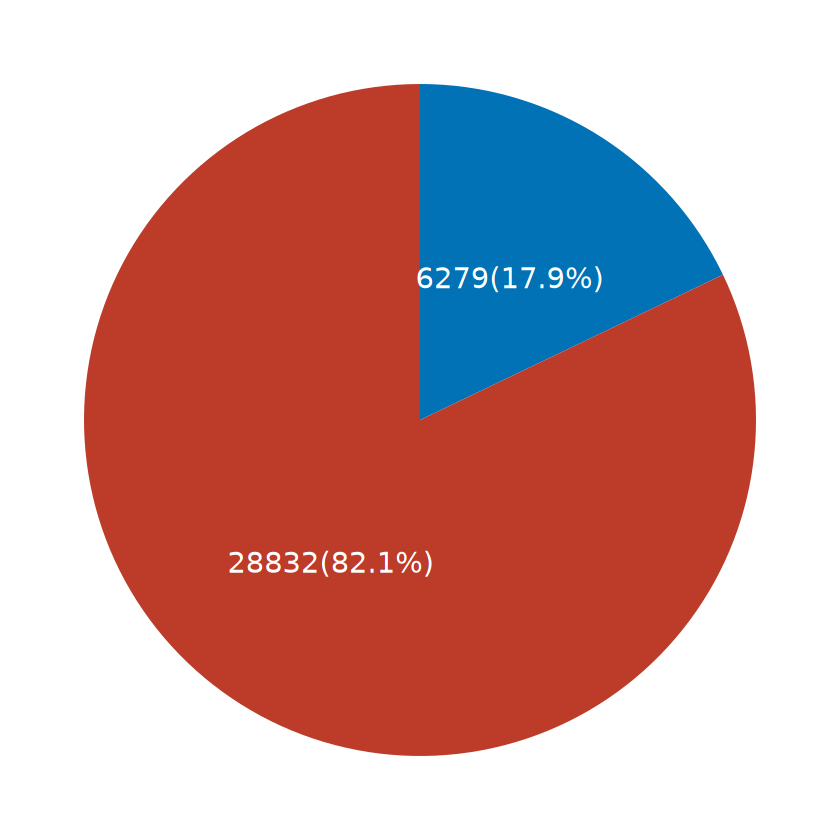

In [267]:
#stat gene pie plot
gtfkn = gtf[substr(gtf$transcript_id,1,5) != "Bambu",]
genet.st = data.frame("type" = c("Known","Novel"), "count" = c(length(unique(gtfkn$gene_id)),length(unique(gtfinfonv$GENEID))))
genet.st <- genet.st %>% arrange(desc(type)) %>%
  mutate(prop = count / sum(genet.st$count) *100) %>%
  mutate(ypos = cumsum(prop)- 0.5*prop )
genet.st$proplabel = paste0(genet.st$count,"(", round(genet.st$prop,1),"%)")

p1.1 = ggplot(genet.st, aes(x="", y=prop, fill=type)) +
  geom_bar(stat="identity", width=1, color= NA) +
  coord_polar("y", start=0) +
  theme_void() + 
  theme(legend.position="none") +
  geom_text(aes(y = ypos, label = proplabel), color = "white", size=6) +
  scale_fill_nejm()
p1.1
ggexport(p1.1,filename = "result/figure1/novel_gene_stat.pdf",width = 5,height = 4)

In [5]:
gtfinfo = qread("ref/bambu_extended_annotations_transinfo_filter_24_05_01.qs")
gtfinfo$transtype = "NNC"
gtfinfo[gtfinfo$novelGene == T,]$transtype = "NovelGene"
gtfinfo[gtfinfo$txClassDescription %in% c("newWithin","newLastExon","newFirstExon","newFirstExon:newLastExon"),"transtype"] = "NIC"
gtfinfo[gtfinfo$txClassDescription == "annotation","transtype"] = "Known"
datas1$genenan = gtfinfo
head(gtfinfo)

,TXNAME,GENEID,NDR,novelGene,novelTranscript,txClassDescription,readCount,relReadCount,relSubsetCount,txid,eqClassById,fullLengthCounts,transtype
,<chr>,<chr>,<dbl>,<lgl>,<lgl>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<list>,<dbl>,<chr>
BambuTx11,BambuTx11,BambuGene6274,0.5074496,TRUE,TRUE,newGene-spliced,71,0.8352941,0.8352941,11,"11, 4250....",40.14176,NovelGene
BambuTx12,BambuTx12,BambuGene6293,0.6035481,TRUE,TRUE,newGene-spliced,39,1.0000000,1.0000000,12,12,42.00000,NovelGene
BambuTx24,BambuTx24,BambuGene53,0.7333873,TRUE,TRUE,newGene-spliced,31,1.0000000,1.0000000,24,24,33.00000,NovelGene
BambuTx31,BambuTx31,BambuGene6352,0.4392864,TRUE,TRUE,newGene-spliced,401,0.9457547,0.9457547,31,"31, 42588",393.88151,NovelGene
BambuTx33,BambuTx33,BambuGene6357,0.6670452,TRUE,TRUE,newGene-spliced,193,1.0000000,1.0000000,33,33,193.00000,NovelGene
BambuTx34,BambuTx34,BambuGene92,0.6288726,TRUE,TRUE,newGene-spliced,131,1.0000000,1.0000000,34,34,133.00000,NovelGene


In [10]:
#library(xlsx)
install.packages("writexl")
writexl::write_xlsx(datas1, "result/figure1/tables1_25_03_30.xlsx")

Installing package into '/cluster/home/liuhengxin/software/miniconda3_2/envs/r-kernel/lib/R/library'
(as 'lib' is unspecified)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done




                                                               allNew 
                                                                 4010 
                                                           annotation 
                                                                76807 
                                                     newFirstJunction 
                                                                  322 
                                        newFirstJunction:newFirstExon 
                                                                  440 
                                         newFirstJunction:newJunction 
                                                                  388 
                            newFirstJunction:newJunction:newFirstExon 
                                                                  580 
                                                          newJunction 
                                                                  678 
     

file saved to result/figure1/bambu_novel_isoform_stat_bar_25_03_24.pdf



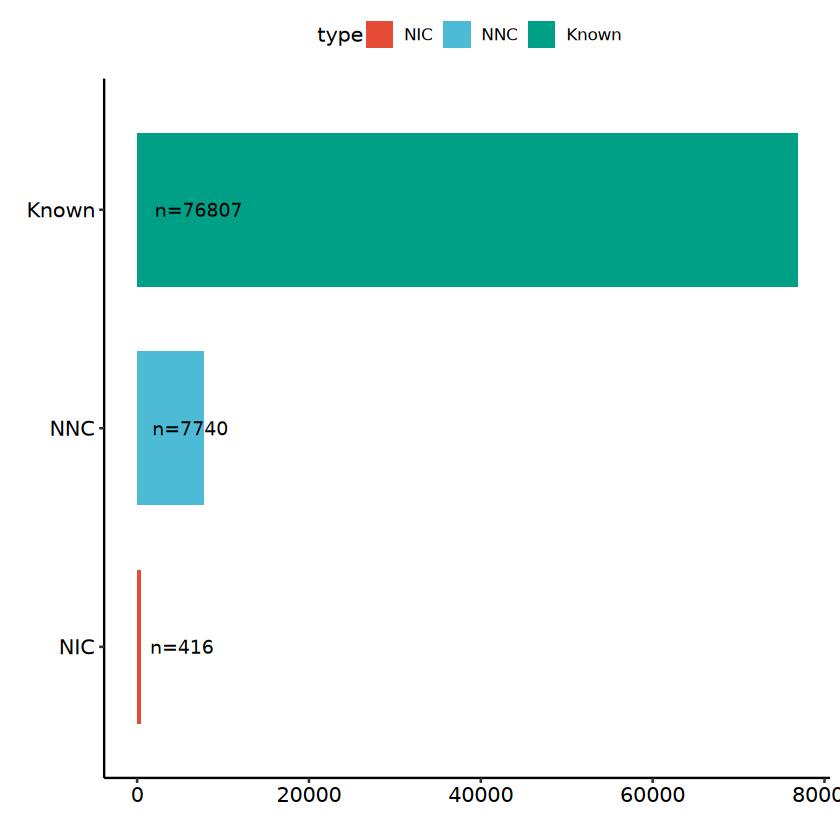

In [5]:
#isoform stat
trannovel = gtfinfo[gtfinfo$novelGene == F,]
#trannovel = trannovel[trannovel$TXNAME %in% fsrawdp$transcript_name,]
table(trannovel$txClassDescription)
trannovel$type = "NNC"
trannovel[trannovel$txClassDescription %in% c("newWithin","newLastExon","newFirstExon","newFirstExon:newLastExon"),"type"] = "NIC"
trannovel[trannovel$txClassDescription == "annotation","type"] = "Known"
#trannovel[trannovel$txClassDescription == "allNew","type"] = "NNC_all"
library(ggplot2)
library(ggpubr)
trannovelst = trannovel %>% group_by(type) %>% summarise(number = n())
trannovelst = trannovelst[order(trannovelst$number,decreasing = F),]
trannovelst$type = factor(trannovelst$type,levels = trannovelst$type)
p1 = ggplot(trannovelst,aes(y = type,x = number,fill = type)) + 
    geom_bar(stat = "identity",width = 0.7) + 
    geom_text(aes(y = type,x = 0,label = paste0("n=",number)),
              hjust = -0.2) +
    xlab("") + ylab("") +
    scale_fill_npg() +
    theme_pubr() 
p1
ggexport(p1,filename = "result/figure1/bambu_novel_isoform_stat_bar_25_03_24.pdf",
           width = 4,height = 4)

In [6]:
 #isoform number stat
  genest = fsrawdp %>% group_by(gene_id) %>% summarise(readnum = length(unique(readid)))
  genest = genest[order(genest$readnum,decreasing = T),]
  #total basic number stat
  isoformst = fsrawdp[fsrawdp$gene_id %in% genest[genest$readnum > 100,
                                                     ]$gene_id,] %>% 
    group_by(gene_id) %>% 
    summarise(trannum = length(unique(transcript_id)))
  
  

In [7]:
max(isoformst$trannum)

[1] 50

file saved to result/figure1/bam_iso_basic_stat1_isoform_number_gene_100read_05_01.pdf



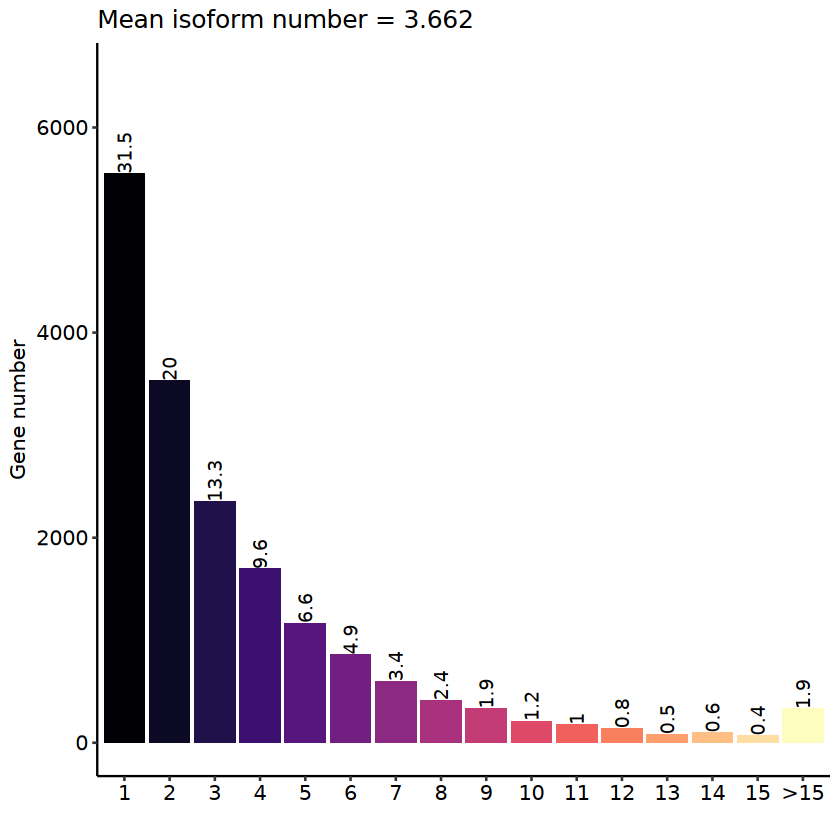

In [276]:
mtransnum = mean(isoformst$trannum)
isoformst1 = as.data.frame(table(isoformst$trannum))

isoformst1$prop = isoformst1$Freq/sum(isoformst1$Freq)
isoformst1f = isoformst1[as.numeric(isoformst1$Var1) <= 15,]
isoformst1f2 = isoformst1[as.numeric(isoformst1$Var1) > 15,]
isoformst1 = rbind(isoformst1f,data.frame("Var1" = ">15",
                                            "Freq" = sum(isoformst1f2$Freq),
                                            "prop" = sum(isoformst1f2$prop)))
isoformst1$prop = round(isoformst1$prop,3)*100
  
  pis1 = ggplot(isoformst1,aes(x = Var1,y = Freq,fill = Var1)) + 
    geom_bar(stat = "identity") +
    scale_y_continuous(limits = c(0,6500)) +
    geom_text(aes(label = prop),hjust = 0,angle = 90) +
    ggtitle(paste0("Mean isoform number = ", round(mtransnum,3))) +
    scale_fill_viridis(discrete = T,option = "A")+ xlab("") + 
    ylab("Gene number") +
    theme_pubr() +theme(legend.position = "none")
  pis1
  ggexport(pis1,filename = "result/figure1/bam_iso_basic_stat1_isoform_number_gene_100read_05_01.pdf",
           width = 5,height = 4)

In [1]:
isoformst1

ERROR: Error in eval(expr, envir, enclos): object 'isoformst1' not found


## Transcript count

In [46]:
length(unique(fsraw$readid))

[1] 88571439

In [15]:
markdf.raw = read.totalan[read.totalan$gene_id == "DDRGK1",]
markdf.raw = markdf.raw %>% group_by(gene_id) %>% 
      mutate(genecount = length(unique(readid))) %>%
      group_by(gene_id,transcript_id) %>% 
      summarise(count = length(unique(readid)),genecount = genecount[1],
                       rate = count/genecount)
markdf.raw

`summarise()` has grouped output by 'gene_id'. You can override using the
`.groups` argument.


gene_id,transcript_id,count,genecount,rate
<chr>,<chr>,<int>,<int>,<dbl>
DDRGK1,DDRGK1-WeiLab-1,17960,33147,0.5418288
DDRGK1,XM_005568473.2,15187,33147,0.4581712


In [ ]:
fsraw = read.totalan
fsraw = fsraw[!is.na(fsraw$transcript_id),]
#fsraw = qread("data/reads_full_anotation/read_total_annotation_nobackground_24_08_22.qs")
fsraw = fsraw %>% group_by(transcript_id) %>% mutate(readcount = length(unique(readid)))
#fsraw = fsraw %>% group_by(readid) %>% mutate(transnum = length(unique(transcript_id)))
fsraw = fsraw[order(fsraw$readid,-fsraw$readcount,fsraw$transcript_id),]
fsrawdp = fsraw[!duplicated(fsraw$readid),]
qsave(fsrawdp,file = "data/reads_full_anotation/main_data_read_total_annotation_dedup_24_09_04.qs")
qsave(fsraw,file = "data/reads_full_anotation/main_data_read_total_annotation_24_09_04.qs")
fsraw.cor = fsraw %>% group_by(readid) %>% filter(length(unique(transcript_id)) == 1)
qsave(fsraw.cor,"data/reads_full_anotation/main_data_read_total_annotation_delete_multiread_24_09_04.qs")

In [1]:
fsraw = qread("data/reads_full_anotation/main_data_read_total_annotation_24_09_04.qs")

ERROR: Error in qread("data/reads_full_anotation/main_data_read_total_annotation_24_09_04.qs"): could not find function "qread"


In [16]:
fsraw.cor = qread("data/reads_full_anotation/main_data_read_total_annotation_delete_multiread_24_09_04.qs")
length(unique(fsraw.cor$readid))

[1] 76840731

In [213]:
# fsraw.st = fsrawf %>% group_by(readid) %>% summarise(transnum = length(unique(transcript_id)))
# fsraw.stf = fsraw.st[fsraw.st$transnum == 1,]
# fsrawf2 = fsrawf[fsrawf$readid %in% fsraw.stf$readid,]
# fsrawf2.st = fsrawf2 %>% group_by(gene_id,transcript_id) %>% summarise(readnum = length(unique(readid)))
# fsrawf2.stf = fsrawf2.st %>% group_by(gene_id) %>% mutate(readprop = readnum/sum(readnum))
# fsrawf2.stf = fsrawf2.stf[fsrawf2.stf$readprop > 0.01,]
# head(fsrawf2.stf)
# nrow(fsrawf)
# fsrawf = fsrawf[fsrawf$transcript_id %in% fsrawf2.stf$transcript_id,]
# nrow(fsrawf)
# fsrawf$readValue = fsrawf2.stf[match(fsrawf$transcript_id,fsrawf2.stf$transcript_id),]$readprop
# fsrawf = fsrawf %>% group_by(readid) %>% mutate(readValue = (1/sum(readValue)) * readValue)
# head(fsrawf)
#summary(fsraw.st$transnum)
#nrow(fsraw.st)
#fsraw.stf = fsraw.st[fsraw.st$transnum < 10,]
#nrow(fsraw.stf)

`summarise()` has grouped output by 'gene_id'. You can override using the
`.groups` argument.


gene_id,transcript_id,readnum
<chr>,<chr>,<int>
ARPP21,XM_005545480.2,101
ARPP21,XM_005545482.2,3
ARPP21,XM_005545487.2,6
ARPP21,XM_005545488.2,6
ARPP21,XM_005545490.2,20
ARPP21,XM_005545492.2,5
ARPP21,XM_005545493.2,2
ARPP21,XM_005545494.2,4
ARPP21,XM_005545495.2,69


gene_id,transcript_id,readnum
<chr>,<chr>,<int>
ATXN7L1,XM_005550461.2,31
ATXN7L1,XM_005550462.2,24
ATXN7L1,XM_005550465.2,26
ATXN7L1,XM_005550467.2,24
ATXN7L1,XM_005550468.2,548
ATXN7L1,XM_015447898.1,24
ATXN7L1,XM_015447899.1,4
ATXN7L1,XM_015447900.1,28
ATXN7L1,XM_015447901.1,9


In [7]:
transtls = list()

#build data
{
    FullLengthTranSt = function(fs.info){
      transtl = fs.info %>% group_by(gene_id, areatr) %>% 
        mutate(genecount = length(unique(readid))) %>% 
        group_by(gene_id,transcript_id,areatr) %>% 
        summarise(count = length(unique(readid)),
                  genecount = unique(genecount))
      transtl = transtl[transtl$areatr != "" &
                          !is.na(transtl$areatr),]
      return(transtl)
    }
    
    #layer
    # npclf = npclf[npclf$arealayer %in% paste0("l",1:6),]
    fs.info.cortex = fsraw.cor[fsraw.cor$layer %in% paste0("l",1:6),]
    fs.info.cortex$areatr = fs.info.cortex$layer
    transtls$layer = FullLengthTranSt(fs.info.cortex)
    
    #region
    fs.info.cortex$areatr = fs.info.cortex$region
    transtls$region = FullLengthTranSt(fs.info.cortex)
    
    #lobe
    fs.info.cortex$areatr = fs.info.cortex$lobe
    transtls$lobe = FullLengthTranSt(fs.info.cortex)
    
    #subclass
    fs.info.cortex$areatr = fs.info.cortex$subclass
    transtls$subclass = FullLengthTranSt(fs.info.cortex)
    
    #class
    fs.info.cortex$areatr = fs.info.cortex$class
    transtls$class = FullLengthTranSt(fs.info.cortex)
    
    #class
    fsraw.cor$areatr = fsraw.cor$subcortical
    transtls$subcortical = FullLengthTranSt(fsraw.cor)
    
}
qsave(transtls,"data/reads_full_anotation/read_trans_stat_list_dedup_fsrawcor_24_09_04.qs")


`summarise()` has grouped output by 'gene_id', 'transcript_id'. You can
override using the `.groups` argument.
`summarise()` has grouped output by 'gene_id', 'transcript_id'. You can
override using the `.groups` argument.
`summarise()` has grouped output by 'gene_id', 'transcript_id'. You can
override using the `.groups` argument.
`summarise()` has grouped output by 'gene_id', 'transcript_id'. You can
override using the `.groups` argument.
`summarise()` has grouped output by 'gene_id', 'transcript_id'. You can
override using the `.groups` argument.
`summarise()` has grouped output by 'gene_id', 'transcript_id'. You can
override using the `.groups` argument.


In [ ]:
fs.info.cortex = fsrawf[fsrawf$class != "",]
fsrawdp.cor$areatr = paste0(fsrawdp.cor$lobe,"-",fsrawdp.cor$subclass)
transtsb = FullLengthTranSt(fsrawdp.cor)

### DTU calculation

In [10]:
transtls = qread("data/reads_full_anotation/read_trans_stat_list_dedup_fsrawcor_24_09_04.qs")

In [8]:
#chi test
transt = transtls$layer
CalSigIsoform = function(transt){
    transt = transt[!is.na(transt$areatr),]
    transt = transt[transt$areatr != "",]
    transt$relative = transt$count/transt$genecount
    #transtf = transt[transt$count > 5,]
    transtf = transt[transt$genecount > 20,]
    transtf = transtf %>% group_by(transcript_id) %>% 
      mutate(meanrelative = mean(relative),
             otherrelative = (sum(relative) - relative)/(n() - 1))
    transtf = transtf[which(transtf$meanrelative > 0.05),]

    arean = length(unique(transtf$areatr))

    #areanth = arean*(1/3)
   # print(areanth)
    transtf = transtf %>% group_by(transcript_id) %>% 
       filter(length(unique(areatr)) > 1)
    transtf = transtf %>% group_by(gene_id) %>% 
      filter(length(unique(transcript_id))>1)
    
    # transtf$lfc = log2(transtf$relative/transtf$meanrelative)
    transtf$dr = transtf$relative - transtf$otherrelative
    transtf$sig = "N"
    table(transtf$sig)
    
    #transtf$pvalue = 1
    MyChiqTest = function(transcript_id, areatr, count){
      dat = data.frame(transcript_id = transcript_id, areatr = areatr,
                       count = count)
      dat = dcast(dat, areatr~transcript_id,
                  value.var = "count",
                  fun.aggregate = sum)
      rownames(dat) = dat$areatr;dat = dat[-1]
      p = tryCatch(chisq.test(as.matrix(dat))$p.value, 
                   error = function(e) NA)
      return(p)
    }
    pvdf = transtf %>% group_by(gene_id) %>% summarise(pvalue = MyChiqTest(transcript_id, areatr, count))
    pvdf$padj = p.adjust(pvdf$pvalue,method = "BH")
    transtf = merge(transtf,pvdf,by = "gene_id")
    #print(head(transtf))
    # table(transtf[transtf$padj < 0.05,]$sig)
    #transtf[transtf$padj < 0.05,]$sig = "Y"
    transtf[which(transtf$dr > 0.1 & transtf$padj < 0.05 & transtf$count > 10), "sig"] = "Up"
    transtf[which(transtf$dr < -0.1 & transtf$padj < 0.05 & transtf$count > 10), "sig"] = "Down"
    return(transtf)
}
  isosigls = list()
for (i in 1:length(transtls)) {
    print(i)
    isosigls[[i]] = CalSigIsoform(transtls[[i]])
}
names(isosigls) = names(transtls)
for (i in 1:length(isosigls)) {
    print(length(unique(isosigls[[i]][isosigls[[i]]$sig!="N",]$gene_id)))
}


[1] 1


Warning message:
"There were 3061 warnings in `summarise()`.
The first warning was:
ℹ In argument: `pvalue = MyChiqTest(transcript_id, areatr, count)`.
ℹ In group 1: `gene_id = "AAAS"`.
Caused by warning in `chisq.test()`:
! Chi-squared approximation may be incorrect
ℹ Run `dplyr::last_dplyr_warnings()` to see the 3060 remaining warnings."


[1] 2


Warning message:
"There were 4556 warnings in `summarise()`.
The first warning was:
ℹ In argument: `pvalue = MyChiqTest(transcript_id, areatr, count)`.
ℹ In group 1: `gene_id = "AAAS"`.
Caused by warning in `chisq.test()`:
! Chi-squared approximation may be incorrect
ℹ Run `dplyr::last_dplyr_warnings()` to see the 4555 remaining warnings."


[1] 3


Warning message:
"There were 2564 warnings in `summarise()`.
The first warning was:
ℹ In argument: `pvalue = MyChiqTest(transcript_id, areatr, count)`.
ℹ In group 4: `gene_id = "AAED1"`.
Caused by warning in `chisq.test()`:
! Chi-squared approximation may be incorrect
ℹ Run `dplyr::last_dplyr_warnings()` to see the 2563 remaining warnings."


[1] 4


Warning message:
"There were 4554 warnings in `summarise()`.
The first warning was:
ℹ In argument: `pvalue = MyChiqTest(transcript_id, areatr, count)`.
ℹ In group 1: `gene_id = "AAAS"`.
Caused by warning in `chisq.test()`:
! Chi-squared approximation may be incorrect
ℹ Run `dplyr::last_dplyr_warnings()` to see the 4553 remaining warnings."


[1] 5


Warning message:
"There were 2293 warnings in `summarise()`.
The first warning was:
ℹ In argument: `pvalue = MyChiqTest(transcript_id, areatr, count)`.
ℹ In group 1: `gene_id = "AAAS"`.
Caused by warning in `chisq.test()`:
! Chi-squared approximation may be incorrect
ℹ Run `dplyr::last_dplyr_warnings()` to see the 2292 remaining warnings."


[1] 6


Warning message:
"There were 3766 warnings in `summarise()`.
The first warning was:
ℹ In argument: `pvalue = MyChiqTest(transcript_id, areatr, count)`.
ℹ In group 1: `gene_id = "AAAS"`.
Caused by warning in `chisq.test()`:
! Chi-squared approximation may be incorrect
ℹ Run `dplyr::last_dplyr_warnings()` to see the 3765 remaining warnings."


[1] 928
[1] 2542
[1] 761
[1] 1948
[1] 823
[1] 2262


In [13]:
isosigls$layer[isosigls$layer$gene_id == "ARPP21",]

,gene_id,transcript_id,areatr,count,genecount,relative,meanrelative,otherrelative,dr,sig,pvalue,padj
,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
4255,ARPP21,XM_005545480.2,l1,156,388,0.40206186,0.3357580,0.3224973,0.079564596,N,0,0
4256,ARPP21,XM_005545480.2,l2,454,1729,0.26257953,0.3357580,0.3503937,-0.087814200,N,0,0
4257,ARPP21,XM_005545480.2,l3,2362,8336,0.28334933,0.3357580,0.3462398,-0.062890437,N,0,0
4258,ARPP21,XM_005545480.2,l4,636,1667,0.38152370,0.3357580,0.3266049,0.054918803,N,0,0
4259,ARPP21,XM_005545480.2,l5,1313,3655,0.35923393,0.3357580,0.3310628,0.028171080,N,0,0
4260,ARPP21,XM_005545480.2,l6,1110,3407,0.32579982,0.3357580,0.3377497,-0.011949842,N,0,0
4261,ARPP21,XM_005545496.2,l1,97,388,0.25000000,0.1937723,0.1825268,0.067473186,N,0,0
4262,ARPP21,XM_005545496.2,l2,489,1729,0.28282244,0.1937723,0.1759623,0.106860115,Up,0,0
4263,ARPP21,XM_005545496.2,l3,2561,8336,0.30722169,0.1937723,0.1710825,0.136139213,Up,0,0


In [10]:
#isosigls = qread("data/dtu_analysis/dtu_isoform_ls_24_04_28.qs")
isosigls$layer[isosigls$layer$gene_id == "ARPP21",]
isosigls$subcortical[isosigls$subcortical$gene_id == "NKX6-2",]
gtfinfo = qread("ref/bambu_extended_annotations_transinfo_filter_24_05_01.qs")
for (i in 1:length(isosigls)) {
    isosigls[[i]] = isosigls[[i]][isosigls[[i]]$gene_id %in% unique(gtfinfo$GENEID),]
}

#isosigls.cl = qread(file = "result/figure3/bambu_cell_sig_isoform_24_04_28.qs")
qsave(isosigls,file = "data/dtu_analysis/dtu_isoform_ls_fsraw_cor_24_09_04.qs")


,gene_id,transcript_id,areatr,count,genecount,relative,meanrelative,otherrelative,dr,sig,pvalue,padj
,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
4255,ARPP21,XM_005545480.2,l1,156,388,0.40206186,0.3357580,0.3224973,0.079564596,N,0,0
4256,ARPP21,XM_005545480.2,l2,454,1729,0.26257953,0.3357580,0.3503937,-0.087814200,N,0,0
4257,ARPP21,XM_005545480.2,l3,2362,8336,0.28334933,0.3357580,0.3462398,-0.062890437,N,0,0
4258,ARPP21,XM_005545480.2,l4,636,1667,0.38152370,0.3357580,0.3266049,0.054918803,N,0,0
4259,ARPP21,XM_005545480.2,l5,1313,3655,0.35923393,0.3357580,0.3310628,0.028171080,N,0,0
4260,ARPP21,XM_005545480.2,l6,1110,3407,0.32579982,0.3357580,0.3377497,-0.011949842,N,0,0
4261,ARPP21,XM_005545496.2,l1,97,388,0.25000000,0.1937723,0.1825268,0.067473186,N,0,0
4262,ARPP21,XM_005545496.2,l2,489,1729,0.28282244,0.1937723,0.1759623,0.106860115,Up,0,0
4263,ARPP21,XM_005545496.2,l3,2561,8336,0.30722169,0.1937723,0.1710825,0.136139213,Up,0,0


,gene_id,transcript_id,areatr,count,genecount,relative,meanrelative,otherrelative,dr,sig,pvalue,padj
,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
46911,NKX6-2,NKX6-2-WeiLab-1,Cerebellum,45,157,0.28662420,0.33836221,0.34698521,-0.060361006,N,1.152532e-223,4.19386e-221
46912,NKX6-2,NKX6-2-WeiLab-1,Cortex,970,4109,0.23606717,0.33836221,0.35541138,-0.119344212,Down,1.152532e-223,4.19386e-221
46913,NKX6-2,NKX6-2-WeiLab-1,Hippocampus,129,391,0.32992327,0.33836221,0.33976870,-0.009845424,N,1.152532e-223,4.19386e-221
46914,NKX6-2,NKX6-2-WeiLab-1,Midbrain,120,563,0.21314387,0.33836221,0.35923193,-0.146088059,Down,1.152532e-223,4.19386e-221
46915,NKX6-2,NKX6-2-WeiLab-1,Pons,31,173,0.17919075,0.33836221,0.36489078,-0.185700033,Down,1.152532e-223,4.19386e-221
46916,NKX6-2,NKX6-2-WeiLab-1,Striatum,650,837,0.77658303,0.33836221,0.26532540,0.511257630,Up,1.152532e-223,4.19386e-221
46917,NKX6-2,NKX6-2-WeiLab-1,Ventricle,110,317,0.34700315,0.33836221,0.33692205,0.010081104,N,1.152532e-223,4.19386e-221
46918,NKX6-2,NKX6-2-WeiLab-2,Cerebellum,62,157,0.39490446,0.37943091,0.37685198,0.018052477,N,1.152532e-223,4.19386e-221
46919,NKX6-2,NKX6-2-WeiLab-2,Cortex,1538,4109,0.37430032,0.37943091,0.38028600,-0.005985688,N,1.152532e-223,4.19386e-221


In [11]:
as.data.frame(gtf[gtf$gene_id == "ARPP19",])

seqnames,start,end,width,strand,source,type,score,phase,gene_id,transcript_id,transcript_name,exon_number
<fct>,<int>,<int>,<int>,<fct>,<fct>,<fct>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>
NC_022278.1,29552895,29575091,22197,-,Bambu,transcript,NA,NA,ARPP19,XM_015452432.1,XM_015452432.1,NA
NC_022278.1,29552895,29557743,4849,-,Bambu,exon,NA,NA,ARPP19,XM_015452432.1,XM_015452432.1,4
NC_022278.1,29552897,29565831,12935,-,Bambu,transcript,NA,NA,ARPP19,XM_015452430.1,XM_015452430.1,NA
NC_022278.1,29552897,29570273,17377,-,Bambu,transcript,NA,NA,ARPP19,XM_015452434.1,XM_015452434.1,NA
NC_022278.1,29552897,29570288,17392,-,Bambu,transcript,NA,NA,ARPP19,XM_015452433.1,XM_015452433.1,NA
NC_022278.1,29552897,29574640,21744,-,Bambu,transcript,NA,NA,ARPP19,XM_015452429.1,XM_015452429.1,NA
NC_022278.1,29552897,29575276,22380,-,Bambu,transcript,NA,NA,ARPP19,XM_015452431.1,XM_015452431.1,NA
NC_022278.1,29552897,29557743,4847,-,Bambu,exon,NA,NA,ARPP19,XM_015452430.1,XM_015452430.1,3
NC_022278.1,29552897,29557743,4847,-,Bambu,exon,NA,NA,ARPP19,XM_015452434.1,XM_015452434.1,3


### Calculate DTU within different celltypes

In [11]:
CalSigIsoform = function(transt){
  transt = transt[!is.na(transt$areatr),]
  transt = transt[transt$areatr != "",]
  transt$relative = transt$count/transt$genecount
 # transtf = transt[transt$count > 5,]
  transtf = transt[transt$genecount > 10,]
  transtf = transtf %>% group_by(transcript_id) %>% 
    mutate(meanrelative = mean(relative),
           otherrelative = (sum(relative) - relative)/(n() - 1))
  transtf = transtf[which(transtf$meanrelative > 0.05),]
  transtf = transtf %>% group_by(transcript_id) %>% 
    filter(length(unique(areatr))>1)
  transtf = transtf %>% group_by(gene_id) %>% 
    filter(length(unique(transcript_id))>1)
  
  # transtf$lfc = log2(transtf$relative/transtf$meanrelative)
  transtf$dr = transtf$relative - transtf$otherrelative
  transtf$sig = "N"
  table(transtf$sig)
  
  transtf$pvalue = 1
  MyChiqTest = function(transcript_id, areatr, count){
    dat = data.frame(transcript_id = transcript_id, areatr = areatr,
                     count = count)
    dat = dcast(dat, areatr~transcript_id,
                value.var = "count",
                fun.aggregate = sum)
    rownames(dat) = dat$areatr;dat = dat[-1]
    p = tryCatch(chisq.test(as.matrix(dat))$p.value, 
                 error = function(e) NA)
    return(p)
  }
    pvdf = transtf %>% group_by(gene_id) %>% summarise(pvalue = MyChiqTest(transcript_id, areatr, count))
    pvdf$padj = p.adjust(pvdf$pvalue,method = "BH")
    transtf = merge(transtf,pvdf,by = "gene_id")
    #print(head(transtf))
    # table(transtf[transtf$padj < 0.05,]$sig)
    #transtf[transtf$padj < 0.05,]$sig = "Y"
    transtf[which(transtf$dr > 0.1 & transtf$padj < 0.05 & transtf$count > 5), "sig"] = "Up"
    transtf[which(transtf$dr < -0.1 & transtf$padj < 0.05 & transtf$count > 5), "sig"] = "Down"
  return(transtf)
}

#cal celltype DTU 
{
  
  #NonNeuron vs Neuron
  # transtnn = transtls$class
  # transtnn = transtnn[transtnn$areatr %in% c("GLU","GABA","NonNeuron"),]
  # transtnn[transtnn$areatr %in% c("GLU","GABA"),]$areatr = "Neuron"
  # isosignn = CalSigIsoform(transtnn)
  # isosignnf = isosignn[isosignn$sig != "N",]
  # unique(isosignn[isosignn$sig != "N",]$gene_id)
  # table(isosignn$sig)
  #geneex = "CDC42"
  #grtdfl = BuildPlotBed(npclf,nanobed,"class",geneex,NULL)
  #p0c1 = IsoformReadPlot(gtfp, grtdfl, geneex,onlyhub = F)
  #p0c1
  #ggexport(p0c1,filename = "processed/figures/f3/bambu_cell_case_NNvsNeuron_CDC42.pdf",
   #        width = 6,height = 5)
  
  #NonNeuron vs GABA
  # transtng = transtls$class
  # transtng = transtng[transtng$areatr %in% c("GABA","NonNeuron"),]
  # isosigng = CalSigIsoform(transtng)
  # #unique(isosigngf[isosigngf$sig != "N",]$gene_id)
  
  # # #NonNeuron vs GLU
  # transtngu = transtls$class
  # transtngu = transtngu[transtngu$areatr %in% c("GLU","NonNeuron"),]
  # isosigngu = CalSigIsoform(transtngu)

  
  # #1. GLU and GABA
  # transtcl = transtls$class
  # transtcl = transtcl[transtcl$areatr %in% c("GLU","GABA"),]
  # isosigcl = CalSigIsoform(transtcl)
  #unique(isosigcl[isosigcl$sig != "N",]$gene_id)
  #table(isosigcl$sig)
  #npclfcl = npclf[npclf$class %in% c("GLU","GABA"),]
  #geneex = "MYL6"
  #grtdfl = BuildPlotBed(npclf,nanobed,"class",geneex,NULL)
  #p1c1 = IsoformReadPlot(gtfp, grtdfl, geneex,onlyhub = T)
  #p1c1
  #ggexport(p1c1,filename = "processed/figures/f3/bambu_cell_case_GLUvsGABA_MYL6.pdf",
  #         width = 6,height = 5)
  
  #2.within GABA
  transtclga = transtls$subclass
  transtclga = transtclga[transtclga$areatr %in% cellan[cellan$class %in% "GABA",]$subclass,]
  # unique(transtcls$areatr)
  # transtcls = transtcls[transtcls$areatr %in% c("GLU","GABA"),]
  isosigclga = CalSigIsoform(transtclga)
   #unique(isosigclgaf[isosigclgaf$sig != "N",]$gene_id)
  #unique(isosigclga[isosigclga$sig != "N",]$gene_id)
  
  #npclfclga = npclf[npclf$subclass %in% cellan[cellan$class %in% "GABA",]$subclass,]
  #geneex = "RPLP2"
  #grtdfl = BuildPlotBed(npclfclga,nanobed,"subclass",geneex,NULL)
  #p2c1 = IsoformReadPlot(gtfp, grtdfl, geneex,onlyhub = F)
  #p2c1
  #ggexport(p2c1,filename = "processed/figures/f3/bambu_cell_case_withinGABA_RPLP2.pdf",
  #         width = 6,height = 5)
  
  #3.within GLU
  transtcls = transtls$subclass
  transtcls = transtcls[transtcls$areatr %in% cellan[cellan$class %in% "GLU",]$subclass,]
  # unique(transtcls$areatr)
  # transtcls = transtcls[transtcls$areatr %in% c("GLU","GABA"),]
  isosigcls = CalSigIsoform(transtcls)
  # unique(isosigclsf[isosigclsf$sig != "N",]$gene_id)
  #unique(isosigcls[isosigcls$sig != "N",]$gene_id)
  
  #npclfcls = npclf[npclf$subclass %in% cellan[cellan$class %in% "GLU",]$subclass,]
  #geneex = "DDRGK1"
  #grtdfl = BuildPlotBed(npclfcls,nanobed,"subclass",geneex,NULL)
  #p3c1 = IsoformReadPlot(gtfp, grtdfl, geneex,onlyhub = T)
  #p3c1
  #ggexport(p3c1,filename = "processed/figures/f3/bambu_cell_case_withinGLU_DDRGK1.pdf",
  #         width = 6,height = 5)
  
  #3.within NonNeuron
  transtcln = transtls$subclass
  transtcln = transtcln[transtcln$areatr %in% cellan[cellan$class %in% "NonNeuron",]$subclass,]
  # unique(transtcls$areatr)
  # transtcls = transtcls[transtcls$areatr %in% c("GLU","GABA"),]
  isosigcln = CalSigIsoform(transtcln)
   #unique(isosigclnf[isosigclnf$sig != "N",]$gene_id)
  
  #npclfcln = npclf[npclf$subclass %in% cellan[cellan$class %in% "NonNeuron",]$subclass,]
  #geneex = "CIRBP"
  #grtdfl = BuildPlotBed(npclfcln,nanobed,"subclass",geneex,NULL)
  #p4c1 = IsoformReadPlot(gtfp, grtdfl, geneex,onlyhub = T)
  #p4c1
  #ggexport(p4c1,filename = "processed/figures/f3/bambu_cell_case_withinNN_CIRBP.pdf",
  #         width = 6,height = 5)
  
  # geneex = "NTM"
  # grtdfl = BuildPlotBed(npclfcln,nanobed,"subclass",geneex,NULL)
  # p4c2 = IsoformReadPlot(gtfp, grtdfl, geneex,onlyhub = T)
  # p4c2
  # ggexport(p4c1,filename = "processed/figures/f3/bambu_cell_case_withinNN_CIRBP.pdf",
  #          width = 6,height = 5)

  
  isosigls.cl = list(
      # "NonNeuron_GABA" = isosigng,
      #                "NonNeuron_GLU" = transtngu,
      #                "GLU_GABA" = isosigcl,
                     "GABA_GABA" = isosigclga,
                     "GLU_GLU" = isosigcls,
                     "NonNeuron_NonNeuron" = isosigcln)
  qsave(isosigls.cl,file = "data/dtu_analysis/dtu_isoform_ls_fsraw_dedup_celltype_24_09_17.qs")
  
  
  #stat
  sigenenst = NULL
  for (i in 1:length(isosigls.cl)) {
    gn = length(unique(isosigls.cl[[i]][isosigls.cl[[i]]$sig!="N",]$gene_id))
      print(gn)
    sigenenst = rbind(sigenenst,data.frame("group" = names(isosigls.cl)[i],
                                           "genenumber" = gn))
  }
  # sigenenst$Var1 = MySplit(sigenenst$group,"_",1)
  # sigenenst$Var2 = MySplit(sigenenst$group,"_",2)
  # ps1 = ggplot(sigenenst,aes(x = Var2, y = Var1, fill = genenumber)) + 
  #   geom_tile() + 
  #   geom_text(aes(label = genenumber),color = "black") + 
  #   theme_pubr() + coord_fixed() +
  #   scale_fill_viridis(option = "D") + xlab("") + ylab("")
  # ps1
  # ggexport(ps1,
  #          filename = "result/figure3/bambu_cell_sig_isoform_st_24_04_30.pdf",
  #          width = 5,height = 4)
  
  
}

Warning message:
"There were 3767 warnings in `summarise()`.
The first warning was:
ℹ In argument: `pvalue = MyChiqTest(transcript_id, areatr, count)`.
ℹ In group 1: `gene_id = "AAAS"`.
Caused by warning in `chisq.test()`:
! Chi-squared approximation may be incorrect
ℹ Run `dplyr::last_dplyr_warnings()` to see the 3766 remaining warnings."
Warning message:
"There were 5639 warnings in `summarise()`.
The first warning was:
ℹ In argument: `pvalue = MyChiqTest(transcript_id, areatr, count)`.
ℹ In group 1: `gene_id = "AAAS"`.
Caused by warning in `chisq.test()`:
! Chi-squared approximation may be incorrect
ℹ Run `dplyr::last_dplyr_warnings()` to see the 5638 remaining warnings."
Warning message:
"There were 3400 warnings in `summarise()`.
The first warning was:
ℹ In argument: `pvalue = MyChiqTest(transcript_id, areatr, count)`.
ℹ In group 1: `gene_id = "AAAS"`.
Caused by warning in `chisq.test()`:
! Chi-squared approximation may be incorrect
ℹ Run `dplyr::last_dplyr_warnings()` to see the 

[1] 248
[1] 1066
[1] 259


In [12]:
for (i in 1:length(isosigls.cl)) {
    isosigls.cl[[i]] = isosigls.cl[[i]][isosigls.cl[[i]]$gene_id %in% unique(gtfinfo$GENEID),]
}
  qsave(isosigls.cl,file = "data/dtu_analysis/dtu_isoform_ls_fsraw_dedup_celltype_24_09_17.qs")

ERROR: Error in h(simpleError(msg, call)): error in evaluating the argument 'table' in selecting a method for function '%in%': error in evaluating the argument 'x' in selecting a method for function 'unique': object 'gtfinfo' not found


In [308]:
#calculate ASC from different layer
fs.info.cortex$areatr = paste0(fs.info.cortex$layer,"-",fs.info.cortex$subclass)
transtls$sublayer = FullLengthTranSt(fs.info.cortex[fs.info.cortex$subclass == "PVALB",])
transtnn = transtls$sublayer
#transtnn = transtnn[transtnn$areatr %in% paste0("l",1:6,"-ASC"),]
isosignn = CalSigIsoform(transtnn)
unique(isosignn[isosignn$sig != "N",]$gene_id)

`summarise()` has grouped output by 'gene_id', 'transcript_id'. You can
override using the `.groups` argument.
Warning message:
"There were 3077 warnings in `summarise()`.
The first warning was:
ℹ In argument: `pvalue = MyChiqTest(transcript_id, areatr, count)`.
ℹ In group 1: `gene_id = "AAK1"`.
Caused by warning in `chisq.test()`:
! Chi-squared approximation may be incorrect
ℹ Run `dplyr::last_dplyr_warnings()` to see the 3076 remaining warnings."


[1] "BambuGene11813" "BNIP3L"         "CHN1"           "CLNS1A"        
 [5] "EPB41L3"        "LOC102119634"   "MRPL52"         "PAK1"          
 [9] "PBRM1"          "PSMG4"          "RAD23B"         "RPL31"         
[13] "RPS20"          "SGIP1"          "SPRYD3"         "ST3GAL1"       
[17] "VDAC3"          "YDJC"

In [311]:
isosignn[isosignn$sig != "N",]

,gene_id,transcript_id,areatr,count,genecount,relative,meanrelative,otherrelative,dr,sig,pvalue.x,pvalue.y,padj
,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
2411,BambuGene11813,BambuGene11813-WeiLab-3,l3-PVALB,74,80,0.92500000,0.73182283,0.667430446,0.2575696,Up,1,1.729356e-04,3.206429e-02
2412,BambuGene11813,BambuGene11813-WeiLab-3,l4-PVALB,14,27,0.51851852,0.73182283,0.802924273,-0.2844058,Down,1,1.729356e-04,3.206429e-02
2416,BambuGene11813,BambuGene11813-WeiLab-4,l4-PVALB,9,27,0.33333333,0.17621493,0.123842123,0.2094912,Up,1,1.729356e-04,3.206429e-02
2998,BNIP3L,NM_001283691.1,l3-PVALB,11,102,0.10784314,0.22977651,0.260259857,-0.1524167,Down,1,1.610962e-04,3.173596e-02
2999,BNIP3L,NM_001283691.1,l4-PVALB,27,62,0.43548387,0.22977651,0.178349673,0.2571342,Up,1,1.610962e-04,3.173596e-02
3007,BNIP3L,XM_015454368.1,l3-PVALB,86,102,0.84313725,0.72929053,0.700828853,0.1423084,Up,1,1.610962e-04,3.173596e-02
3008,BNIP3L,XM_015454368.1,l4-PVALB,30,62,0.48387097,0.72929053,0.790645425,-0.3067745,Down,1,1.610962e-04,3.173596e-02
3010,BNIP3L,XM_015454368.1,l6-PVALB,25,30,0.83333333,0.72929053,0.703279833,0.1300535,Up,1,1.610962e-04,3.173596e-02
4995,CHN1,CHN1-WeiLab-1,l1-PVALB,9,14,0.64285714,0.13112311,0.028776306,0.6140808,Up,1,7.627526e-27,2.404196e-23


In [326]:
#calculate ASC from different layer
fs.info.cortex$areatr = fs.info.cortex$lobe
transtls$sublobe = FullLengthTranSt(fs.info.cortex[fs.info.cortex$class %in% c("GABA"),])
#transtnn = transtnn[transtnn$areatr %in% paste0("l",1:6,"-ASC"),]
isosignn2 = CalSigIsoform(transtls$sublobe)
unique(isosignn2[isosignn2$sig != "N",]$gene_id)

`summarise()` has grouped output by 'gene_id', 'transcript_id'. You can
override using the `.groups` argument.
Warning message:
"There were 5528 warnings in `summarise()`.
The first warning was:
ℹ In argument: `pvalue = MyChiqTest(transcript_id, areatr, count)`.
ℹ In group 1: `gene_id = "AAAS"`.
Caused by warning in `chisq.test()`:
! Chi-squared approximation may be incorrect
ℹ Run `dplyr::last_dplyr_warnings()` to see the 5527 remaining warnings."


[1] "ADARB2"          "APC"             "APOD"            "BambuGene100931"
 [5] "BLOC1S2"         "CALB1"           "CD300LG"         "CDKN2AIPNL"     
 [9] "CHURC1"          "CPEB4"           "DNAJC15"         "DYNC2LI1"       
[13] "ERGIC3"          "FAM222B"         "FRMD4A"          "FRY"            
[17] "GOT1"            "GRAMD1B"         "KHDRBS2"         "KIFAP3"         
[21] "LDOC1"           "LMBRD1"          "LOC102127351"    "MAP2K7"         
[25] "MAPRE1"          "NFE2L2"          "NPAS3"           "NTRK2"          
[29] "OSBPL9"          "PDRG1"           "PPIP5K2"         "PSMA2_1"        
[33] "RAD23B"          "RPS10"           "SEPT2"           "SETBP1"         
[37] "SNRNP35"         "SORBS2"          "TPM4"            "ZCCHC14"

In [329]:
isosignn2[isosignn2$sig != "N" & isosignn2$areatr %in% c("somatosensory","auditory") & isosignn2$count > 50,]
isosignn2[isosignn2$gene_id == "KIFAP3",]

,gene_id,transcript_id,areatr,count,genecount,relative,meanrelative,otherrelative,dr,sig,pvalue.x,pvalue.y,padj
,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
24257,GOT1,NM_001284930.1,somatosensory,52,155,0.3354839,0.2381110,0.2186364,0.1168474,Up,1,2.017868e-04,0.0309923871
24259,GOT1,XM_015455846.1,auditory,75,88,0.8522727,0.7618890,0.7438122,0.1084605,Up,1,2.017868e-04,0.0309923871
24263,GOT1,XM_015455846.1,somatosensory,103,155,0.6645161,0.7618890,0.7813636,-0.1168474,Down,1,2.017868e-04,0.0309923871
29549,KIFAP3,XM_005539957.2,auditory,77,121,0.6363636,0.7778009,0.8060884,-0.1697247,Down,1,3.212362e-04,0.0447489561
29553,KIFAP3,XM_005539957.2,somatosensory,71,81,0.8765432,0.7778009,0.7580524,0.1184908,Up,1,3.212362e-04,0.0447489561
32387,LOC102127351,XR_001488860.1,auditory,107,145,0.7379310,0.8728849,0.8998757,-0.1619447,Down,1,4.277212e-07,0.0003660072


,gene_id,transcript_id,areatr,count,genecount,relative,meanrelative,otherrelative,dr,sig,pvalue.x,pvalue.y,padj
,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
29543,KIFAP3,XM_005539956.2,auditory,40,121,0.3305785,0.2085566,0.1841523,0.14642625,Up,1,0.0003212362,0.04474896
29544,KIFAP3,XM_005539956.2,cingulate,22,127,0.1732283,0.2085566,0.2156223,-0.04239395,N,1,0.0003212362,0.04474896
29545,KIFAP3,XM_005539956.2,occipital,22,117,0.1880342,0.2085566,0.2126611,-0.02462694,N,1,0.0003212362,0.04474896
29546,KIFAP3,XM_005539956.2,parietal,64,246,0.2601626,0.2085566,0.1982354,0.06192715,N,1,0.0003212362,0.04474896
29547,KIFAP3,XM_005539956.2,somatosensory,10,81,0.1234568,0.2085566,0.2255766,-0.10211982,Down,1,0.0003212362,0.04474896
29548,KIFAP3,XM_005539956.2,temporal,70,398,0.1758794,0.2085566,0.2150921,-0.03921269,N,1,0.0003212362,0.04474896
29549,KIFAP3,XM_005539957.2,auditory,77,121,0.6363636,0.7778009,0.8060884,-0.16972472,Down,1,0.0003212362,0.04474896
29550,KIFAP3,XM_005539957.2,cingulate,102,127,0.8031496,0.7778009,0.7727312,0.03041845,N,1,0.0003212362,0.04474896
29551,KIFAP3,XM_005539957.2,occipital,94,117,0.8034188,0.7778009,0.7726773,0.03074148,N,1,0.0003212362,0.04474896


[1] 236
[1] 109


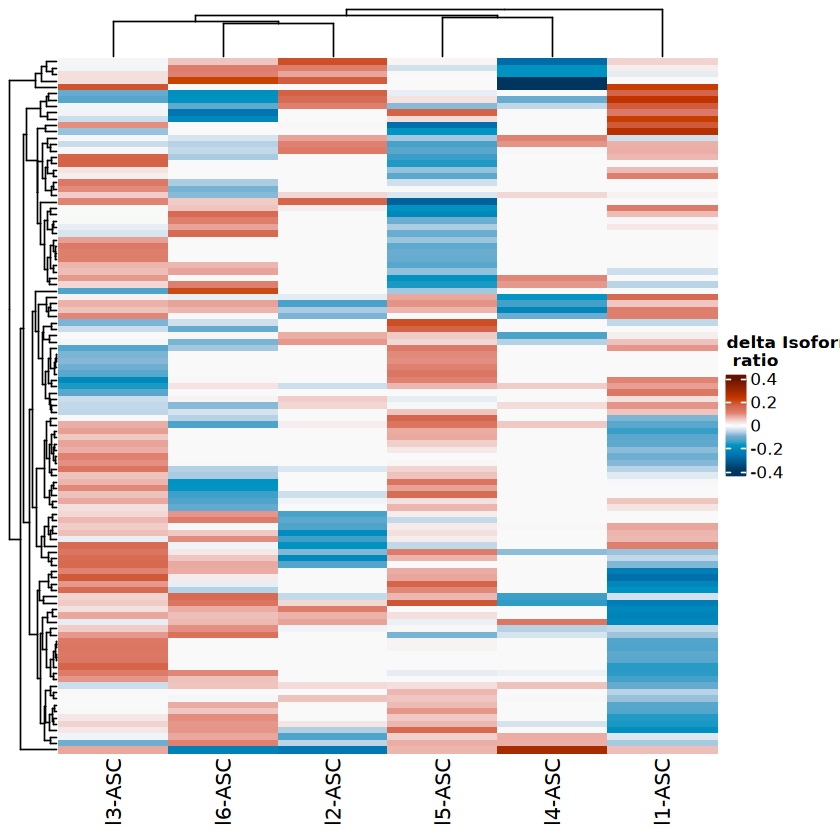

In [30]:
isosigi = isosignn
hubtrans = unique(isosigi[isosigi$sig != "N",]$transcript_id)
isosigf2 = isosigi[isosigi$transcript_id %in% hubtrans,]
isosigf2$dr2 = isosigf2$relative - isosigf2$meanrelative
print(length(unique(isosigf2$transcript_id)))
    #isosigf2 = isosigc[isosigc$transcript_id %in% isosigf2$transcript_id,]
isosigf2 = isosigf2 %>% group_by(transcript_id) %>% filter(max(abs(dr2)) > 0.05)
isosigf2 = isosigf2 %>% group_by(gene_id) %>% filter(meanrelative == max(meanrelative))
    #length(unique(isosigf2$transcript_id))
print(length(unique(isosigf2$gene_id)))
isosigf.mx1 = dcast(isosigf2,transcript_id~areatr,value.var = "dr2",fun.aggregate = sum)
rownames(isosigf.mx1) = isosigf.mx1$transcript_id;isosigf.mx1 = isosigf.mx1[-1]

library(circlize)
col_fun = colorRamp2(c(-0.4,-0.1, 0,0.1, 0.4), hcl_palette = "RdBu",reverse = T)
isosigf.mx1 = as.matrix(isosigf.mx1)
library(ComplexHeatmap)
pcloneht1 = Heatmap(isosigf.mx1,show_row_names = F,name = "delta Isoform\n ratio",col = col_fun)
pcloneht1

In [31]:
unique(isosigf2$gene_id)

[1] "ABHD2"        "ACYP2"        "ANK2"         "ANXA6"        "APBA2"       
  [6] "APC2"         "ARHGAP21"     "ARL6IP4"      "ARPP21"       "ATP6V0C"     
 [11] "AURKAIP1"     "BAZ2B"        "BSG"          "C1H1orf35"    "CALD1"       
 [16] "CAMKV"        "CDK5R1"       "CHPT1"        "CHTOP"        "CLTB"        
 [21] "COPRS"        "COPS8"        "DCLK1"        "DCTN2"        "DDRGK1"      
 [26] "DICER1"       "DIRAS2"       "DPY30"        "EEF1B2"       "ESRRG"       
 [31] "EXOC7"        "FAM162A"      "FBXW7"        "FUOM"         "G3BP2"       
 [36] "GAP43"        "GLS"          "GNB1"         "GNPTG"        "GPX4"        
 [41] "GRIN1"        "GSK3B"        "IDH3B"        "KCNMA1"       "KIFAP3"      
 [46] "KMT2A"        "LAMP2"        "LMBRD1"       "LOC101925321" "LOC102115161"
 [51] "LOC102132250" "LOC102133057" "LOC102135073" "LOC102141554" "LOC107130043"
 [56] "LOC107131073" "LSAMP"        "MADD"         "MEA1"         "MRPL14"      
 [61] "MRPL51"       "MRPL52"       "NCAPD3"       "NKX6-2"       "OBSL1"       
 [66] "OLFM2"        "PAQR8"        "PCNX2"        "PFKM"         "PHF24"       
 [71] "PPM1B"        "PPP1CC"       "PPP2R2B"      "PPP3CB"       "PPP6R2"      
 [76] "PRMT1"        "PSIP1"        "PTGES3"       "PTK2B"        "PTMA"        
 [81] "RAB18"        "RAPGEF3"      "RGL1"         "RNF157"       "RNPC3"       
 [86] "RPL26L1"      "RPL5"         "RPS10"        "RTN4"         "SDCCAG8"     
 [91] "SEPT4"        "SERBP1"       "SNRPN"        "SPG7"         "SPOCK1"      
 [96] "SRRM2"        "ST6GALNAC6"   "STAU2"        "STOML2"       "SYNGR1"      
[101] "TCAF1"        "TCEAL4"       "TEX2"         "TMEM248"      "TRIM37"      
[106] "TUBB2B"       "UBAP2L"       "YBX1"         "ZNF451"

### Bed file mad

In [6]:
read.totalan =  qread("data/reads_full_anotation/read_total_annotation_nobackground_24_08_22.qs")

In [7]:
# longbedt = qread("ref/long_read_mapping_total_rawnano_pac2_fil_24_03_29.qs")
longbed = import("/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/cyclone_revo_process/bedfile/TB2000_total.bed", format = "BED")
# qsave(longbed,"ref/long_read_mapping_total_rawnano_pac2_24_03_29.qs")
length(longbed)
longbed = longbed[longbed$name %in% read.totalan$readid,]
length(longbed)
qsave(longbed,"ref/long_read_mapping_total_rawnano_cyclon_fil_24_11_12.qs")
# longbedt = rbind(longbedt,longbed)
longbed = import("/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/nano_revo_process/bedfile/ONT_BV827-001N0001_clean.part_total.bed", format = "BED")
longbed = longbed[longbed$name %in% read.totalan$readid,]
length(longbed)
qsave(longbed,"ref/long_read_mapping_total_rawnano_nano_fil_24_11_12.qs")


[1] 507385529

[1] 63320085

[1] 102777086

In [8]:
longbedt = qread("ref/long_read_mapping_total_rawnano_pac2_fil_24_03_29.qs")
longbed = qread("ref/long_read_mapping_total_rawnano_cyclon_fil_24_11_12.qs")
length(longbedt)
longbedt = c(longbedt,longbed)
length(longbedt)
longbed = qread("ref/long_read_mapping_total_rawnano_nano_fil_24_11_12.qs")
longbedt = c(longbedt,longbed)
length(longbedt)

qsave(longbedt,"ref/long_read_mapping_total_rawnano_total_fil_24_11_12.qs")

[1] 111454696

Warning message in .merge_two_Seqinfo_objects(x, y):
"Each of the 2 combined objects has sequence levels not in the other:
  - in 'x': NW_005093143.1, NW_005093152.1, NW_005093217.1, NW_005093282.1, NW_005093504.1, NW_005093514.1, NW_005093552.1, NW_005093576.1, NW_005093578.1, NW_005093585.1, NW_005093663.1, NW_005093699.1, NW_005093711.1, NW_005093835.1, NW_005093863.1, NW_005093973.1, NW_005094008.1, NW_005094094.1, NW_005094193.1, NW_005094209.1, NW_005094440.1, NW_005094475.1, NW_005094575.1, NW_005094642.1, NW_005094794.1, NW_005094848.1, NW_005095027.1, NW_005095064.1, NW_005095095.1, NW_005095432.1, NW_005095435.1, NW_005095867.1, NW_005095888.1, NW_005096108.1, NW_005096139.1, NW_005096186.1, NW_005096267.1, NW_005096289.1, NW_005096305.1, NW_005096449.1, NW_005096495.1, NW_005096563.1, NW_005096666.1, NW_005096700.1, NW_005096712.1, NW_005096742.1, NW_005096769.1, NW_005096823.1, NW_005096894.1, NW_005096929.1, NW_005096936.1, NW_005097029.1, NW_005097058.1, NW_005097109.1, N

[1] 174774781

Warning message in .merge_two_Seqinfo_objects(x, y):
"Each of the 2 combined objects has sequence levels not in the other:
  - in 'x': NW_005093086.1, NW_005093143.1, NW_005093152.1, NW_005093418.1, NW_005093514.1, NW_005093539.1, NW_005093552.1, NW_005093576.1, NW_005093578.1, NW_005093585.1, NW_005093663.1, NW_005093699.1, NW_005093835.1, NW_005093863.1, NW_005093973.1, NW_005094008.1, NW_005094094.1, NW_005094193.1, NW_005094209.1, NW_005094440.1, NW_005094575.1, NW_005094679.1, NW_005094794.1, NW_005094848.1, NW_005095432.1, NW_005095435.1, NW_005095669.1, NW_005095867.1, NW_005096139.1, NW_005096186.1, NW_005096267.1, NW_005096289.1, NW_005096305.1, NW_005096478.1, NW_005096548.1, NW_005096700.1, NW_005096712.1, NW_005096742.1, NW_005096769.1, NW_005096875.1, NW_005096894.1, NW_005096991.1, NW_005097343.1, NW_005097403.1, NW_005097432.1, NW_005097505.1, NW_005097551.1, NW_005097555.1, NW_005097624.1, NW_005097693.1, NW_005097779.1, NW_005097793.1, NW_005097800.1, NW_005097857.1, N

[1] 277551867

## CIDMapping debug

In [16]:
CidFilter = function(cidmap.dnano,edThred,cidsize){
    cidmap.dnano$qlen = nchar(cidmap.dnano$querySeq)
    cidmap.dnano$cidsize = cidsize[match(cidmap.dnano$gene,cidsize$V1),]$V2
    cidmap.dnano$cidsize = as.character(cidmap.dnano$cidsize)
    cidmap.dnano$rsize = as.numeric(substr(cidmap.dnano$cidsize,1,1))*(10^(nchar(cidmap.dnano$cidsize)-1))
    cidmap.dnano[cidmap.dnano$rsize > 1000000,"rsize"] = 1000000
    cidmap.dnano$thredref = paste0(cidmap.dnano$qlen,"_",cidmap.dnano$rsize)
    cidmap.dnano$threshold = edThred[match(cidmap.dnano$thredref,edThred$thredref),]$threshold
    return(cidmap.dnano)
}
cidmap.cycl = CidFilter(cidmap.cycl,edThred,cidsize)
cidmap.cyclf = cidmap.cycl[cidmap.cycl$editDi < cidmap.cycl$threshold,]
length(unique(cidmap.cyclf$readid))

[1] 0

In [8]:
122017796168/142720572533
218224640/258439465
122017796168/268432660671
395960173/465092261

[1] 0.8549419

[1] 0.8443936

[1] 0.4545564

[1] 0.8513583

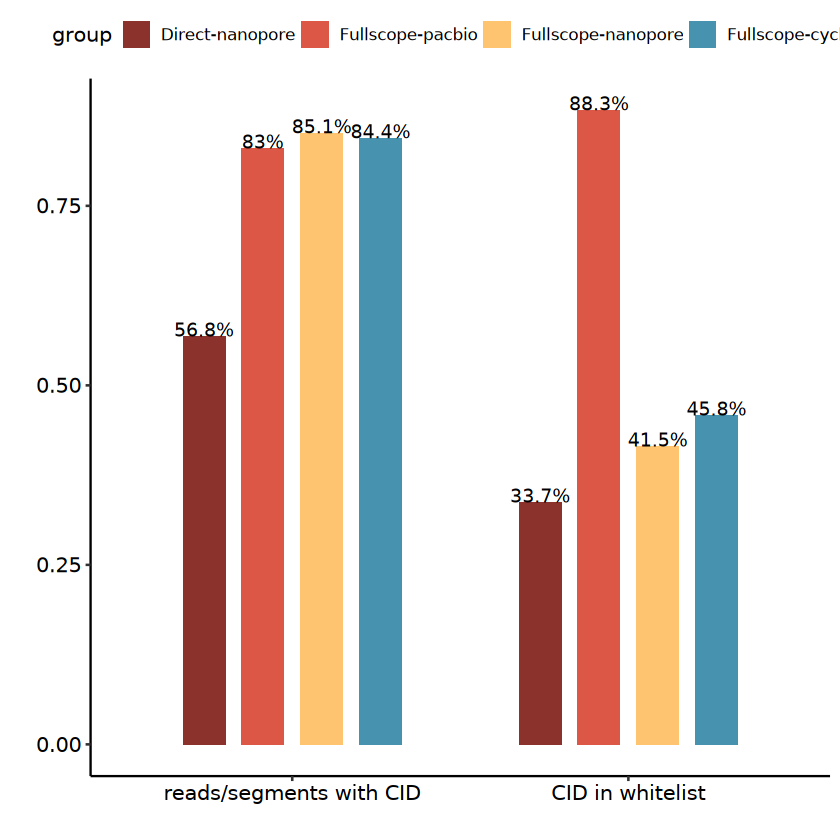

In [59]:
readNum = data.frame("process" = c("reads/segments with CID",
                                     "reads/segments with CID",
                                     "reads/segments with CID",
                                     "reads/segments with CID",
                                     "CID in whitelist",
                                     "CID in whitelist",
                                     "CID in whitelist",
                                     "CID in whitelist"), 
                       "group" = c("Direct-nanopore",
                                   "Fullscope-nanopore",
                                   "Fullscope-cyclone",
                                   "Fullscope-pacbio",
                                   "Direct-nanopore",
                                   "Fullscope-nanopore",
                                   "Fullscope-cyclone",
                                   "Fullscope-pacbio"
                                   ),
                       "readpro" = c(0.568,0.851,0.844,0.830,
                                     0.337,0.415,0.458,0.883)
                       # "readnum" = c(266132945, 234557420, 68048088),
                       )
  readNum$readprochar = paste0(readNum$readpro * 100,"%")

  readNum$process = factor(readNum$process,
                           levels = c("reads/segments with CID",
                                      "CID in whitelist"))
  readNum$group = factor(readNum$group,
                           levels = c("Direct-nanopore","Fullscope-pacbio","Fullscope-nanopore","Fullscope-cyclone"))
  mycolor = c('#8B322C','#DD5746','#FFC470','#4793AF')
  names(mycolor) = c("Direct-nanopore","Fullscope-pacbio","Fullscope-nanopore","Fullscope-cyclone")

  library(ggpubr)
  library(ggsci)
  p1b = ggplot(readNum, aes(x = process, y = readpro,fill = group)) + 
    geom_bar(stat = "identity",width = 0.5,
             position = position_dodge(preserve = "single",0.7)) +
    geom_text(aes(x = process, y = readpro, group = group,
                  label = readprochar),
              # angle = 90, 
              position = position_dodge(0.7),
              vjust = 0) +
    scale_fill_manual(values = mycolor) +
    xlab("") + ylab("") +
    theme_pubr()
  p1b
  ggsave(p1b, filename = "result/figure1/f1b_cid_mapped_rate_24_07_16.pdf",
         width = 5,height = 4,
         units = "in")

## Case list plot

In [17]:
#case plot
library(randomcoloR)
BuildPlotBed = function(npclf,nanobed,groupname,geneex,sigtr = NULL){
    readgroup = npclf[npclf$gene_id == geneex,]
    # readgroup = readgroup[readgroup$arealayer %in% paste0("l",1:6),]
    readgroup = unique(readgroup[c("readid","transcript_id","gene_id",
                                   groupname)])
    # readgroup = readgroup %>% group_by(readid) %>% 
    #   mutate(transgroup = 
    #            paste(unique(transcript_id)[order(unique(transcript_id))],
    #                              collapse = "|"))
    readgrt = nanobed[nanobed$name %in% readgroup$readid,]
    readgrt$group = readgroup[match(readgrt$name,
                                    readgroup$readid),
                              groupname]
    # readgrt$transcript_id = readgroup[match(readgrt$name,readgroup$readid),
    #                                   "transcript_id"]
    # readgrt$transgroup = readgroup[match(readgrt$name,readgroup$readid),
    #                                   "transgroup"]
    
    grtdfl = as.data.frame(readgrt)
    colnames(grtdfl)[ncol(grtdfl)] = "group"
    colnames(grtdfl)[6] = "readid"
    grtdfl = merge(grtdfl,readgroup[c("readid",
                              "transcript_id")],
          by = "readid")
    grtdfl = grtdfl[order(grtdfl$transcript_id,
                          grtdfl$start,grtdfl$end),]
    grtdfl = grtdfl[!is.na(grtdfl$group) &
                      grtdfl$group != "",]
    grtdfl
    grtdfl$readord = paste0(grtdfl$transcript_id,"-",grtdfl$readid)
    grtdfl = grtdfl %>% group_by(group) %>% 
      mutate(orid = as.numeric(factor(readord,
                                      levels = unique(readord)))) %>%
      mutate(oridnorm = orid/max(orid))
    grtdfl$sig = "black"
    grtdfl[grtdfl$group %in% sigtr, "sig"] = "red"
    return(grtdfl)
}

IsoformReadPlot = function(gtfp, grtdfl, geneex, onlyhub = T,mycolor = NULL){
    library(randomcoloR)
    library(ggbio)
    library(ggtranscript)
    tartrans = gtfp[which(gtfp$gene_id == geneex),]
    tartrans = as.data.frame(tartrans)
    tartrans = tartrans[tartrans$type == "exon",]
    tartrans = tartrans[order(tartrans$transcript_id),]
    tartrans$orid = as.numeric(factor(tartrans$transcript_id,levels = unique(tartrans$transcript_id)))
    tartrans$group = NA
    if(onlyhub){
      grtdfl = grtdfl %>% group_by(readid) %>% filter(length(unique(transcript_id)) == 1)
      grtdfl$readord = paste0(grtdfl$transcript_id,"-",grtdfl$readid)
      grtdfl = grtdfl %>% group_by(group) %>% 
        mutate(orid = as.numeric(factor(readord,
                                        levels = unique(readord)))) %>%
        mutate(oridnorm = orid/max(orid))
      tartrans = tartrans[tartrans$transcript_id %in% grtdfl$transcript_id,]
    }
    # tartrans = merge(tartrans,unique(grtdfl[c("transcript_id",
    #                                           "transgroup")]),
    #                  by = "transcript_id")
    tartranstx = tartrans %>% group_by(transcript_id,orid) %>% 
      summarise(start = min(start),end = max(end))
    tartranstx$group = NA
    mylim = c(min(tartranstx$start)-1000,max(tartranstx$end)+1000)
    library(ggh4x)
    
    #facetcol = list()
    #facetcoldf = unique(grtdfl[c("group","sig")])
    #facetcoldf = facetcoldf[order(facetcoldf$group,decreasing = F),]
    #for (i in 1:nrow(facetcoldf)) {
    #  facetcol[[i]] = element_text(color = facetcoldf[i,]$sig)
    #}
    #facetcol[[nrow(facetcoldf)+1]] = element_text(color = "black")
    grtdflin = to_intron(grtdfl,
                     "readord")
    no_of_colors = length(unique(grtdfl$transcript_id)) 
    colorful_palette = distinctColorPalette(no_of_colors) 
    names(colorful_palette) = unique(grtdfl$transcript_id)
    if(!is.null(mycolor)){
        colorful_palette = mycolor
    }

    
    pc = ggplot(grtdfl,aes(x = start,xend = end,
                      y = orid,
                      yend = orid,
                      fill = transcript_id,color = transcript_id)) +
      geom_segment(size = 0.5) +
      geom_segment(data = grtdflin,
                   aes(x = start,xend = end,
                       y = orid,
                       yend = orid),
                   size = 0.03,alpha = 0.5,color = "grey") +
      geom_range(data = tartrans,
                 aes(xstart = start,xend = end,
                     y = orid,
                     fill = transcript_id,color = transcript_id),
                 size = 0.2) +
      geom_intron(data = to_intron(tartrans,
                                   "transcript_id"),
                  aes(xstart = start,xend = end,strand = strand),
                  size = 0.2,
                  arrow.min.intron.length = 200,
                  arrow = arrow(length=unit(0.3,"cm"))) +
      geom_text(data = tartranstx,
                aes(x = (start + end) / 2,y = orid,
                    label = transcript_id),
                size = 3, vjust = -0.1, color = "black") +
     # facet_grid2(group~.,scales = "free",
     #             strip = strip_themed(
     #               text_y = facetcol
    #            )) +
      facet_wrap(group~.,scales = "free",ncol = 1,strip.position = "top") +
      scale_x_continuous(limits = mylim)+
      scale_color_manual(values = colorful_palette) +
      scale_fill_manual(values = colorful_palette) +
      # scale_fill_discreterainbow() +
      theme_void() + 
      ggtitle(geneex) +
      theme(legend.position = "none",
            panel.spacing = unit(0,'lines'),
            strip.background = element_rect(fill = NA,color = NA),
           strip.placement = "outside",
           plot.title = element_text(hjust = 0.5))
    pc
    
    return(pc)
}
#fsraw.cor = fsraw[fsraw$layer %in% paste0("l",1:6),]
#
IsoformReadPlotTotal = function(fsraw,isosigi,longbed,gtf,geneex,hubtrans = NULL){
    transname = unique(isosigi[isosigi$gene_id %in% geneex,]$transcript_id)
    if(!is.null(hubtrans)){
        transname = hubtrans
    }
    mycolors = distinctColorPalette(length(transname))
    names(mycolors) = transname
    grtdfl = BuildPlotBed(fsraw,longbed,'areatr',geneex,NULL)
    grtdfl = grtdfl[grtdfl$transcript_id %in% transname,]
    
    pci1 = IsoformReadPlot(gtf, grtdfl, geneex,onlyhub = F,mycolors)
    pci1
    return(pci1)
}

In [7]:
fsraw.cor = qread("data/reads_full_anotation/main_data_read_total_annotation_delete_multiread_24_08_22.qs")
isosigls = qread(file = "data/dtu_analysis/dtu_isoform_ls_fsrawcor_24_08_22.qs")
longbed = qread("ref/long_read_mapping_total_rawnano_total_fil_24_04_20.qs")

In [8]:
fsraw.cor = fsraw.cor[fsraw.cor$layer %in% paste0("l",1:6),]

In [ ]:
#layer
isosigi = isosigls$layer
isosighub = isosigi[isosigi$sig != "N" & isosigi$sig != "Y" & isosigi$count > 50,]
gmksi = unique(isosighub$gene_id)
length(gmksi)
pcls.layer = list()
for(i in 1:length(gmksi)){
    print(i)
    fsraw.cor$areatr = fsraw.cor$layer
    fsraw.cor$chunk = fsraw.cor$lobe
    pcls.layer[[i]] = tryCatch(IsoformReadPlotTotal(fsraw.cor,isosigi,longbed,gtf,gmksi[i],NULL),
                               error = function(e) NULL)
                               
}
  # ggexport(parcl_casels

pdf("result/figure2/dtu_case_ls_layer_24_09_04.pdf",
           width = 10,height = 8)
for(i in 1:length(pcls.layer)){
     tryCatch(print(pcls.layer[[i]]), error = function(e) NULL)
}
dev.off()

[1] 527

[1] 1


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 2


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 3


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 4


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 5


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 6


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 7


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


In [22]:
#lobe
isosigi = isosigls$lobe
isosighub = isosigi[isosigi$sig != "N" & isosigi$sig != "Y" & isosigi$count > 50,]
gmksi = unique(isosighub$gene_id)
length(gmksi)
pcls.lobe = list()
for(i in 1:length(gmksi)){
    print(i)
    fsraw.cor$areatr = fsraw.cor$lobe
    fsraw.cor$chunk = fsraw.cor$layer
    pcls.lobe[[i]] = tryCatch(IsoformReadPlotTotal(fsraw.cor,isosigi,longbed,gtf,gmksi[i],NULL),
                               error = function(e) NULL)
                               
}

pdf("result/figure2/dtu_case_ls_lobe_24_09_04.pdf",width = 10,height = 8)
for(i in 1:length(pcls.lobe)){
     tryCatch(print(pcls.lobe[[i]]), error = function(e) NULL)
}
dev.off()

[1] 440

[1] 1


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 2


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 3


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 4


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 5


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 6


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 7


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 8


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 9


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 10


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 11


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 12


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 13


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 14


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 15


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 16


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 17


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 18


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 19


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 20


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 21


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 22


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 23


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 24


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 25


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 26


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 27


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 28


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 29


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 30


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 31


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 32


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 33


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 34


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 35


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 36


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 37


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 38


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 39


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 40


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 41


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 42


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 43


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 44


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 45


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 46


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 47


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 48


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 49


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 50


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 51


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 52


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 53


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 54


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 55


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 56


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 57


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 58


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 59


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 60


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 61


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 62


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 63


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 64


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 65


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 66


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 67


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 68


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 69


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 70


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 71


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 72


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 73


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 74


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 75


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 76


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 77


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 78


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 79


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 80


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 81


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 82


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 83


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 84


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 85


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 86


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 87


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 88


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 89


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 90


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 91


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 92


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 93


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 94


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 95


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 96


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 97


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 98


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 99


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 100


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 101


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 102


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 103


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 104


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 105


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 106


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 107


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 108


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 109


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 110


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 111


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 112


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 113


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 114


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 115


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 116


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 117


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 118


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 119


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 120


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 121


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 122


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 123


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 124


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 125


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 126


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 127


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 128


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 129


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 130


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 131


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 132


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 133


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 134


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 135


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 136


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 137


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 138


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 139


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 140


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 141


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 142


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 143


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 144


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 145


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 146


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 147


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 148


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 149


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 150


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 151


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 152


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 153


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 154


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 155


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 156


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 157


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 158


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 159


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 160


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 161


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 162


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 163


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 164


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 165


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 166


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 167


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 168


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 169


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 170


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 171


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 172


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 173


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 174


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 175


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 176


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 177


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 178


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 179


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 180


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 181


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 182


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 183


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 184


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 185


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 186


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 187


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 188


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 189


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 190


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 191


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 192


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 193


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 194


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 195


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 196


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 197


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 198


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 199


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 200


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 201


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 202


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 203


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 204


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 205


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 206


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 207


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 208


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 209


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 210


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 211


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 212


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 213


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 214


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 215


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 216


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 217


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 218


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 219


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 220


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 221


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 222


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 223


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 224


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 225


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 226


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 227


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 228


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 229


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 230


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 231


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 232


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 233


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 234


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 235


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 236


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 237


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 238


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 239


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 240


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 241


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 242


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 243


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 244


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 245


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 246


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 247


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 248


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 249


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 250


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 251


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 252


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 253


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 254


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 255


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 256


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 257


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 258


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 259


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 260


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 261


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 262


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 263


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 264


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 265


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 266


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 267


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 268


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 269


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 270


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 271


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 272


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 273


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 274


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 275


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 276


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 277


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 278


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 279


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 280


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 281


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 282


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 283


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 284


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 285


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 286


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 287


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 288


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 289


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 290


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 291


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 292


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 293


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 294


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 295


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 296


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 297


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 298


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 299


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 300


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 301


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 302


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 303


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 304


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 305


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 306


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 307


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 308


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 309


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 310


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 311


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 312


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 313


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 314


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 315


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 316


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 317


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 318


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 319


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 320


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 321


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 322


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 323


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 324


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 325


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 326


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 327


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 328


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 329


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 330


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 331


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 332


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 333


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 334


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 335


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 336


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 337


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 338


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 339


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 340


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 341


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 342


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 343


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 344


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 345


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 346


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 347


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 348


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 349


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 350


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 351


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 352


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 353


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 354


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 355


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 356


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 357


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 358


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 359


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 360


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 361


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 362


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 363


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 364


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 365


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 366


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 367


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 368


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 369


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 370


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 371


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 372


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 373


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 374


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 375


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 376


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 377


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 378


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 379


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 380


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 381


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 382


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 383


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 384


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 385


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 386


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 387


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 388


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 389


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 390


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 391


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 392


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 393


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 394


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 395


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 396


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 397


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 398


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 399


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 400


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 401


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 402


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 403


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 404


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 405


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 406


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 407


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 408


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 409


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 410


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 411


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 412


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 413


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 414


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 415


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 416


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 417


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 418


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 419


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 420


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 421


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 422


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 423


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 424


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 425


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 426


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 427


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 428


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 429


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 430


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 431


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 432


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 433


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 434


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 435


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 436


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 437


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 438


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 439


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 440


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.
Warning message:
"Removed 6 rows containing missing values or values outside the scale range
(`geom_segment()`)."
Warning message:
"Removed 4 rows containing missing values or values outside the scale range
(`geom_segment()`)."
Warning message:
"Removed 1 row containing missing values or values outside the scale range
(`geom_segment()`)."
Warning message:
"Removed 1 row containing missing values or values outside the scale range
(`geom_segment()`)."
Warning message:
"Removed 22 rows containing missing values or values outside the scale range
(`geom_segment()`)."
Warning message:
"Removed 16 rows containing missing values or values outside the scale range
(`geom_segment()`)."
Warning message:
"Removed 1 row containing missing values or values outside the scale range
(`geom_segment()`)."
Warning message:
"Removed 2 rows containing missing values or values outside the scale range
(`geom_seg

png 
  2

In [ ]:
head(isosighub)

## NGS splicing stat

In [ ]:
library(data.table)
library(qs)
library(dplyr)
refdf = qread("/cluster/home/liuhengxin/P1_brain_nanopore/ref/T44_dedup_with_cellan_23_03_23.qs")
head(refdf)
fls = list.files("/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/ngs_staralign_splice/summary_split/",full.names = T)

In [ ]:
ngspdf = NULL
for(i in fls){
    print(i)
    ngspdfi = fread(i,sep = "auto")
    ngspdfi$type = MySplit(ngspdfi$V13,"\t",2)
    ngspdfi$gene_id = MySplit(ngspdfi$V13,"\t",3)
    cbzmatch = match(ngspdfi$V7,refdf$CBZ)
    ngspdfi$cell_id = refdf[cbzmatch,]$cell_id
    ngspdfi$origin_name = refdf[cbzmatch,]$origin_name
    ngspdfi$subclass = refdf[cbzmatch,]$subclass
    ngspdfi = ngspdfi[!is.na(ngspdfi$cell_id),]
    ngspdfi = ngspdfi %>% group_by(cell_id,origin_name,subclass,type,gene_id) %>% summarise(count = length(unique(V1)))
    qsave(ngspdf,file = "/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/ngs_staralign_splice/ngs_summary_st_24_11_18.qs")
    ngspdf = rbind(ngspdf,ngspdfi)
}
ngspdf = ngspdf %>% group_by(cell_id,origin_name,subclass,type,gene_id) %>% summarise(count = sum(count))
qsave(ngspdf,file = "/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/ngs_staralign_splice/ngs_summary_st_24_11_18.qs")